In [1]:
import sys
sys.path.append('/home/annie/Documents/multi-Ecoli/strains/')
from pymodulon.io import *
from pymodulon.plotting import *
from os import path

In [2]:
old = load_json_model('../Tahani/selon.json')

In [3]:
data_dir = path.join('..','data','processed_data')
# interim_dir = path.join('..','data','interim')

In [116]:
ica_data = load_json_model(path.join(data_dir,'ica_wip.json.gz'))

In [5]:
DF_enrichments = pd.read_csv(path.join(data_dir,'functional_enrichments.csv'),index_col=0)

<BarContainer object of 57 artists>

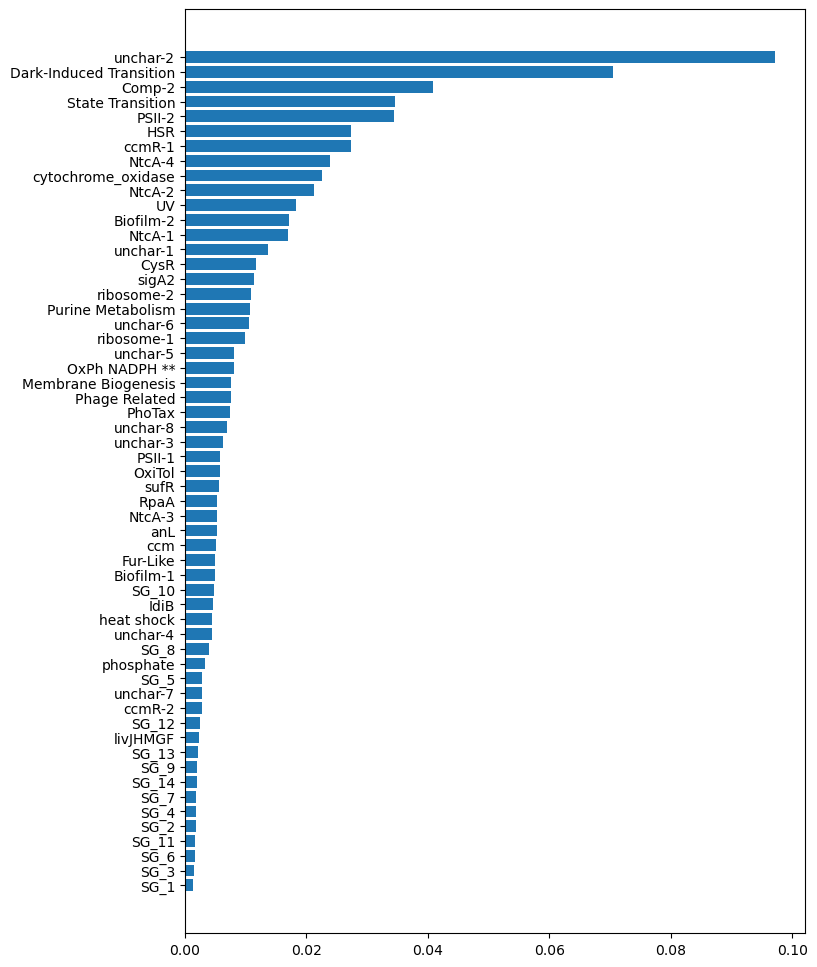

In [6]:
plt.figure(figsize = (8,12))
plt.barh(y = [str(x) for x in ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).index],
        width=ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).explained_variance)

# Add iModulon category

In [7]:
for i,row in ica_data.imodulon_table.iterrows():
    if pd.notnull(row.regulator):
        ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
    elif pd.notnull(row.single_gene):
        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
    else:
        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [8]:
ica_data.imodulon_table.head()

regulator  pvalue  qvalue  precision  recall  f1score  TP  \
ccm              NaN     NaN     NaN        NaN     NaN      NaN NaN   
PSII-1           NaN     NaN     NaN        NaN     NaN      NaN NaN   
ribosome-1       NaN     NaN     NaN        NaN     NaN      NaN NaN   
SG_1             NaN     NaN     NaN        NaN     NaN      NaN NaN   
SG_2             NaN     NaN     NaN        NaN     NaN      NaN NaN   

            regulon_size  imodulon_size  n_regs single_gene  \
ccm                  NaN           13.0     NaN         NaN   
PSII-1               NaN           21.0     NaN         NaN   
ribosome-1           NaN           26.0     NaN         NaN   
SG_1                 NaN            6.0     NaN        True   
SG_2                 NaN            3.0     NaN        True   

            explained_variance         category  
ccm                   0.005086  uncharacterized  
PSII-1                0.005835  uncharacterized  
ribosome-1            0.009849  uncharacterized  
SG_1                  0.001377      single_gene  
SG_2                  0.001744      single_gene

# Inspect all iModulons without an automated annotation

In [9]:
unchar_imods = ica_data.imodulon_table[ica_data.imodulon_table.category == 'uncharacterized']

In [10]:
unchar_imods

regulator  pvalue  qvalue  precision  recall  f1score  \
ccm                           NaN     NaN     NaN        NaN     NaN      NaN   
PSII-1                        NaN     NaN     NaN        NaN     NaN      NaN   
ribosome-1                    NaN     NaN     NaN        NaN     NaN      NaN   
RpaA                          NaN     NaN     NaN        NaN     NaN      NaN   
UV                            NaN     NaN     NaN        NaN     NaN      NaN   
Purine Metabolism             NaN     NaN     NaN        NaN     NaN      NaN   
unchar-1                      NaN     NaN     NaN        NaN     NaN      NaN   
unchar-2                      NaN     NaN     NaN        NaN     NaN      NaN   
anL                           NaN     NaN     NaN        NaN     NaN      NaN   
sigA2                         NaN     NaN     NaN        NaN     NaN      NaN   
livJHMGF                      NaN     NaN     NaN        NaN     NaN      NaN   
cytochrome_oxidase            NaN     NaN     NaN        NaN     NaN      NaN   
heat shock                    NaN     NaN     NaN        NaN     NaN      NaN   
Fur-Like                      NaN     NaN     NaN        NaN     NaN      NaN   
OxPh NADPH **                 NaN     NaN     NaN        NaN     NaN      NaN   
unchar-3                      NaN     NaN     NaN        NaN     NaN      NaN   
Biofilm-1                     NaN     NaN     NaN        NaN     NaN      NaN   
Phage Related                 NaN     NaN     NaN        NaN     NaN      NaN   
unchar-4                      NaN     NaN     NaN        NaN     NaN      NaN   
CysR                          NaN     NaN     NaN        NaN     NaN      NaN   
HSR                           NaN     NaN     NaN        NaN     NaN      NaN   
IdiB                          NaN     NaN     NaN        NaN     NaN      NaN   
phosphate                     NaN     NaN     NaN        NaN     NaN      NaN   
Membrane Biogenesis           NaN     NaN     NaN        NaN     NaN      NaN   
Biofilm-2                     NaN     NaN     NaN        NaN     NaN      NaN   
Dark-Induced Transition       NaN     NaN     NaN        NaN     NaN      NaN   
Comp-2                        NaN     NaN     NaN        NaN     NaN      NaN   
PhoTax                        NaN     NaN     NaN        NaN     NaN      NaN   
OxiTol                        NaN     NaN     NaN        NaN     NaN      NaN   
PSII-2                        NaN     NaN     NaN        NaN     NaN      NaN   
unchar-5                      NaN     NaN     NaN        NaN     NaN      NaN   
State Transition              NaN     NaN     NaN        NaN     NaN      NaN   
unchar-6                      NaN     NaN     NaN        NaN     NaN      NaN   
NtcA-3                        NaN     NaN     NaN        NaN     NaN      NaN   
ribosome-2                    NaN     NaN     NaN        NaN     NaN      NaN   
unchar-7                      NaN     NaN     NaN        NaN     NaN      NaN   
unchar-8                      NaN     NaN     NaN        NaN     NaN      NaN   
NtcA-4                        NaN     NaN     NaN        NaN     NaN      NaN   

                         TP  regulon_size  imodulon_size  n_regs single_gene  \
ccm                     NaN           NaN           13.0     NaN         NaN   
PSII-1                  NaN           NaN           21.0     NaN         NaN   
ribosome-1              NaN           NaN           26.0     NaN         NaN   
RpaA                    NaN           NaN            8.0     NaN         NaN   
UV                      NaN           NaN           77.0     NaN         NaN   
Purine Metabolism       NaN           NaN           16.0     NaN         NaN   
unchar-1                NaN           NaN           45.0     NaN         NaN   
unchar-2                NaN           NaN           42.0     NaN         NaN   
anL                     NaN           NaN            4.0     NaN         NaN   
sigA2                   NaN           NaN            8.0     NaN

/home/annie/Documents/multi-Ecoli/strains/pymodulon/plotting.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


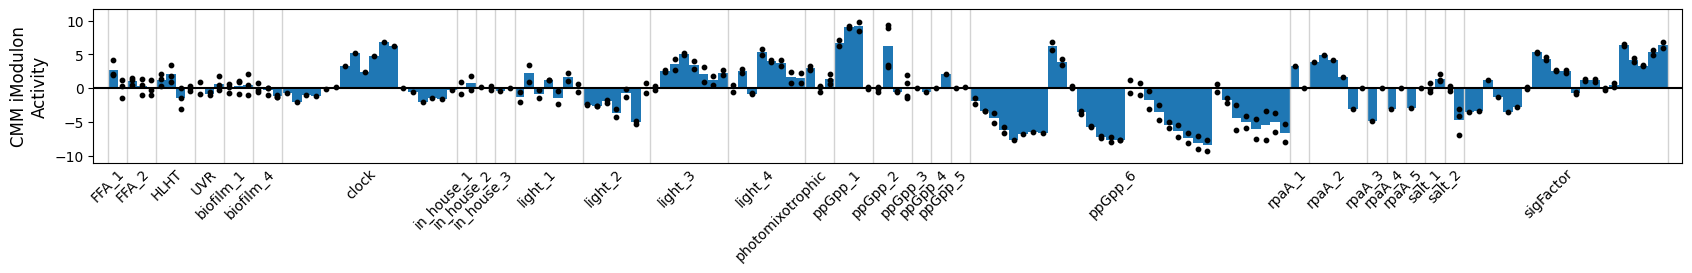

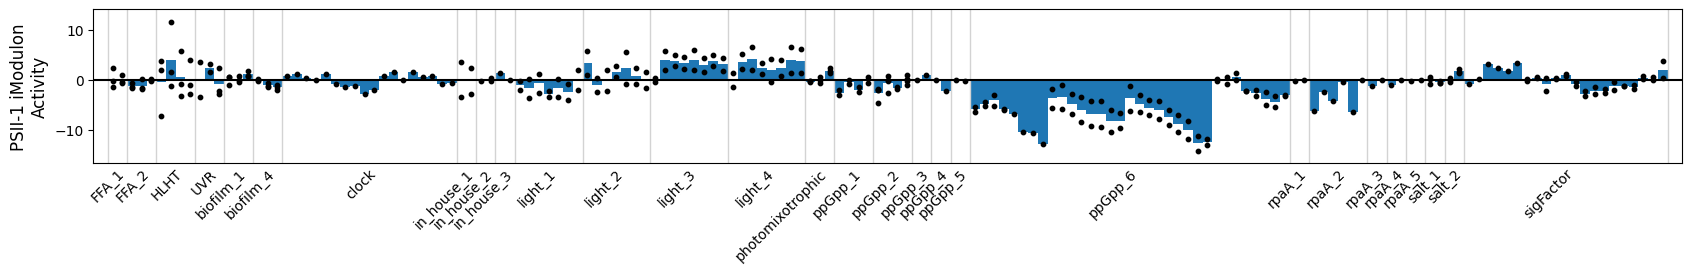

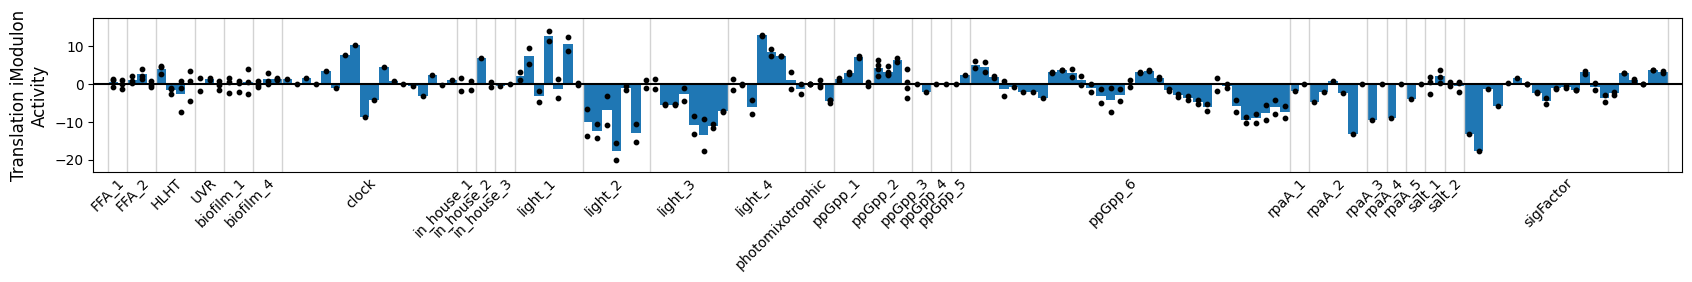

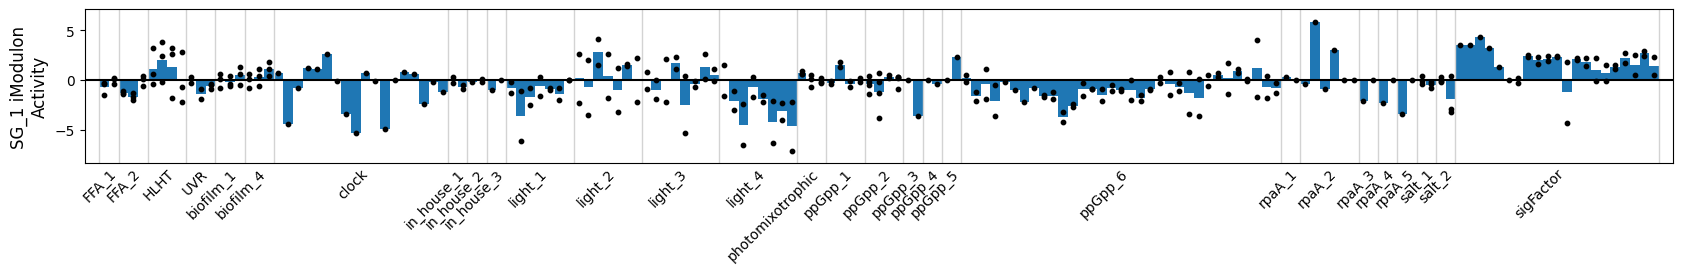

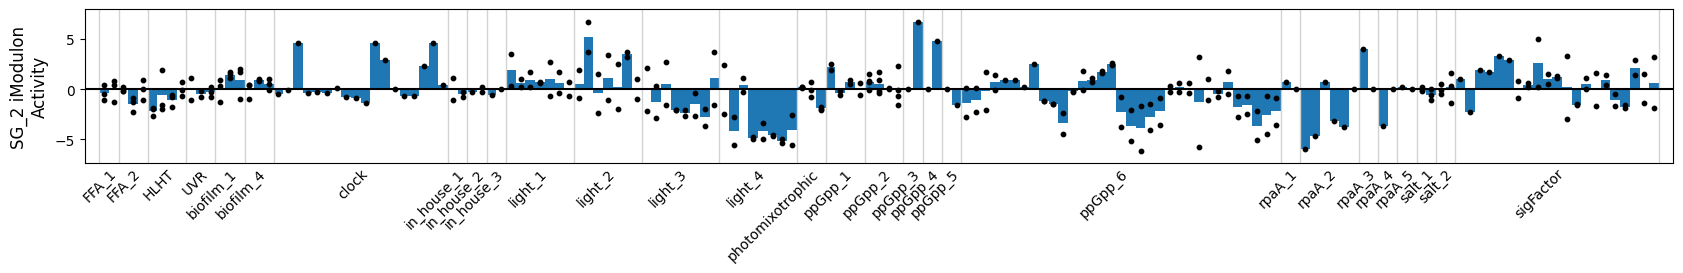

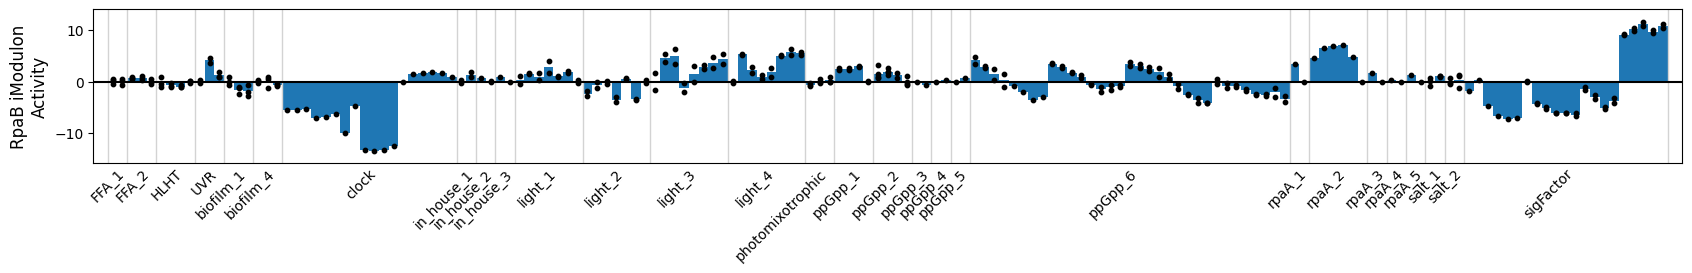

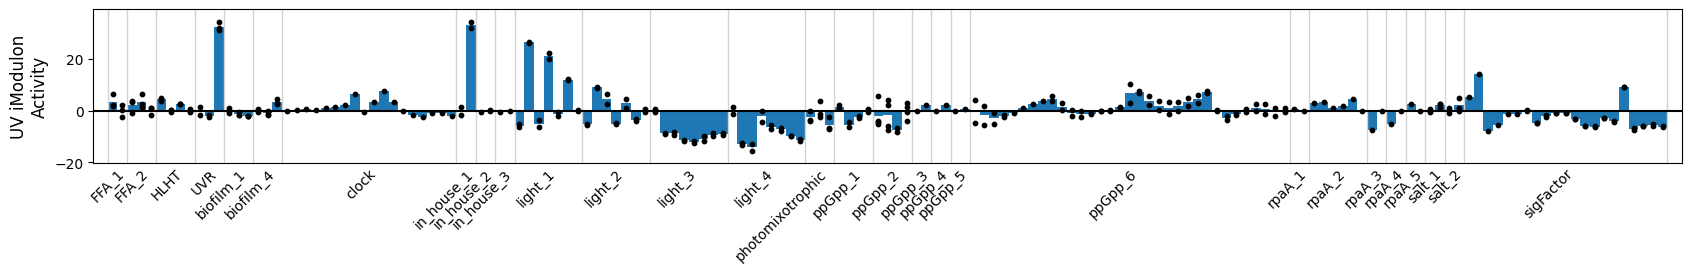

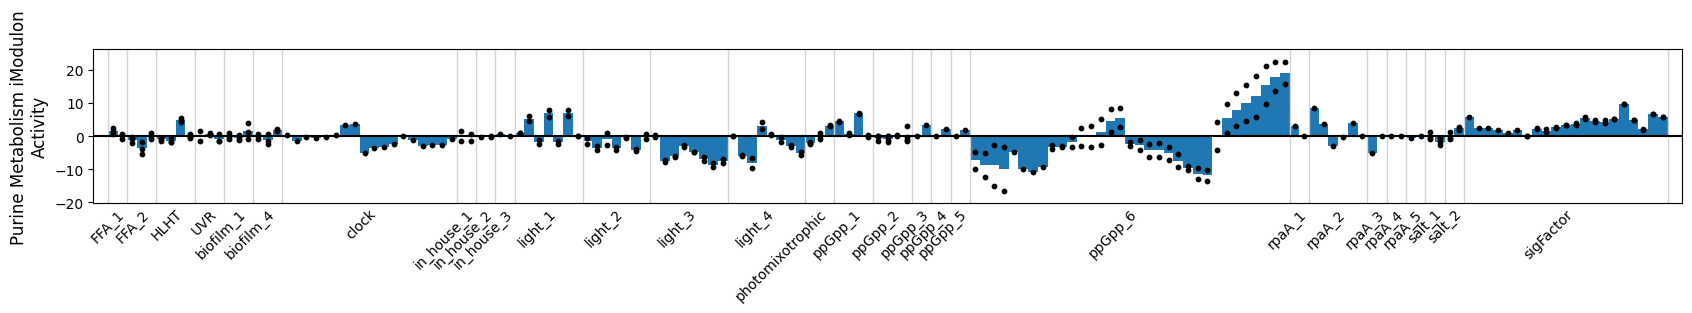

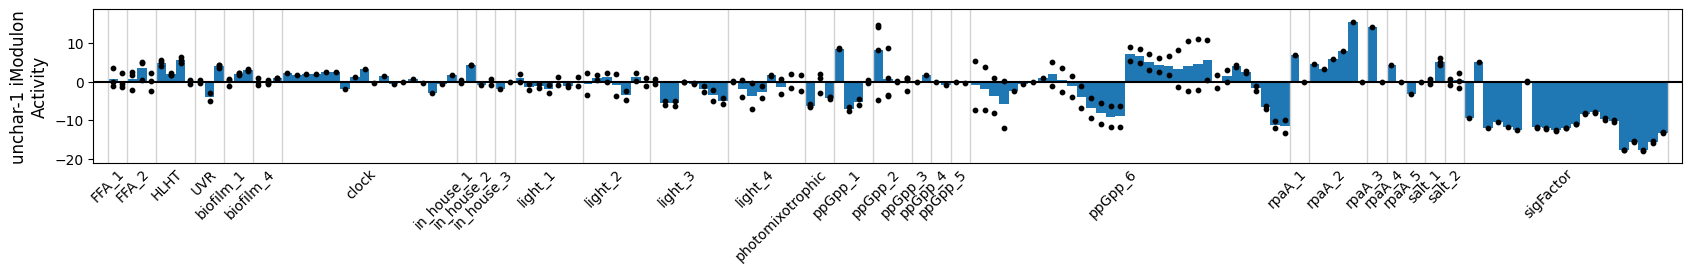

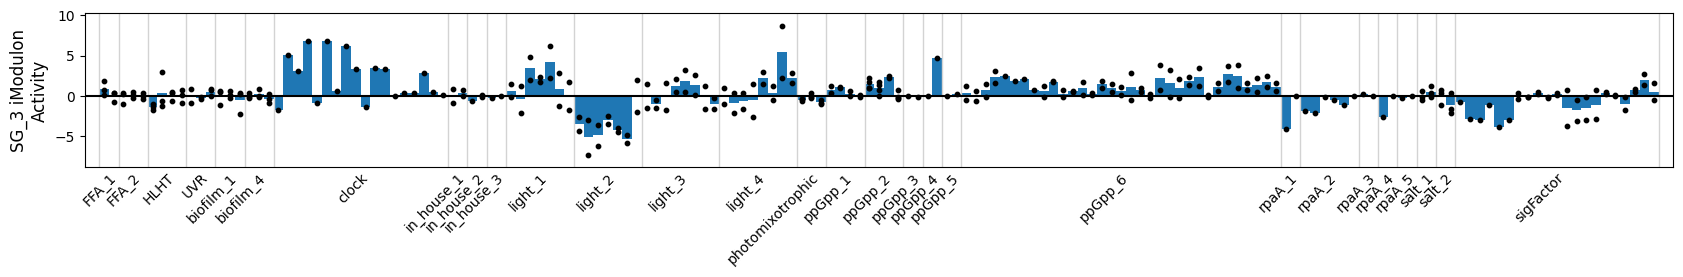

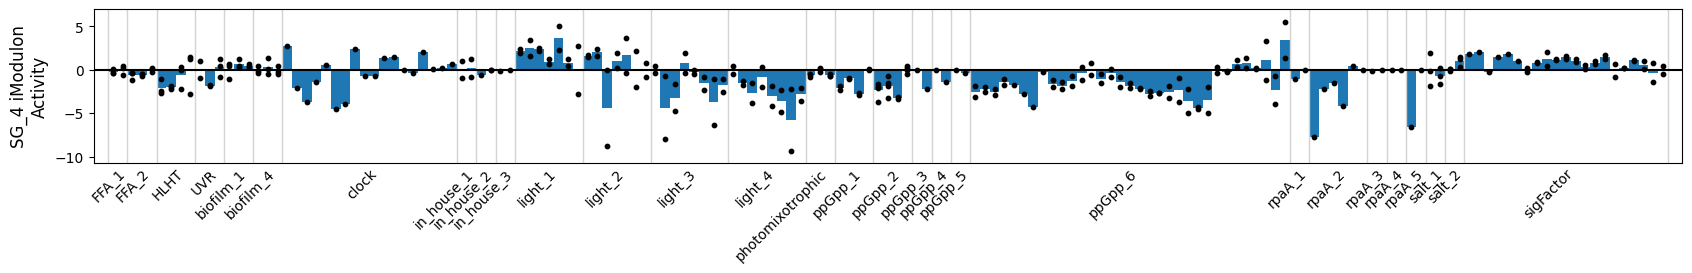

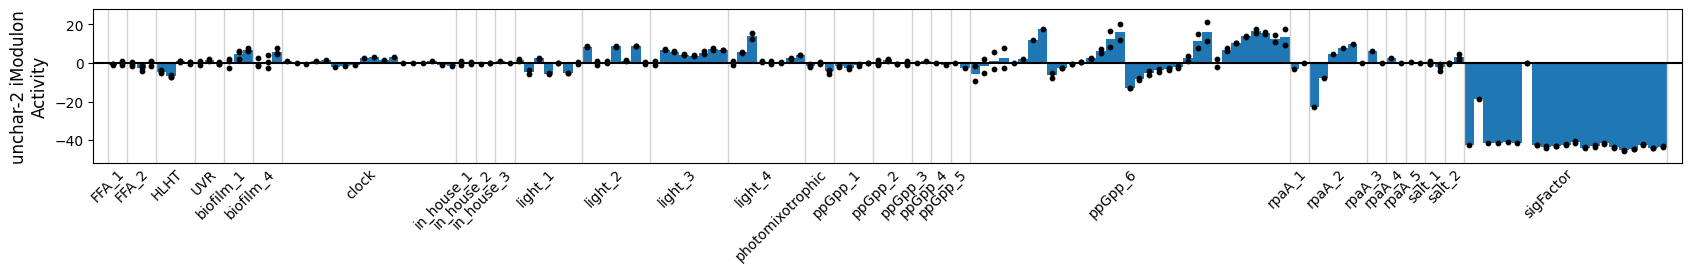

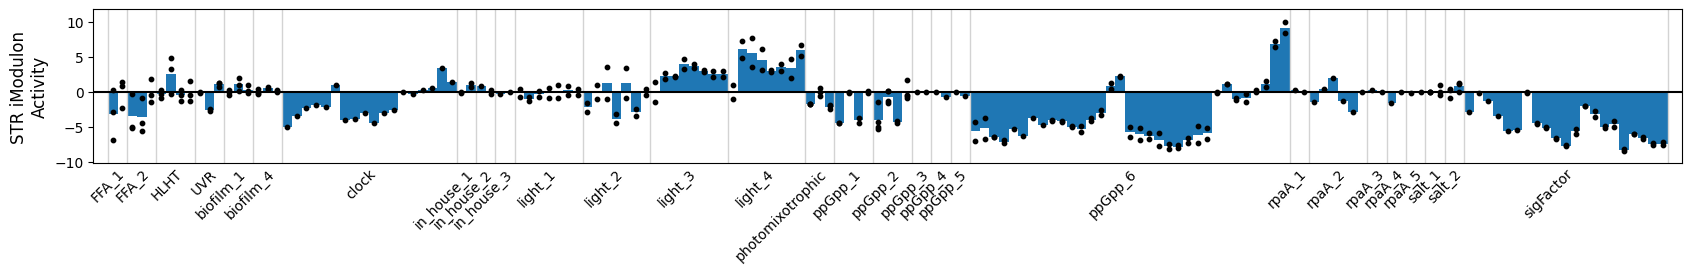

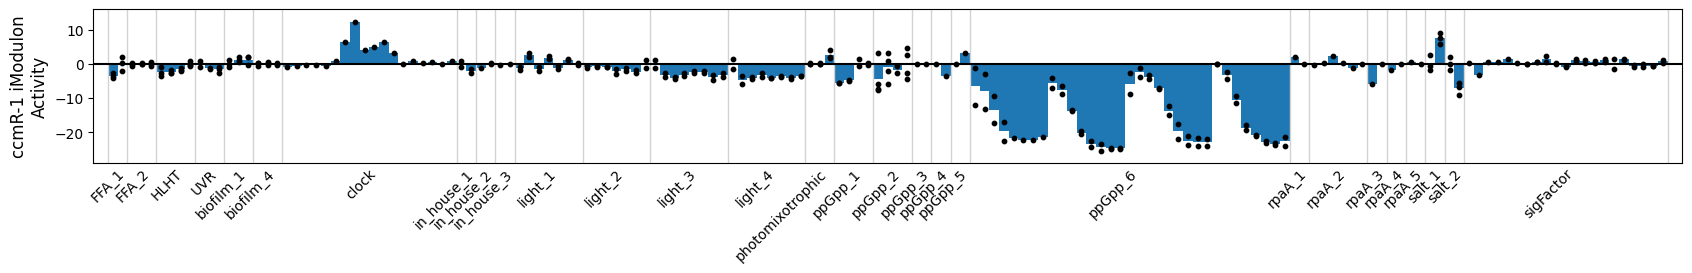

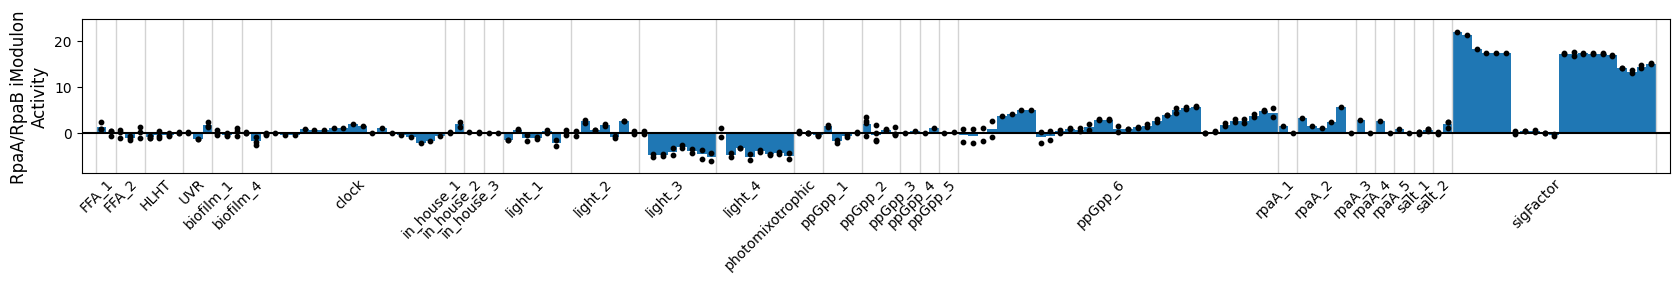

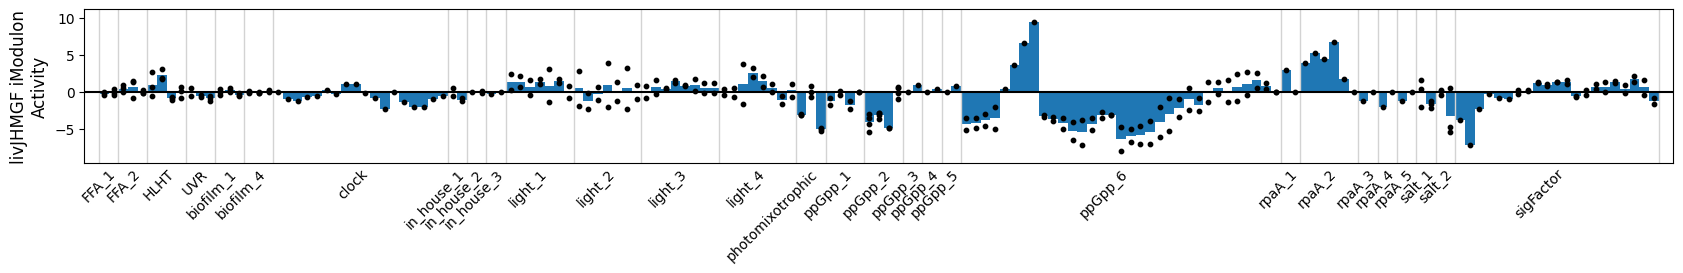

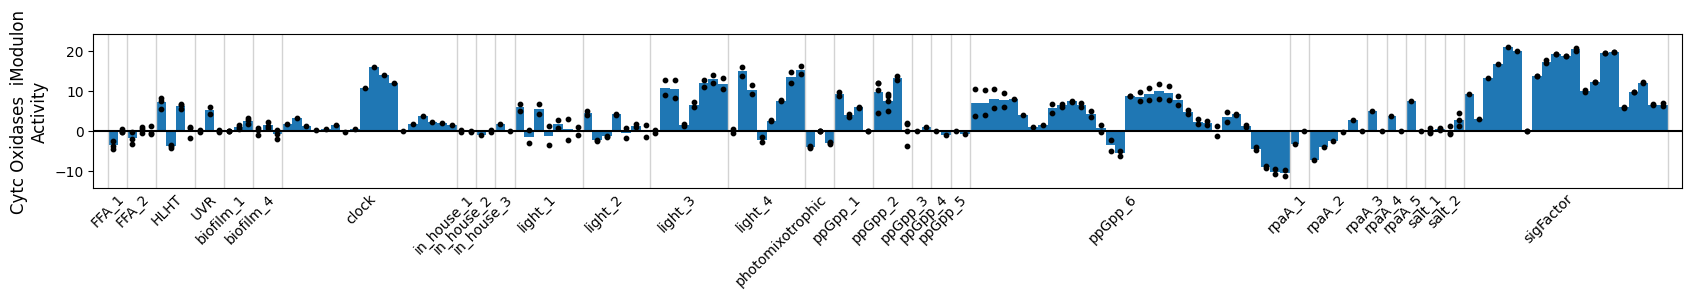

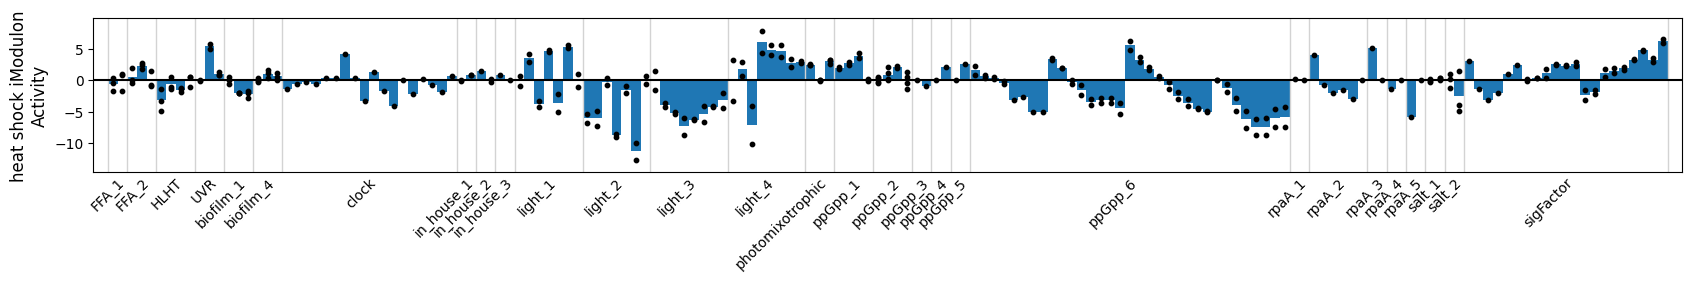

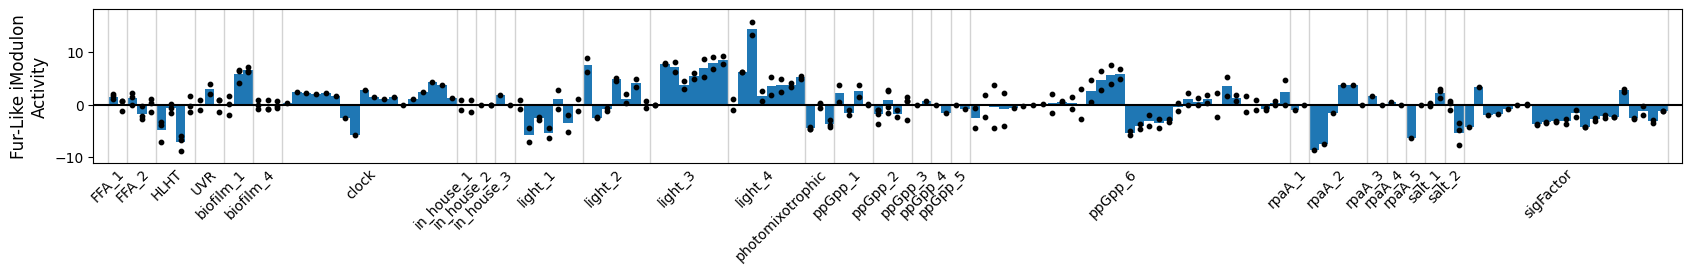

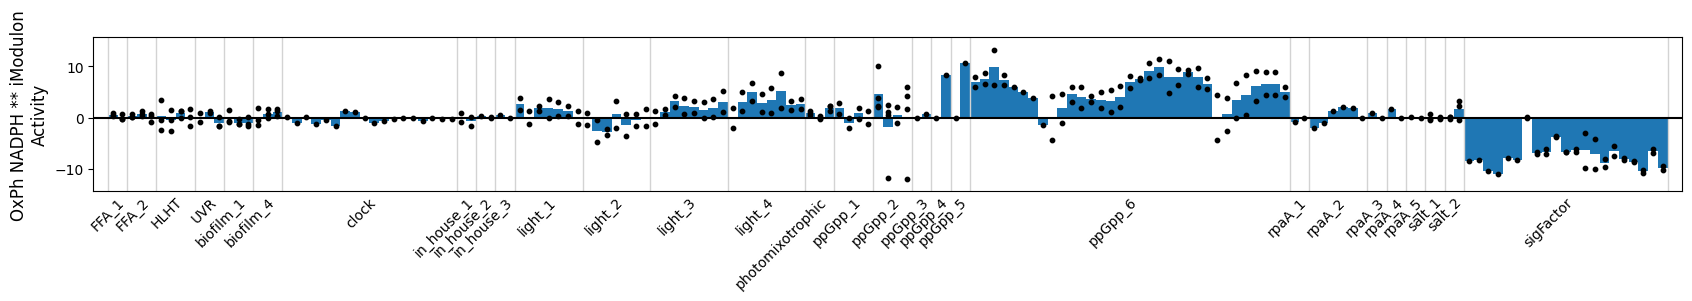

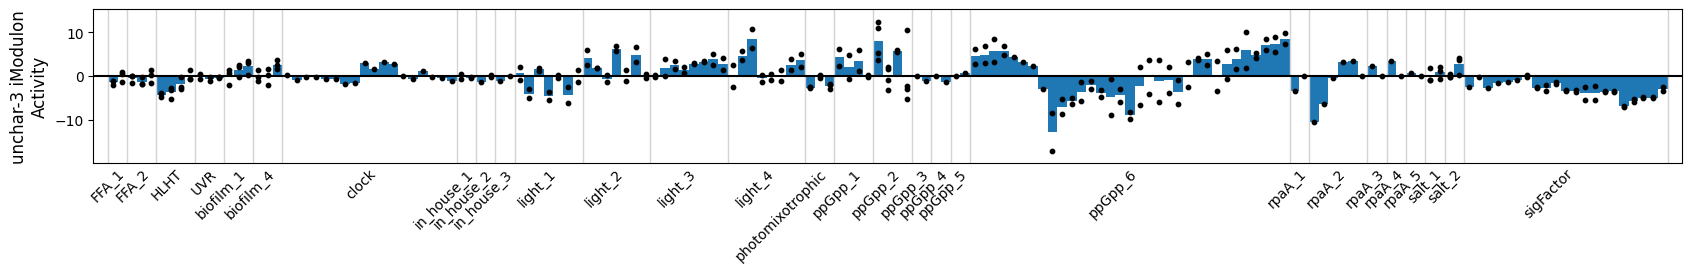

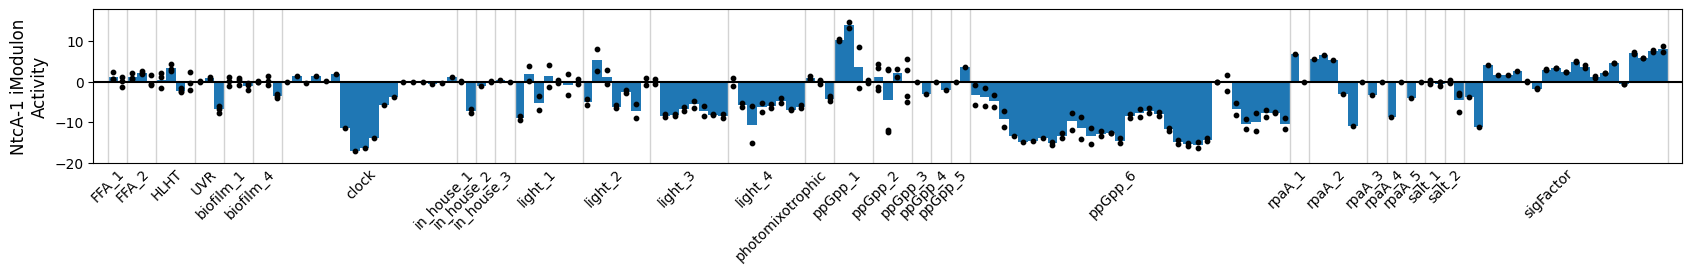

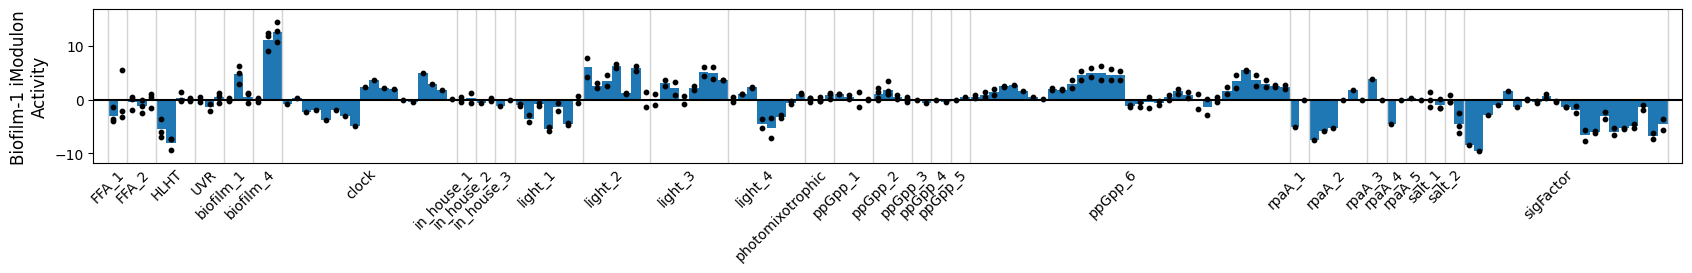

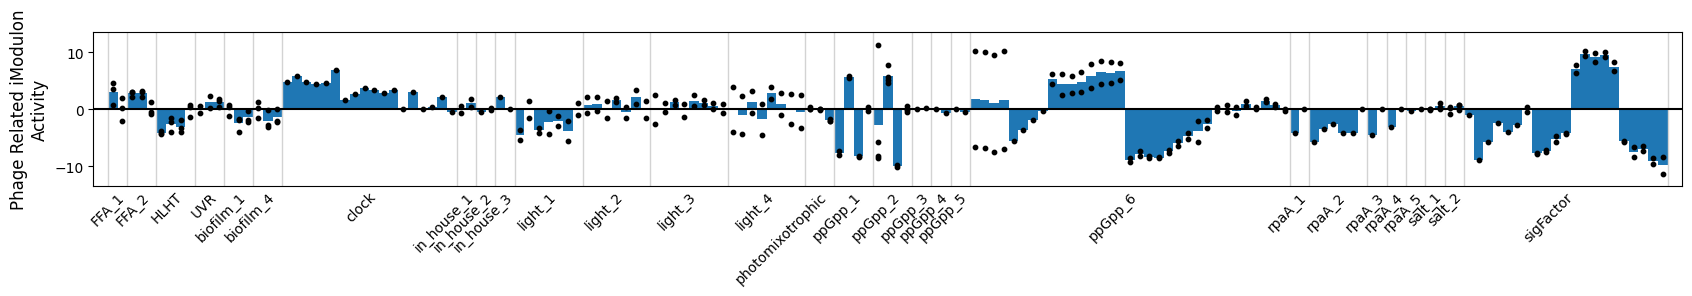

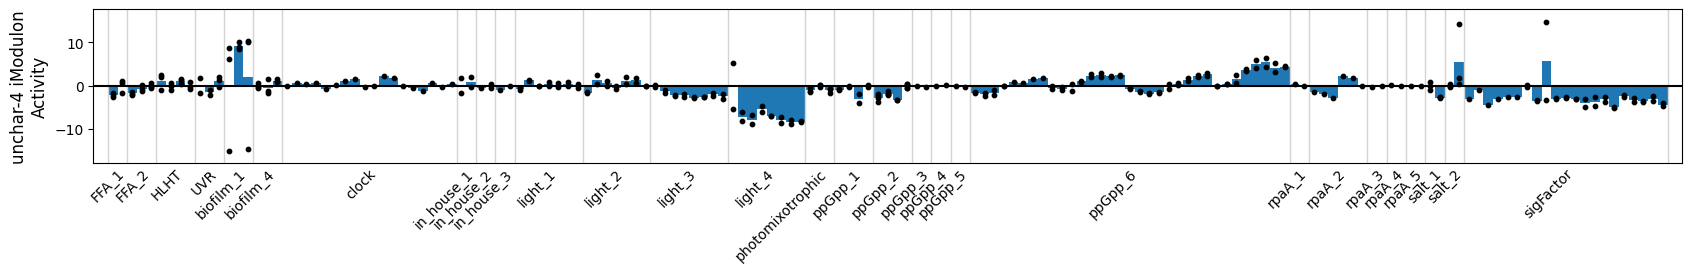

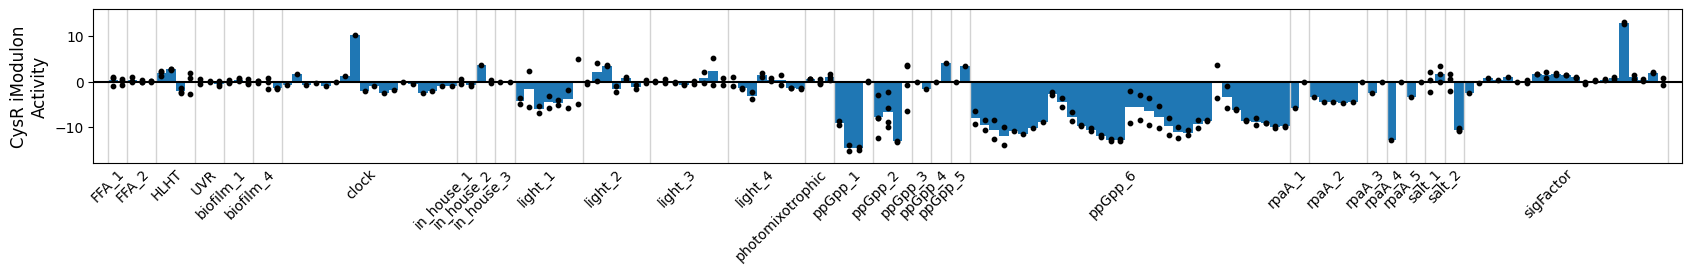

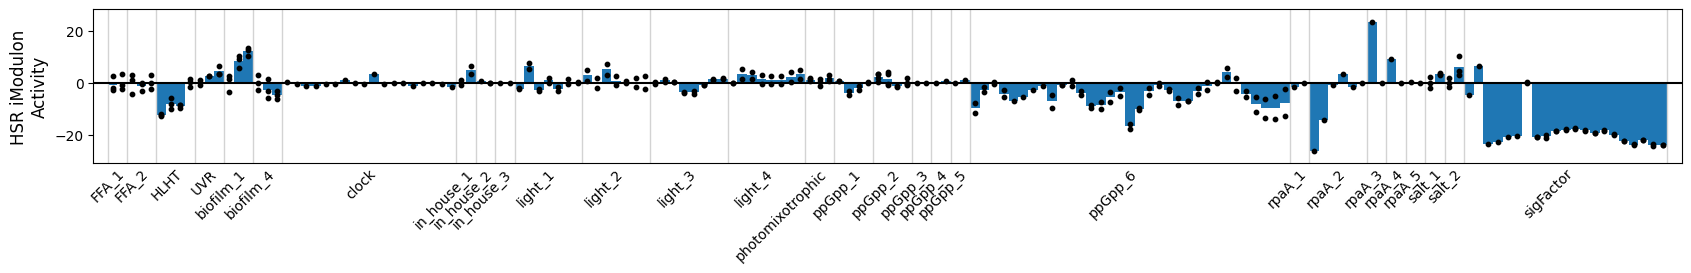

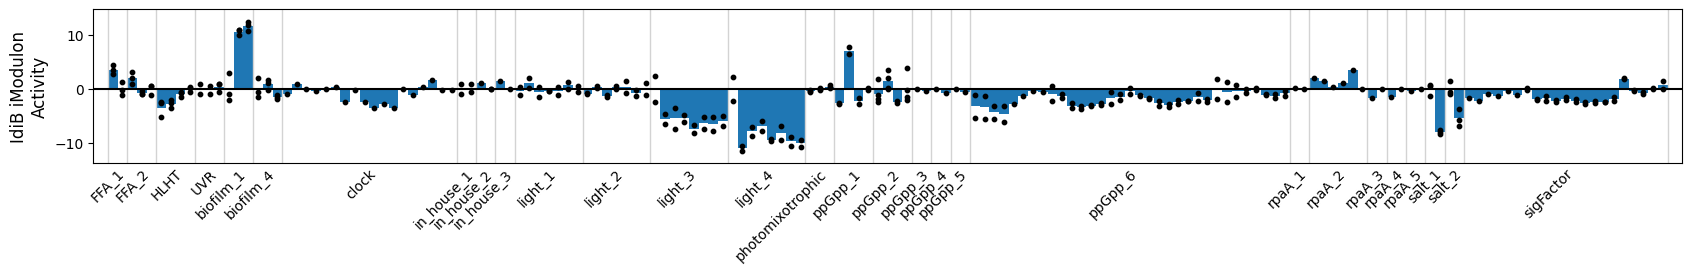

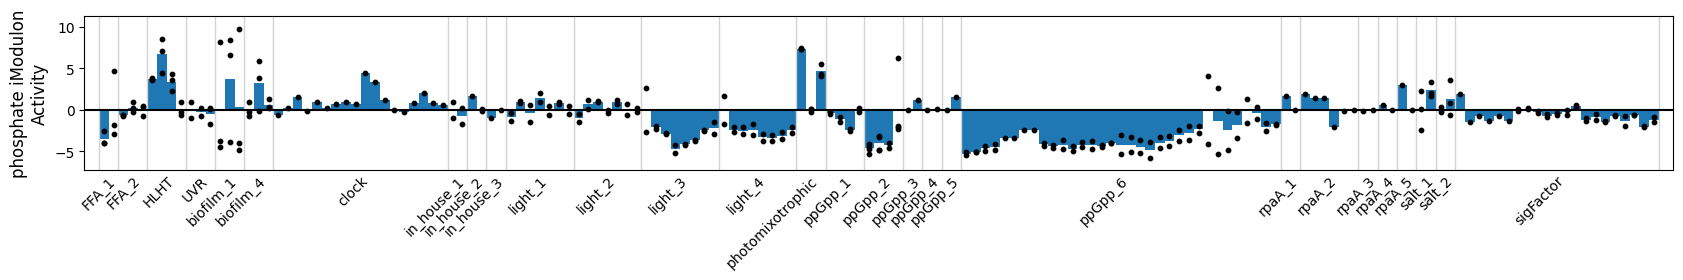

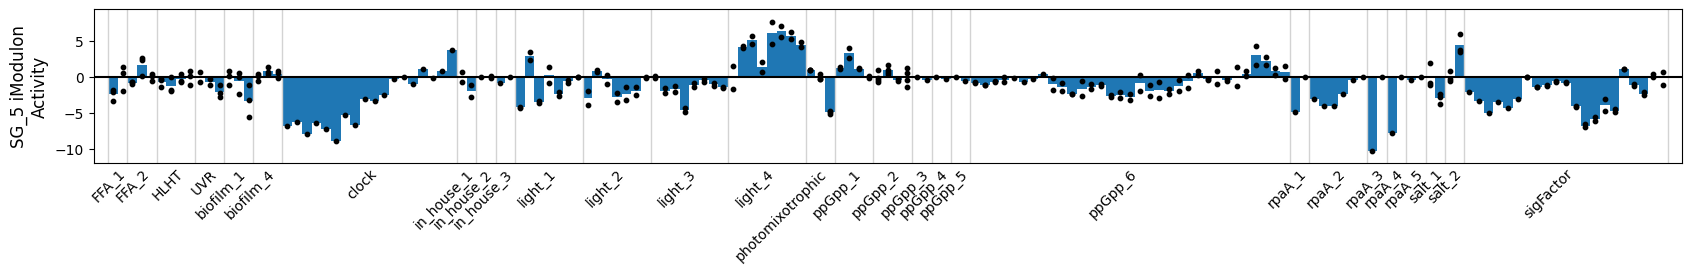

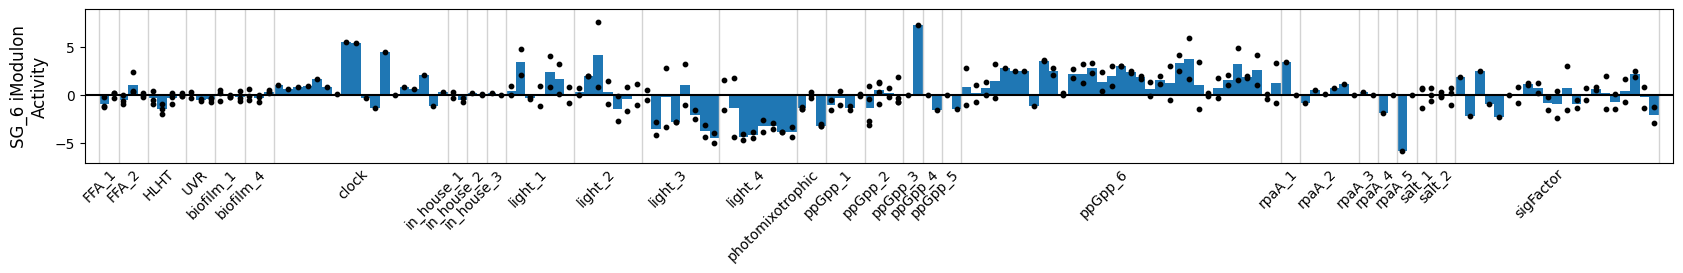

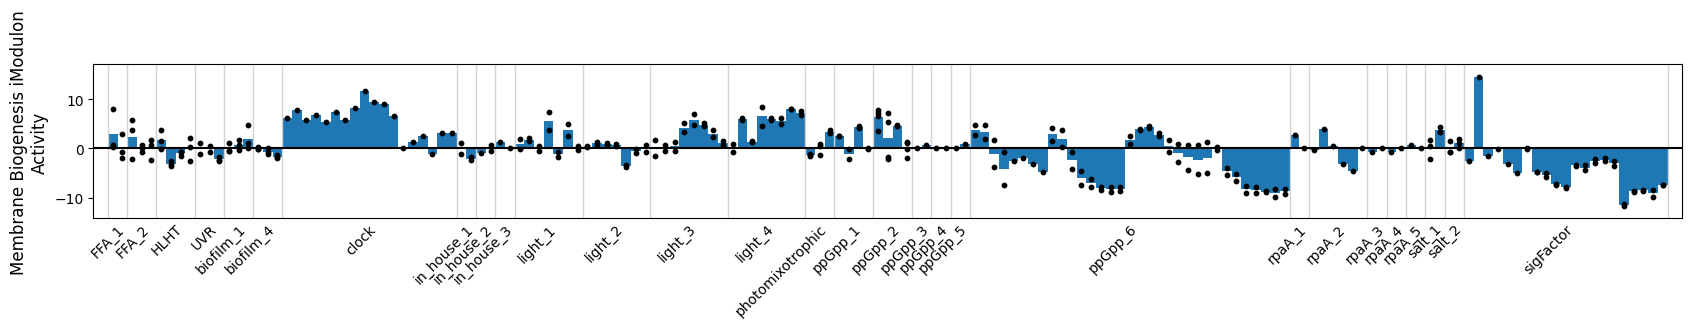

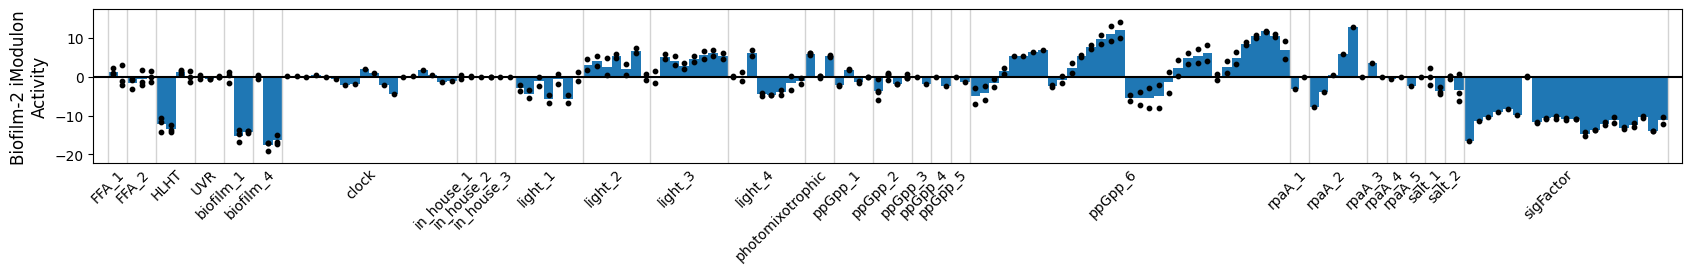

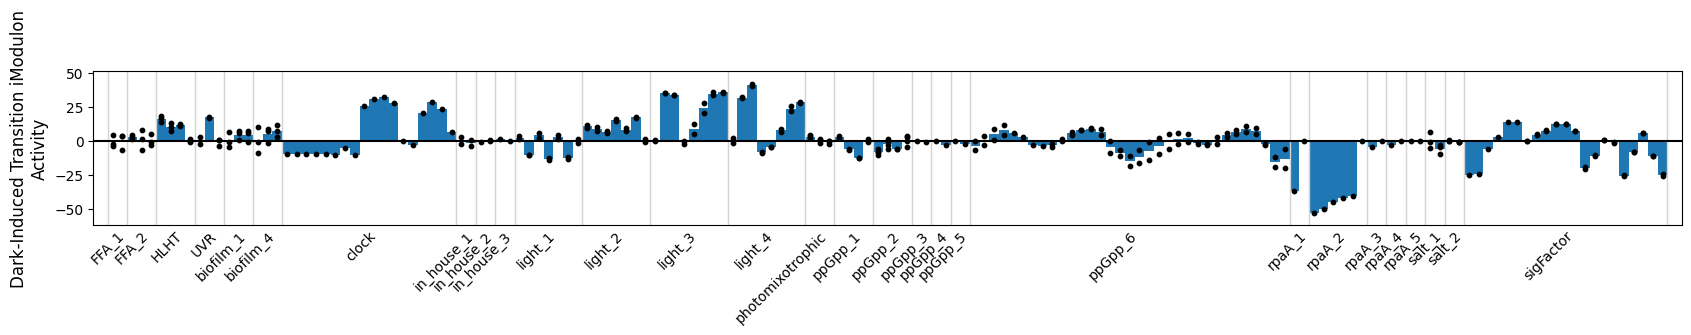

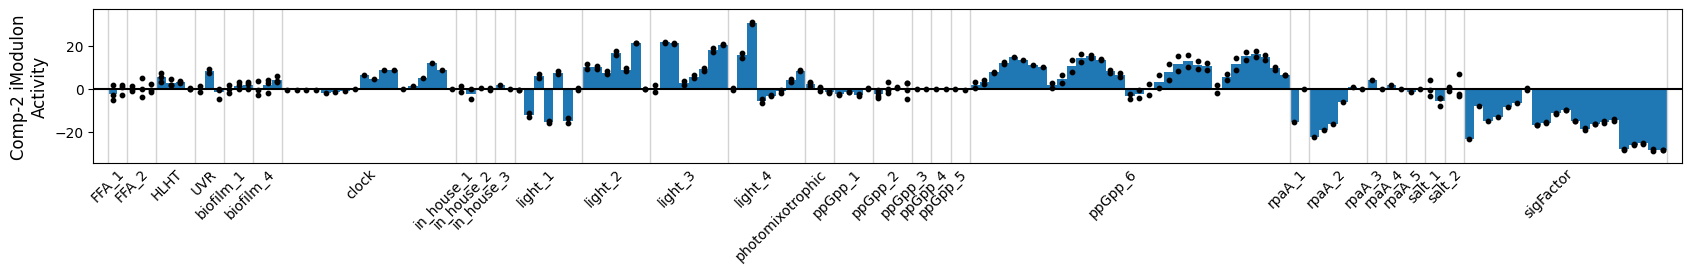

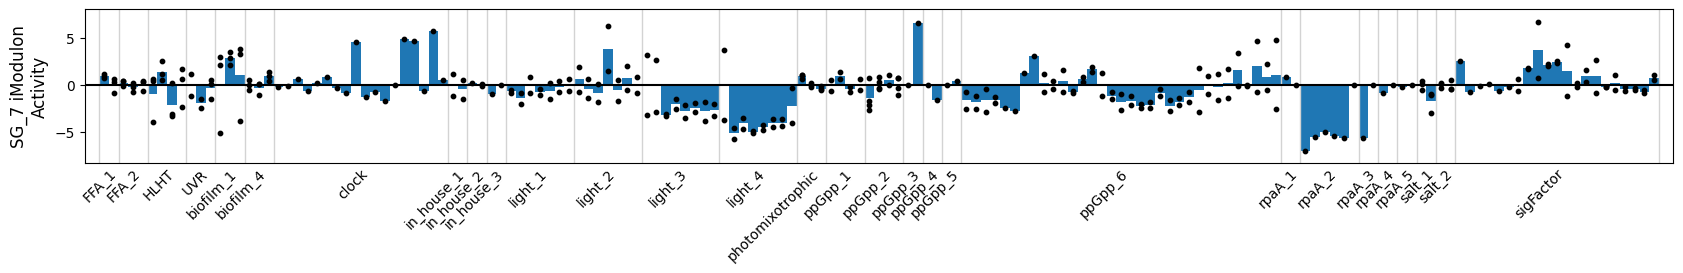

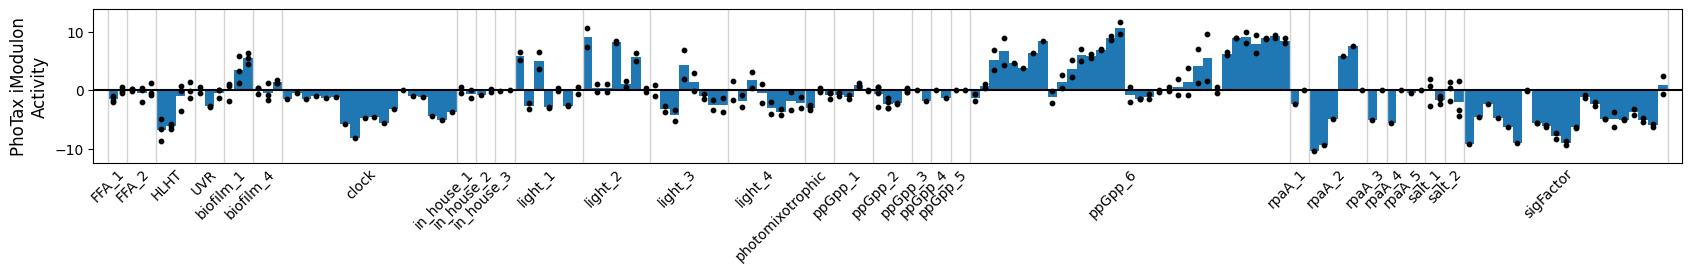

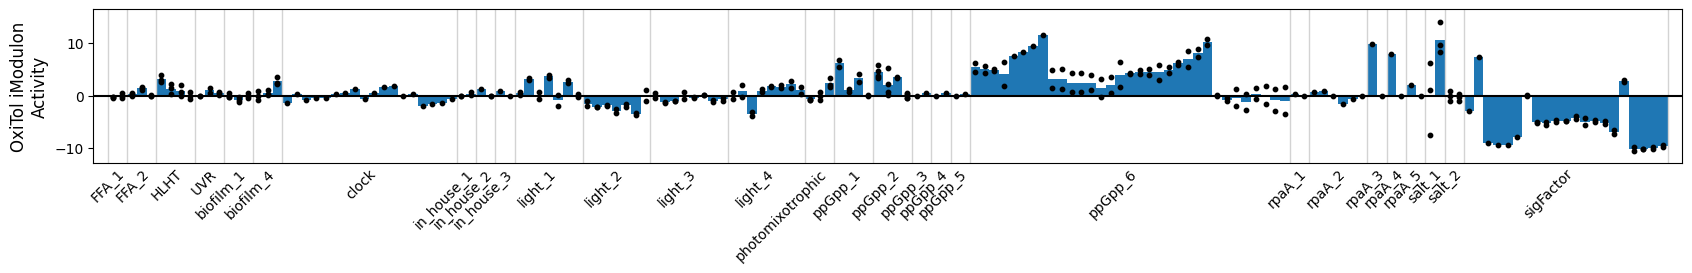

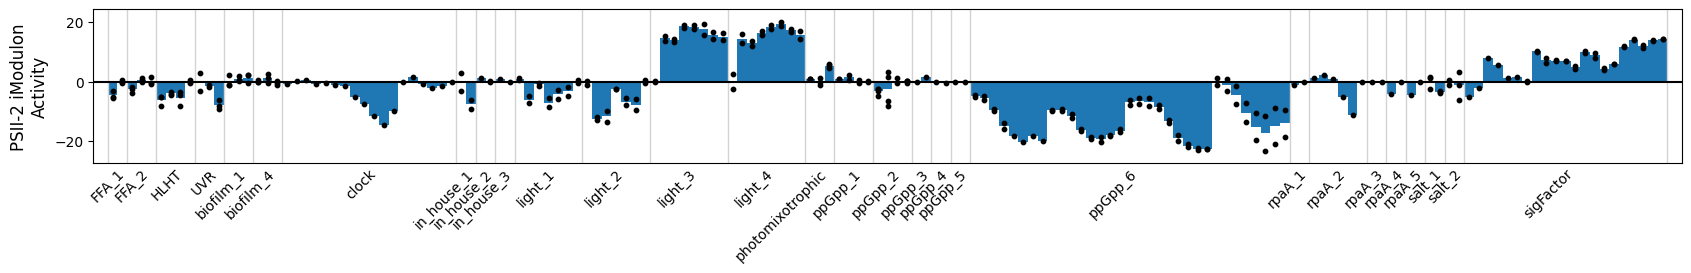

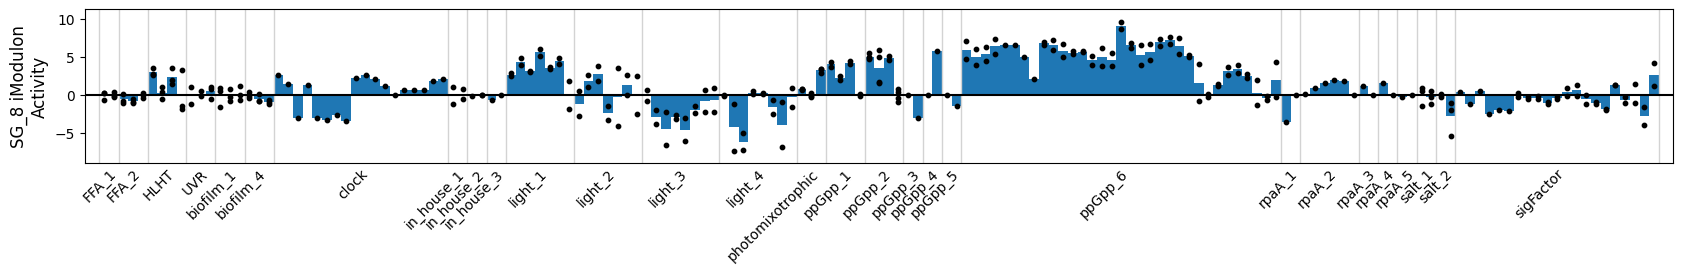

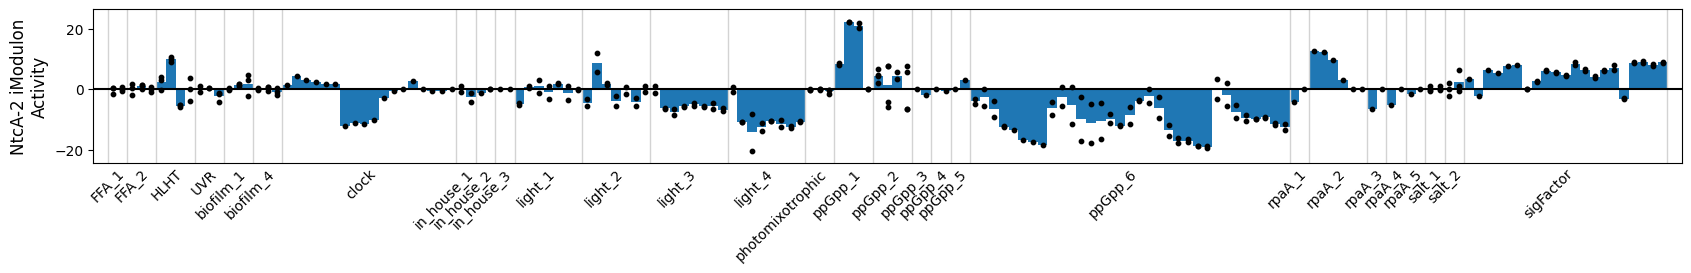

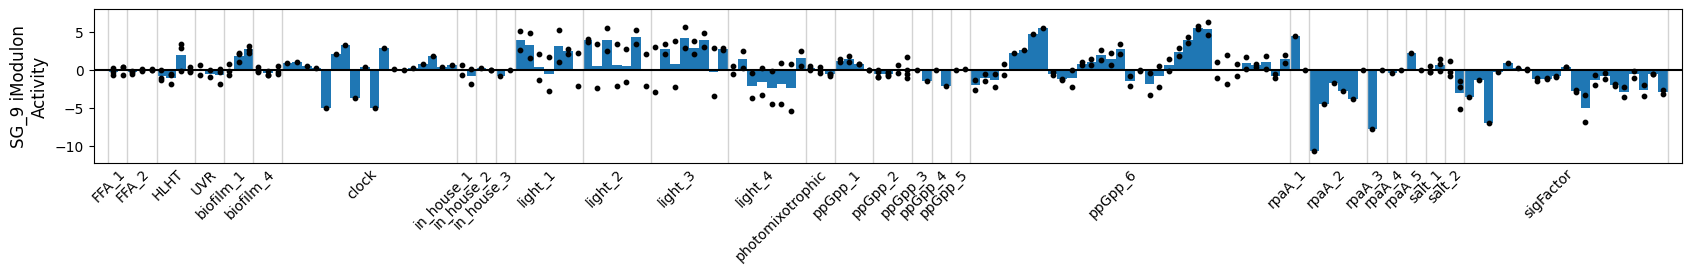

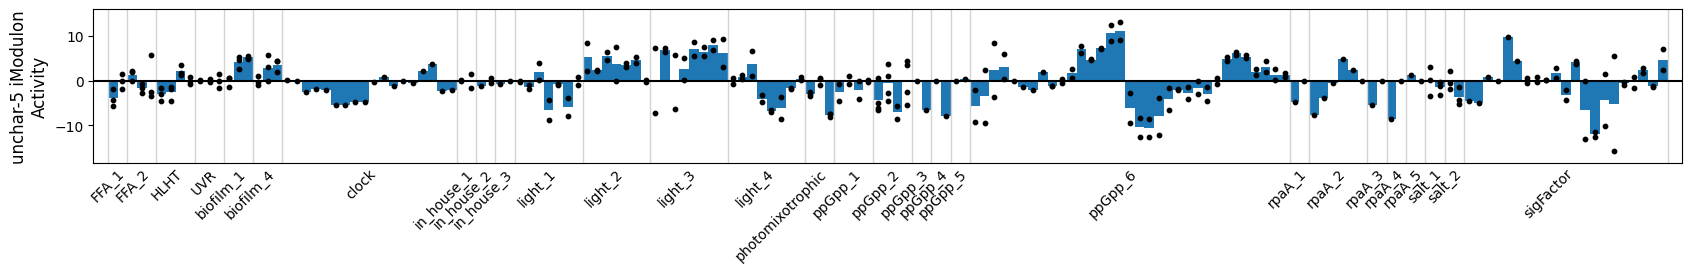

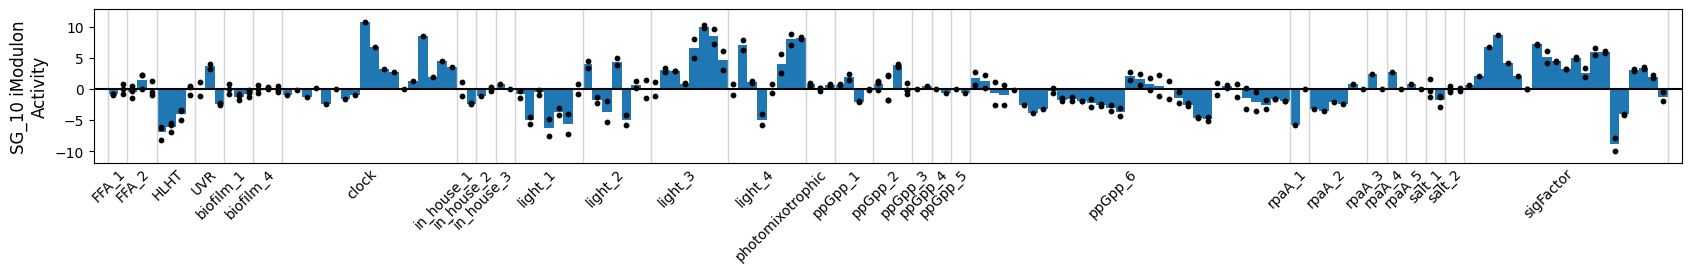

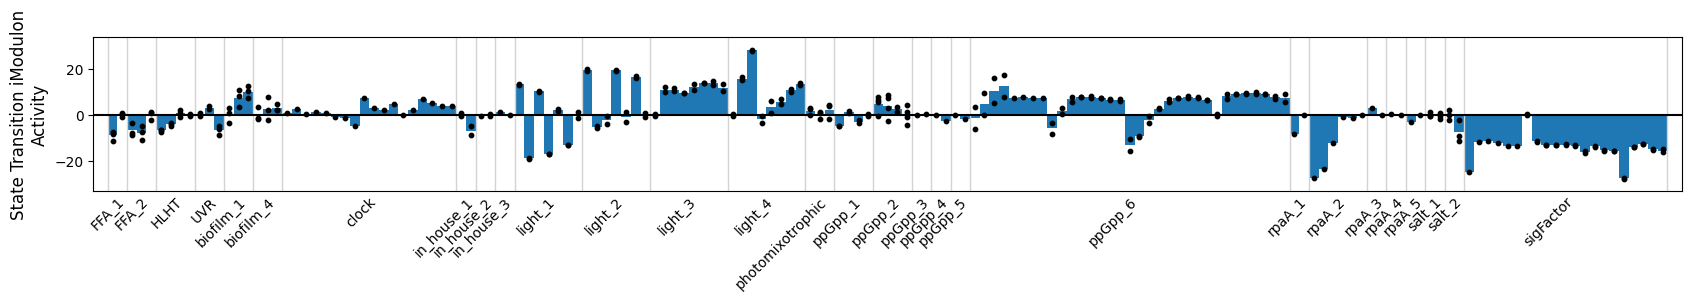

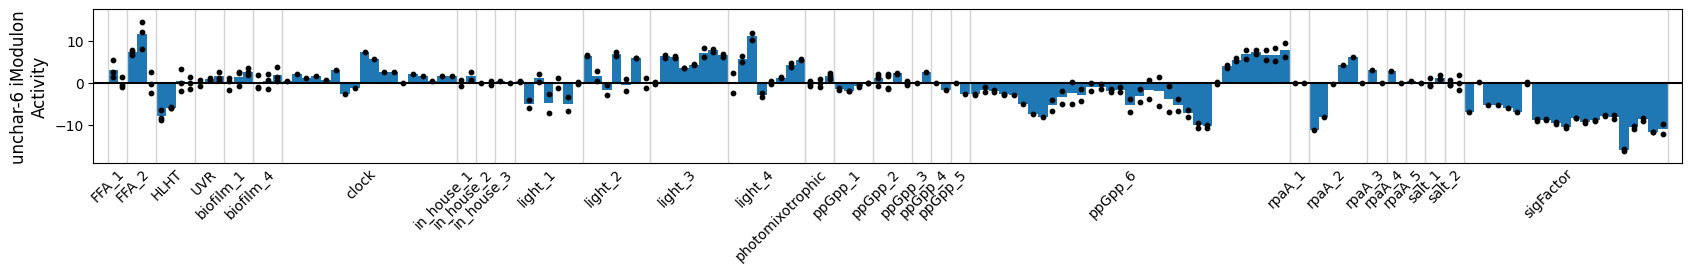

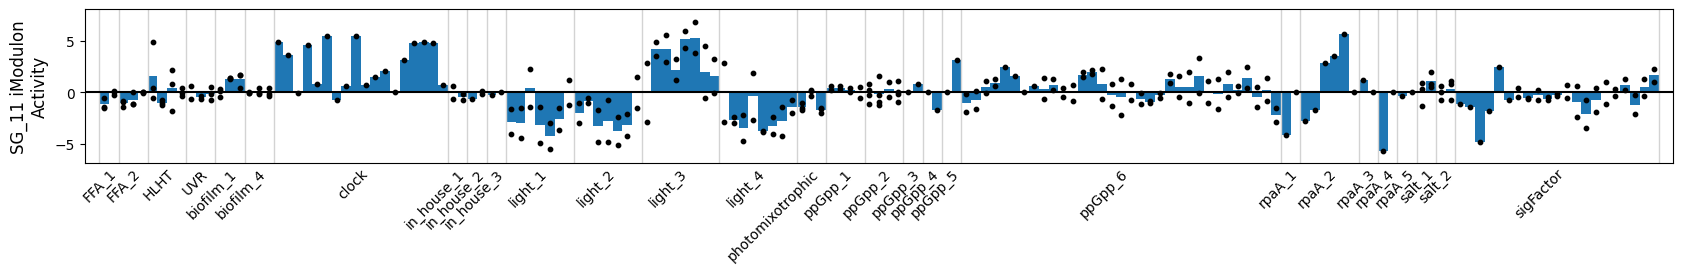

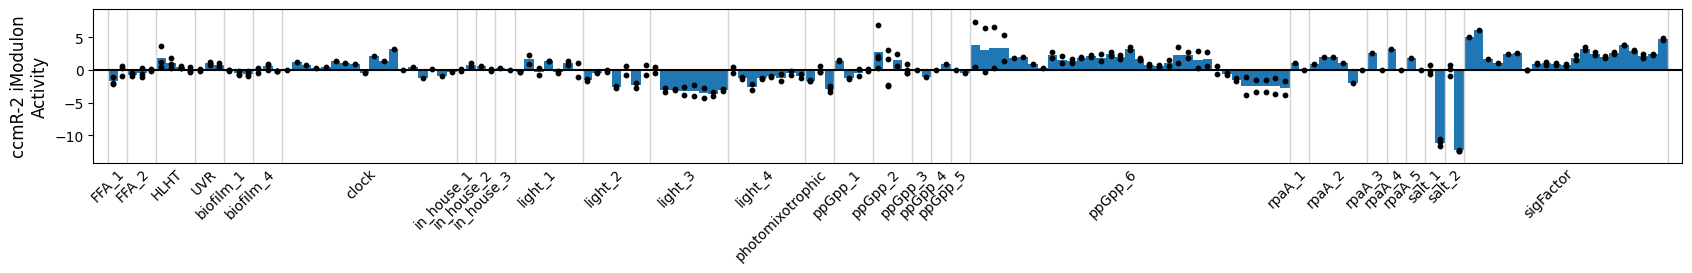

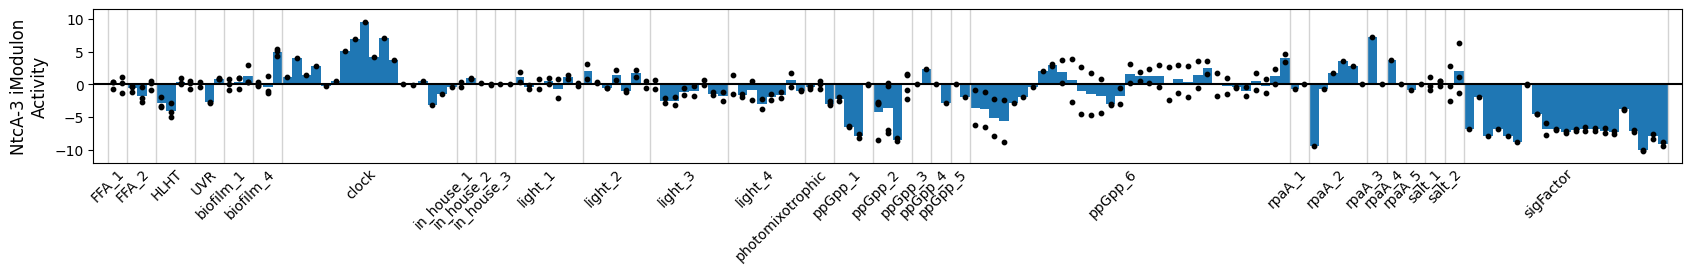

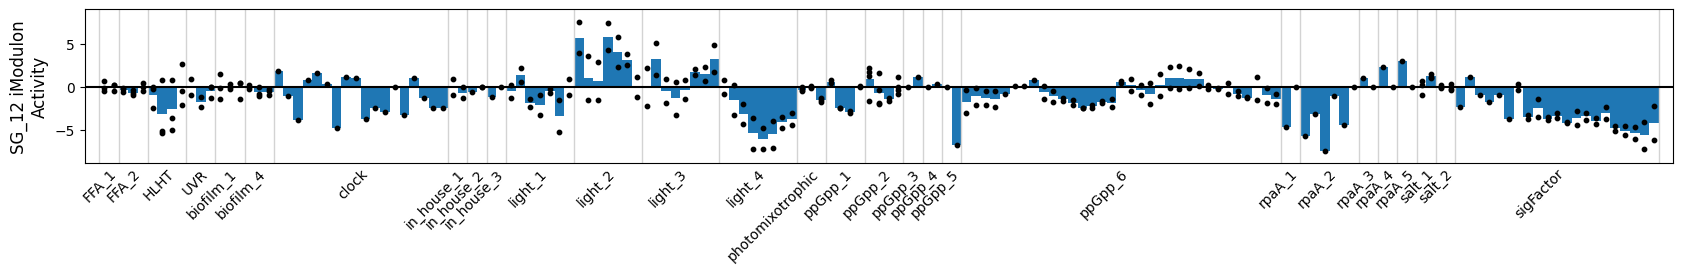

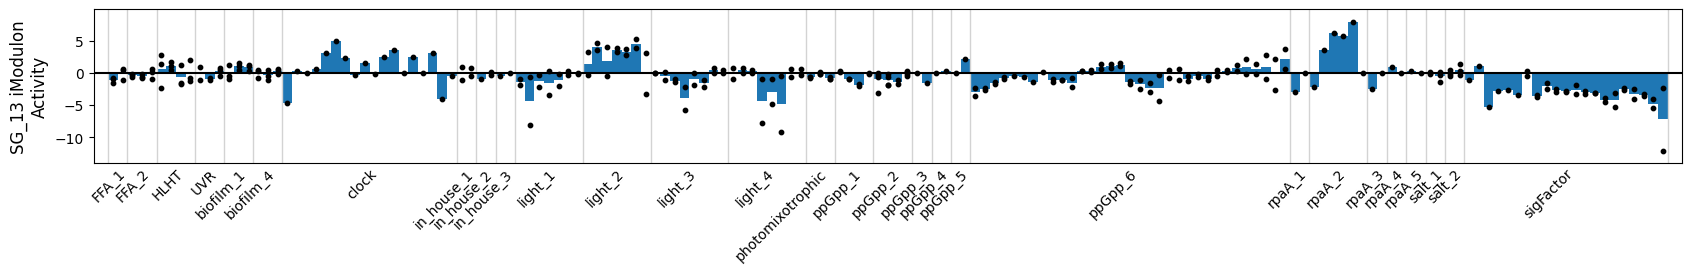

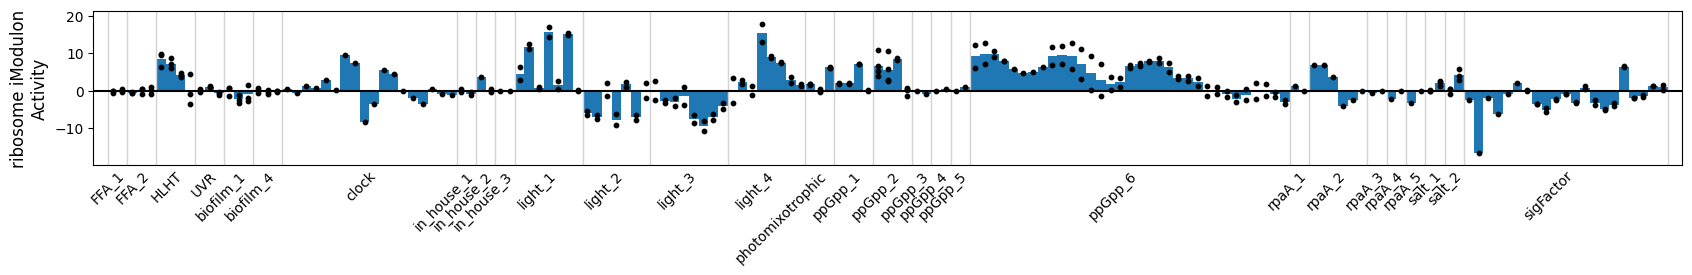

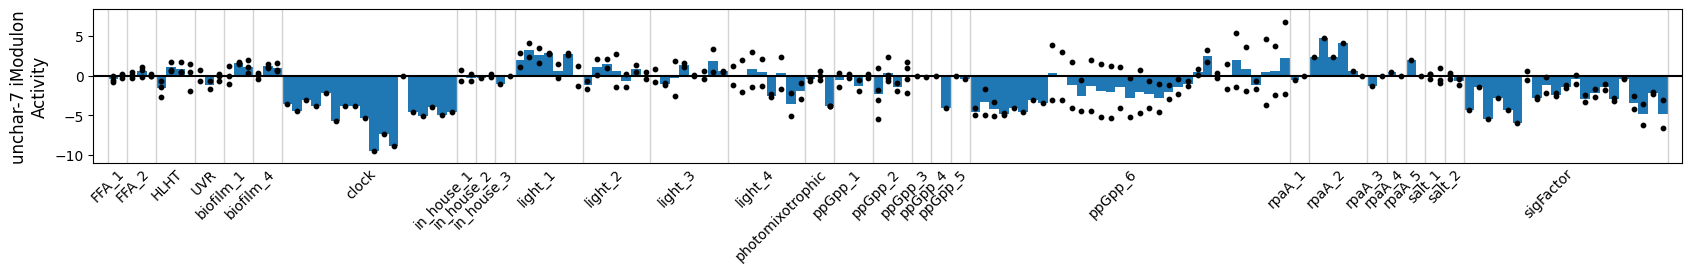

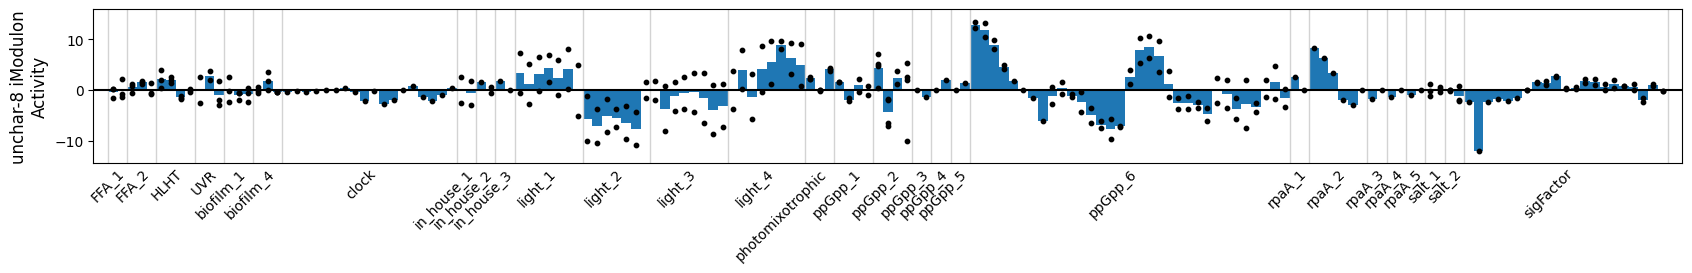

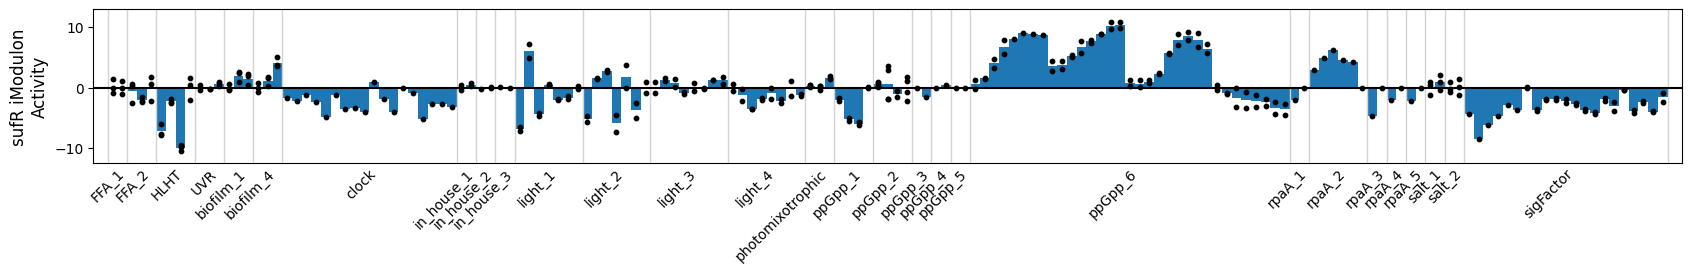

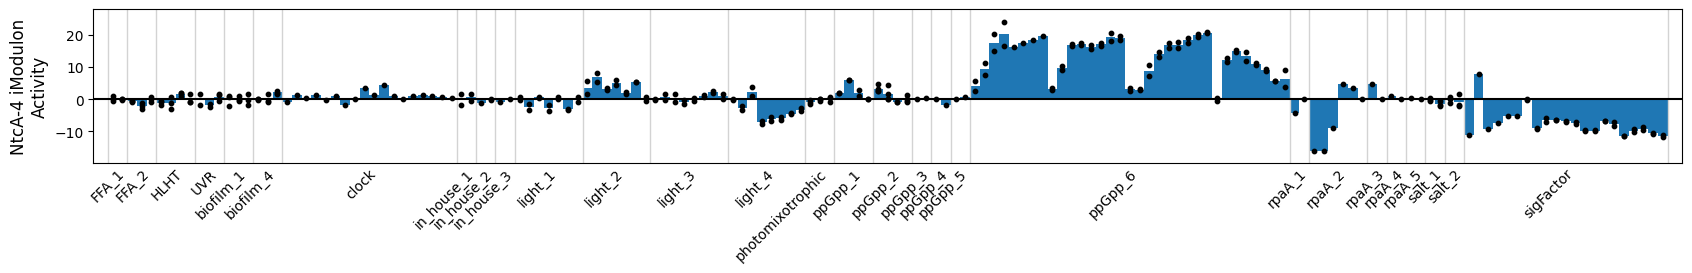

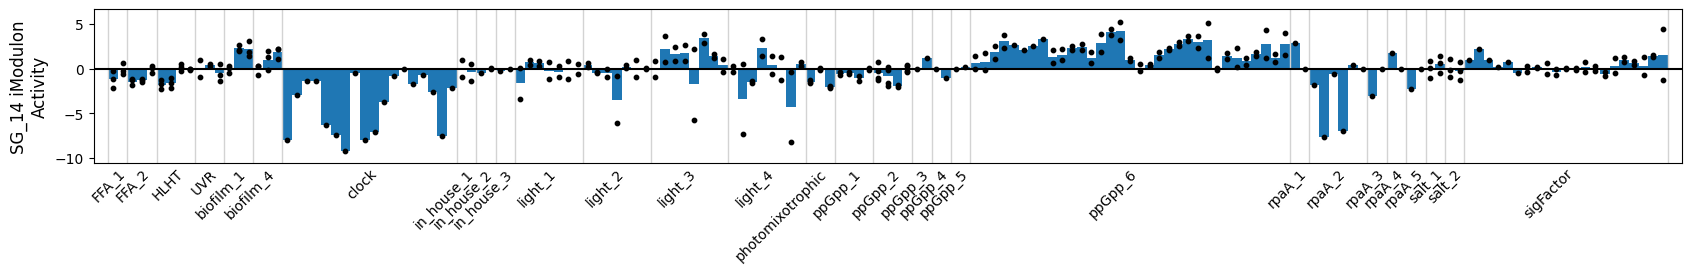

In [347]:
for i in ica_data.imodulon_names:
    plot_activities(ica_data,i)

In [160]:
ica_data.imodulon_table.reset_index()

index regulator        pvalue        qvalue  precision  \
0                       ccm                     NaN           NaN        NaN   
1                    PSII_1                     NaN           NaN        NaN   
2                ribosome_1                     NaN           NaN        NaN   
3                      SG_1                     NaN           NaN        NaN   
4                      SG_2                     NaN           NaN        NaN   
5                      RpaA                     NaN           NaN        NaN   
6                        UV                     NaN           NaN        NaN   
7                  unchar_1                     NaN           NaN        NaN   
8                  unchar_2                     NaN           NaN        NaN   
9                      SG_3                     NaN           NaN        NaN   
10                     SG_4                     NaN           NaN        NaN   
11                 unchar_3                     NaN           NaN        NaN   
12                      anL                     NaN           NaN        NaN   
13                   ccmR-1      ccmR  1.397716e-10  1.397716e-10   0.227273   
14                    sigA2                     NaN           NaN        NaN   
15                 livJHMGF                     NaN           NaN        NaN   
16       cytochrome_oxidase                     NaN           NaN        NaN   
17             heat_shock_1                     NaN           NaN        NaN   
18                     iron                     NaN           NaN        NaN   
19               OxPh_NADPH                     NaN           NaN        NaN   
20                 unchar_4                     NaN           NaN        NaN   
21                   NtcA-1      ntcA  1.258998e-25  2.517997e-25   0.750000   
22                Biofilm-1                     NaN           NaN        NaN   
23            Phage Related                     NaN           NaN        NaN   
24                 unchar_5                     NaN           NaN        NaN   
25                     CysR                     NaN           NaN        NaN   
26             heat_shock_2                     NaN           NaN        NaN   
27                     IdiB                     NaN           NaN        NaN   
28                phosphate                     NaN           NaN        NaN   
29                     SG_5                     NaN           NaN        NaN   
30                     SG_6                     NaN           NaN        NaN   
31      Membrane Biogenesis                     NaN           NaN        NaN   
32                Biofilm-2                     NaN           NaN        NaN   
33  Dark-Induced Transition                     NaN           NaN        NaN   
34                   Comp-2                     NaN           NaN        NaN   
35                     SG_7                     NaN           NaN        NaN   
36               phototaxis                     NaN           NaN        NaN   
37                   OxiTol                     NaN           NaN        NaN   
38                   PSII_2                     NaN           NaN        NaN   
39                     SG_8                     NaN           NaN        NaN   
40                   NtcA-2      ntcA  2.770449e-09  8.311348e-09   0.175000   
41                     SG_9                     NaN           NaN        NaN   
42                 unchar_6                     NaN           NaN        NaN   
43                    SG_10                     NaN           NaN        NaN   
44         State Transition                     NaN           NaN        NaN   
45                 unchar_7                     NaN           NaN        NaN   
46                    SG_11                     NaN           NaN        NaN   
47                   ccmR-2      ccmR  4.965229e-10  9.930457e-10   0.500000   
48                   NtcA-3                     NaN           NaN        NaN   
49                    

In [199]:
ica_data.rename_imodulons({'Phage Related':'phage_related'})
# ica_data.imodulon_table.loc['cytochrome_oxidase','category'] = 'functional'
save_to_json(ica_data, path.join(data_dir, 'ica_wip.json.gz'))
ica_data.imodulon_table.to_csv(path.join(data_dir, 'imodulon_table.csv'))

CysR: defining regulon if can't find one <br>
unchar-8 is related to ribosome/translation -- clustering <br>
ntcA -- regulon validation <br>
phage_related -- worth more digging? <br>
IdiB and biofilms? <br>
Dark-Induced Transition <br>

In [240]:
for i in ica_data.imodulon_names:
    cor = ica_data.A.loc[i].corr(ica_data.A.loc['Comp-2'])
    if cor > 0.7:
        print((i,cor))

('unchar_3', 0.7839237091903375)
('Comp-2', 0.9999999999999998)
('State Transition', 0.8477240333796366)


In [15]:
df = pd.read_csv('/home/annie/Downloads/merged_log_tpm_norm_qc.csv',index_col=0)

In [234]:
ica_data.view_imodulon('Comp-2')

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0069      0.176756  Synpcc7942_0069  CP000100.1                 
Synpcc7942_0085      0.059596  Synpcc7942_0085  CP000100.1                 
Synpcc7942_0086      0.070878             glgX  CP000100.1                 
Synpcc7942_0100      0.133701  Synpcc7942_0100  CP000100.1                 
Synpcc7942_0195      0.054057  Synpcc7942_0195  CP000100.1                 
Synpcc7942_0312      0.161766  Synpcc7942_0312  CP000100.1                 
Synpcc7942_0370      0.081197             metY  CP000100.1                 
Synpcc7942_0422      0.066150  Synpcc7942_0422  CP000100.1                 
Synpcc7942_0498      0.073428             cpsB  CP000100.1                 
Synpcc7942_0499      0.176308  Synpcc7942_0499  CP000100.1                 
Synpcc7942_0573      0.159744  Synpcc7942_0573  CP000100.1                 
Synpcc7942_0703      0.202762             dprA  CP000100.1                 
Synpcc7942_0704      0.123453              cat  CP000100.1                 
Synpcc7942_0705      0.112557  Synpcc7942_0705  CP000100.1                 
Synpcc7942_0768      0.071236  Synpcc7942_0768  CP000100.1                 
Synpcc7942_0769      0.066971  Synpcc7942_0769  CP000100.1                 
Synpcc7942_0770      0.054656  Synpcc7942_0770  CP000100.1                 
Synpcc7942_1027     -0.056095  Synpcc7942_1027  CP000100.1                 
Synpcc7942_1040      0.146066  Synpcc7942_1040  CP000100.1                 
Synpcc7942_1041      0.091948  Synpcc7942_1041  CP000100.1                 
Synpcc7942_1227      0.153672             radC  CP000100.1                 
Synpcc7942_1301      0.071385             recQ  CP000100.1                 
Synpcc7942_1419      0.086222             chlL  CP000100.1                 
Synpcc7942_1420      0.098170             chlN  CP000100.1                 
Synpcc7942_1445      0.065149  Synpcc7942_1445  CP000100.1                 
Synpcc7942_1446      0.069360  Synpcc7942_1446  CP000100.1                 
Synpcc7942_1579      0.097382  Synpcc7942_1579  CP000100.1                 
Synpcc7942_1636      0.110132             phhB  CP000100.1                 
Synpcc7942_1784      0.203489            sigF2  CP000100.1                 
Synpcc7942_2115      0.128856  Synpcc7942_2115  CP000100.1                 
Synpcc7942_2233      0.062931  Synpcc7942_2233  CP000100.1                 
Synpcc7942_2301      0.062598  Synpcc7942_2301  CP000100.1                 
Synpcc7942_2352      0.058139             yfiA  CP000100.1                 
Synpcc7942_2404      0.056361                -  CP000100.1                 
Synpcc7942_2458      0.072536  Synpcc7942_2458  CP000100.1                 
Synpcc7942_2552      0.098514             hypB  CP000100.1                 
Synpcc7942_2553      0.111659             hypA  CP000100.1                 
Synpcc7942_2554      0.111068             hupW  CP000100.1                 
Synpcc7942_B2628     0.055927             srpK  CP000101.1                 
Synpcc7942_B2655     0.054095            anL58  CP000101.1                 
Synpcc7942_B2632     0.165165            anL59  CP000101.1                 

                    start      end strand  \
Synpcc7942_0069     69079    69375      +   
Synpcc7942_0085     82179    82865      -   
Synpcc7942_0086     82871    84955      -   
Synpcc7942_0100    100528   101082      -   
Synpcc7942_0195    195630   196058      +   
Synpcc7942_0312    311280   311708      -   
Synpcc7942_0370    363763   365067      +   
Synpcc7942_0422    412147   413289      +   
Synpcc7942_0498    484585   487098      +   
Synpcc7942_0499    487375   488370      -   
Synpcc7942_0573    555297   555533      -   
Synpcc7942_0703    694072   695280      +   
Synpcc7942_0704    695313   695948      +   
Synpcc7942_0705    695935   696570      +   
Synpcc7942_0768    760522   761178      +   
Synpcc7942_0769    761226   762128      +   
Synpcc7942_0770    762159   763643      +   
Synpcc7942_1027

<AxesSubplot:xlabel='Gene Start', ylabel='Dark-Induced Transition Gene Weight'>

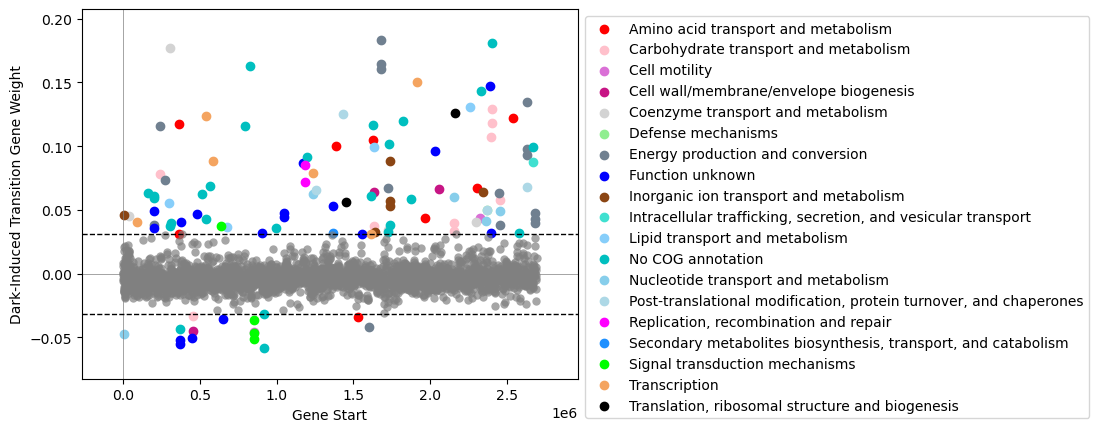

In [226]:
plot_gene_weights(ica_data,'Dark-Induced Transition')

/home/annie/anaconda3/envs/modulome/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


<AxesSubplot:xlabel='phosphate'>

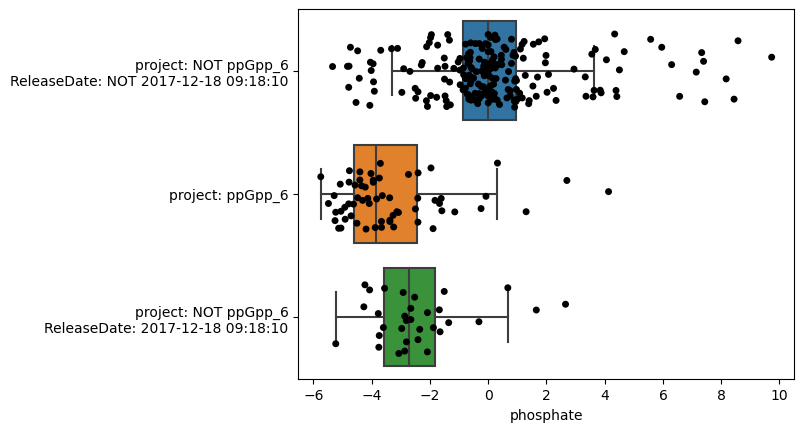

In [213]:
metadata_boxplot(ica_data,'phosphate')

<AxesSubplot:ylabel='Dark-Induced Transition iModulon\nActivity'>

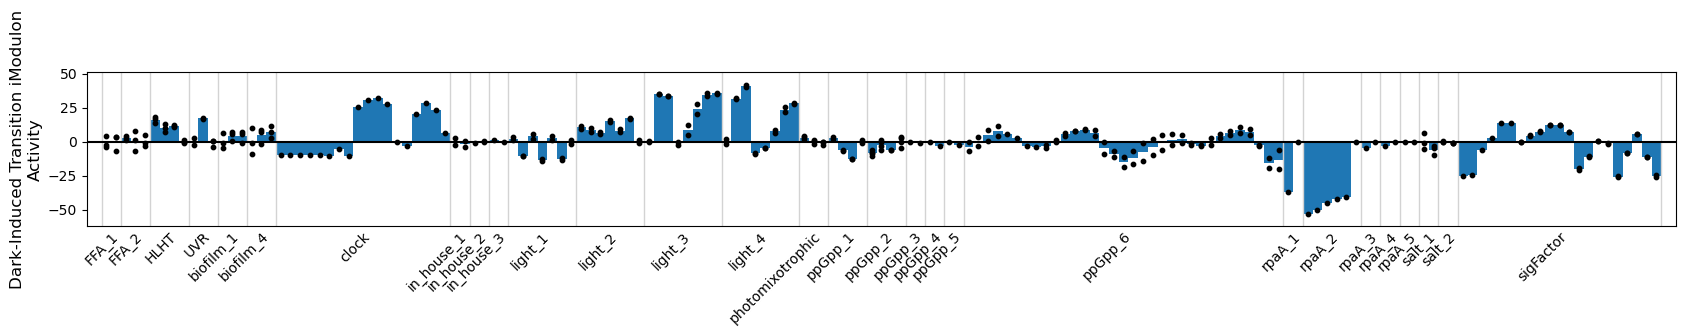

In [227]:
plot_activities(ica_data,'Dark-Induced Transition')

<AxesSubplot:ylabel='Dark-Induced Transition iModulon\nActivity'>

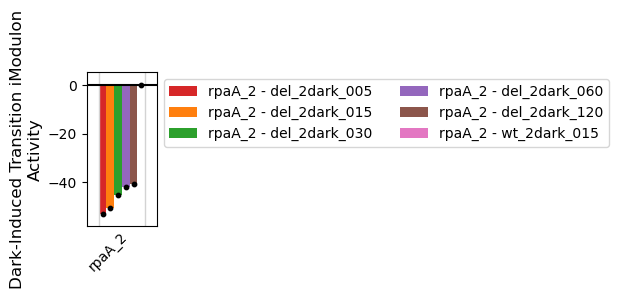

In [232]:
plot_activities(ica_data,'Dark-Induced Transition',projects='rpaA_2')

<AxesSubplot:ylabel='phototaxis iModulon\nActivity'>

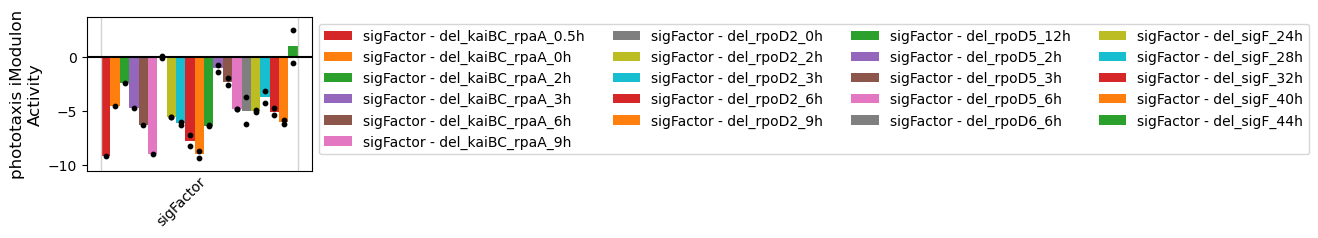

In [95]:
plot_activities(ica_data,'phototaxis',projects='sigFactor')

<AxesSubplot:ylabel='IdiB iModulon\nActivity'>

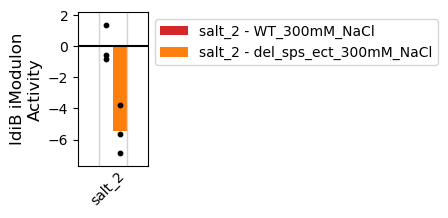

In [32]:
plot_activities(ica_data,'IdiB',projects='salt_2')

<AxesSubplot:ylabel='Fur-Like iModulon\nActivity'>

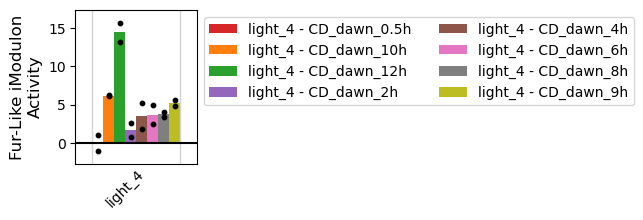

In [27]:
plot_activities(ica_data,'Fur-Like',projects='light_4')

<AxesSubplot:ylabel='unchar-2 iModulon\nActivity'>

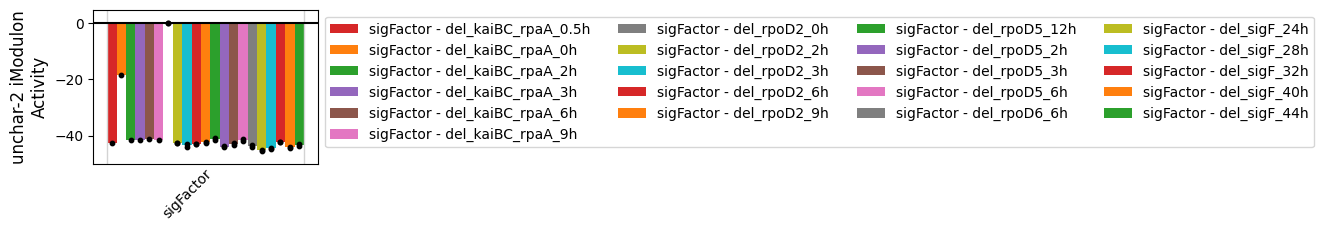

In [622]:
plot_activities(ica_data,'unchar-2',projects='sigFactor')

<AxesSubplot:xlabel='Biofilm-1 Gene Weight', ylabel='Biofilm-2 Gene Weight'>

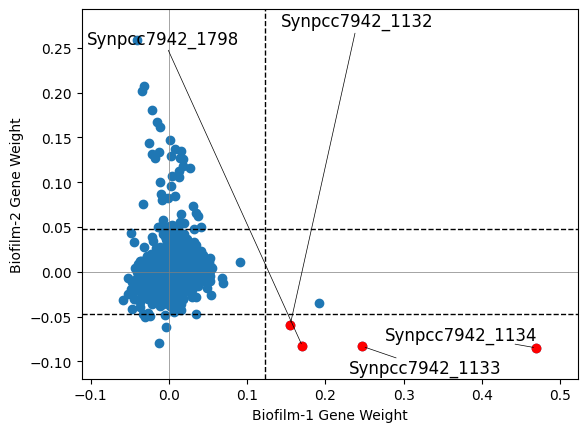

In [575]:
compare_gene_weights(ica_data,'Biofilm-1','')

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

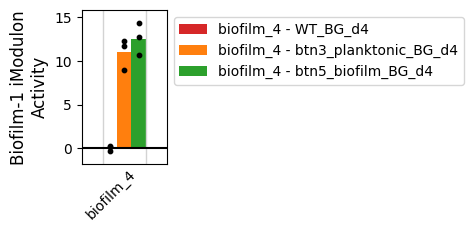

In [584]:
plot_activities(ica_data,'Biofilm-1',projects='biofilm_4')

<AxesSubplot:ylabel='unchar-1 iModulon\nActivity'>

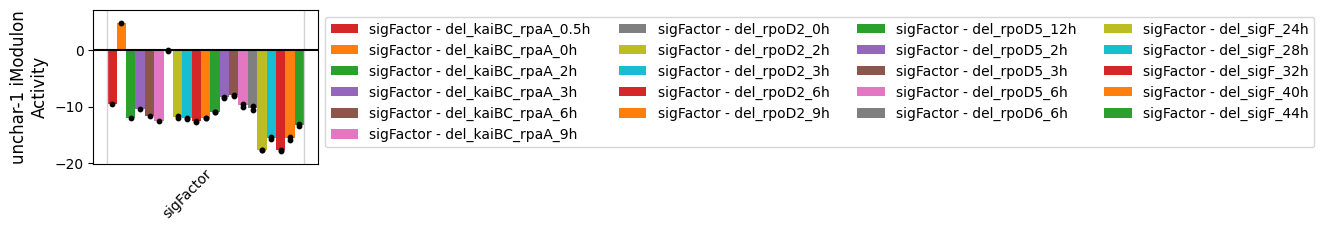

In [570]:
plot_activities(ica_data,'unchar-1',projects='sigFactor')

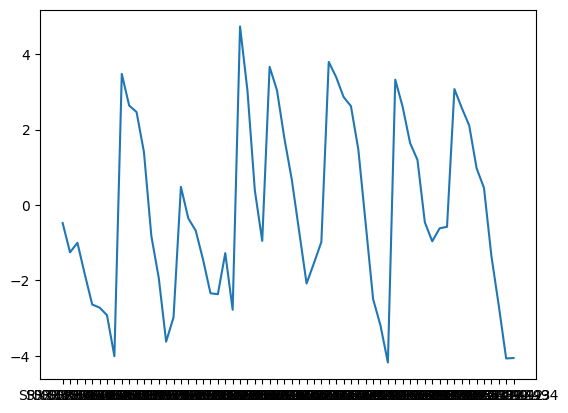

In [516]:
plt.plot(ica_data.A[ppgpp6_idx].loc['RpaB'])

<AxesSubplot:xlabel='unchar-2 Gene Weight', ylabel='Number of Genes'>

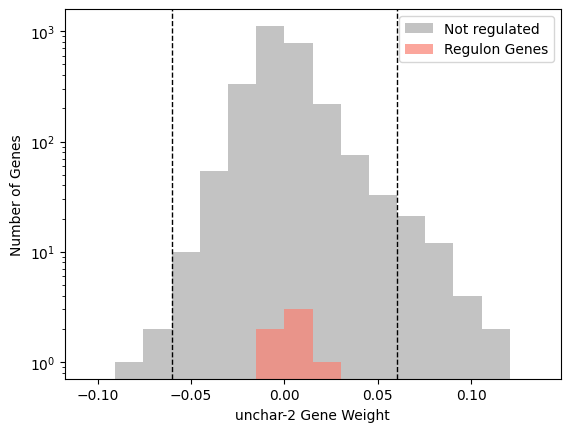

In [460]:
plot_regulon_histogram(ica_data,'PSII-1','ccmR')

<AxesSubplot:xlabel='NtcA-2 iModulon Activity', ylabel='NtcA-1 iModulon Activity'>

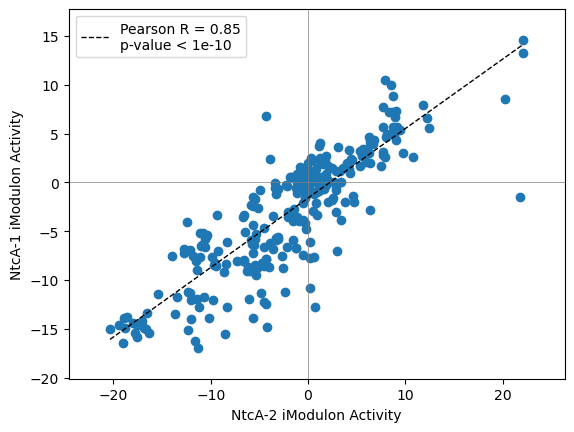

In [179]:
compare_activities(ica_data,'NtcA-2','NtcA-1')

In [169]:
ccmr = set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id)

In [173]:
ccmr1 = set(ica_data.view_imodulon('NtcA-1').index)

In [174]:
ccmr2 = set(ica_data.view_imodulon('NtcA-2').index)

In [176]:
from matplotlib_venn import venn2, venn3

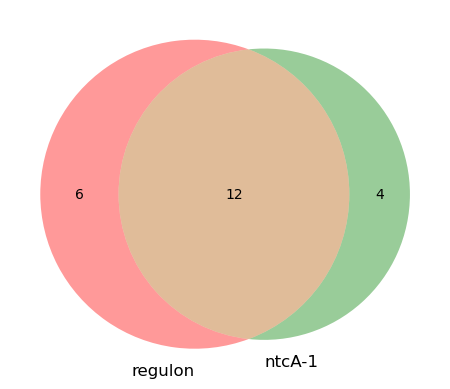

In [181]:
venn2([ccmr,ccmr1],set_labels=('regulon','ntcA-1'))

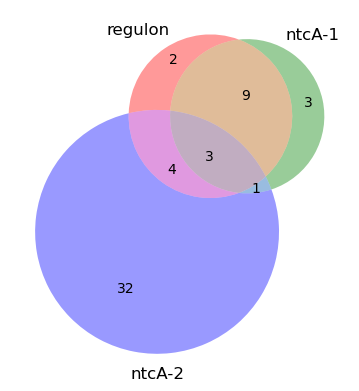

In [178]:
venn3([ccmr,ccmr1,ccmr2],set_labels=('regulon','ntcA-1','ntcA-2'))

<AxesSubplot:xlabel='IdiB iModulon Activity', ylabel='Fur-Like iModulon Activity'>

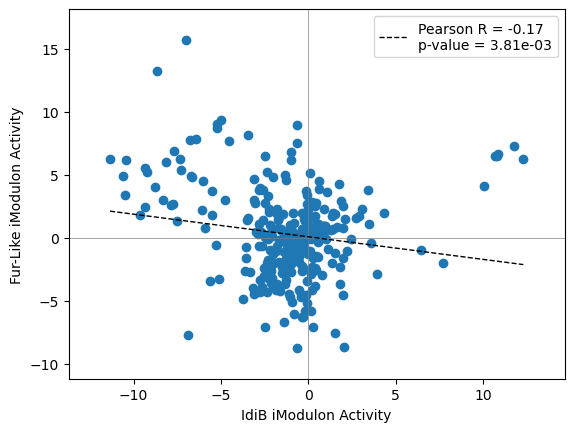

In [28]:
compare_activities(ica_data,'IdiB','Fur-Like')

In [443]:
np.unique([str(x) for x in DF_enrichments.imodulon])

array(['0', '1', '14', '15', '16', '17', '18', '2', '25', '26', '28',
       '33', '36', '38', '42', '5', '51', '6', 'ccmR-1', 'ccmR-2',
       'ntcA-1', 'ntcA-2'], dtype='<U6')

In [601]:
DF_enrichments[DF_enrichments.imodulon=='6'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue        qvalue  precision    recall  \
2        6   map00196  2.293707e-16  4.702100e-14   0.155844  0.750000   
3        6   map00195  1.672395e-11  1.714204e-09   0.194805  0.263158   
4        6   map01100  3.859217e-08  2.637131e-06   0.480519  0.067518   
5        6   map00860  3.142256e-04  1.610406e-02   0.090909  0.148936   
5        6     M00163  9.205161e-06  1.877853e-03   0.051948  0.666667   

    f1score    TP  target_set_size  imodulon_size         source  \
2  0.258065  12.0             16.0           77.0  KEGG pathways   
3  0.223881  15.0             57.0           77.0  KEGG pathways   
4  0.118400  37.0            548.0           77.0  KEGG pathways   
5  0.112903   7.0             47.0           77.0  KEGG pathways   
5  0.096386   4.0              6.0           77.0   KEGG modules   

                        pathway_name    module_name  
2  Photosynthesis - antenna proteins            NaN  
3                     Photosynthesis            NaN  
4                 Metabolic pathways            NaN  
5               Porphyrin metabolism            NaN  
5                                NaN  Photosystem I

### iModulon 1: PSII-1

In [240]:
ica_data.view_imodulon(1).shape

(21, 12)

In [241]:
ica_data.view_imodulon(1)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0113     0.140393  Synpcc7942_0113  CP000100.1                 
Synpcc7942_0456     0.099624             psbK  CP000100.1                 
Synpcc7942_0475     0.198139             petN  CP000100.1                 
Synpcc7942_0696     0.111621             psbT  CP000100.1                 
Synpcc7942_0699     0.120552             psbM  CP000100.1                 
Synpcc7942_0911    -0.085067  Synpcc7942_0911  CP000100.1                 
Synpcc7942_0997     0.069600             rpmF  CP000100.1                 
Synpcc7942_1279     0.096820  Synpcc7942_1279  CP000100.1                 
Synpcc7942_1479     0.136983             petG  CP000100.1                 
Synpcc7942_1483     0.070285  Synpcc7942_1483  CP000100.1                 
Synpcc7942_1687    -0.076006             cysU  CP000100.1                 
Synpcc7942_1702     0.099223  Synpcc7942_1702  CP000100.1                 
Synpcc7942_1705     0.142995             psbI  CP000100.1                 
Synpcc7942_1712     0.102493  Synpcc7942_1712  CP000100.1                 
Synpcc7942_1962     0.132756             psbY  CP000100.1                 
Synpcc7942_2016     0.076709             psbX  CP000100.1                 
Synpcc7942_2060    -0.078238             ylmE  CP000100.1                 
Synpcc7942_2233     0.142648  Synpcc7942_2233  CP000100.1                 
Synpcc7942_2343     0.077652             psaI  CP000100.1                 
Synpcc7942_2426     0.099962             petM  CP000100.1                 
Synpcc7942_2523     0.114871  Synpcc7942_2523  CP000100.1                 

                   start      end strand  \
Synpcc7942_0113   113196   113288      +   
Synpcc7942_0456   445209   445346      +   
Synpcc7942_0475   460449   460544      -   
Synpcc7942_0696   689050   689145      -   
Synpcc7942_0699   691619   691726      +   
Synpcc7942_0911   918998   919249      +   
Synpcc7942_0997  1005256  1005432      -   
Synpcc7942_1279  1301796  1302047      -   
Synpcc7942_1479  1530970  1531083      +   
Synpcc7942_1483  1534449  1534877      -   
Synpcc7942_1687  1754047  1754913      +   
Synpcc7942_1702  1768545  1768682      +   
Synpcc7942_1705  1772946  1773065      +   
Synpcc7942_1712  1780853  1781218      +   
Synpcc7942_1962  2033449  2033571      +   
Synpcc7942_2016  2084803  2084922      -   
Synpcc7942_2060  2137504  2138169      -   
Synpcc7942_2233  2299796  2300113      -   
Synpcc7942_2343  2411023  2411139      -   
Synpcc7942_2426  2498780  2498893      -   
Synpcc7942_2523  2605009  2605266      +   

                                                     gene_product  \
Synpcc7942_0113                              hypothetical protein   
Synpcc7942_0456                       photosystem II PsbK protein   
Synpcc7942_0475              cytochrome b6-f complex subunit VIII   
Synpcc7942_0696                       photosystem II PsbT protein   
Synpcc7942_0699                       photosystem II PsbM protein   
Synpcc7942_0911                    conserved hypothetical protein   
Synpcc7942_0997                        LSU ribosomal protein L32P   
Synpcc7942_1279                              hypothetical protein   
Synpcc7942_1479                 cytochrome b6-f complex subunit 5   
Synpcc7942_1483                    conserved hypothetical protein   
Synpcc7942_1687  Sulfate ABC transporter%2C permease protein CysT   
Synpcc7942_1702                    conserved hypothetical protein   
Synpcc7942_1705                       photosystem II PsbI protein   
Synpcc7942_1712                    conserved hypothetical protein   
Synpcc7942_1962                       photosystem II PsbY protein   
Synpcc7942_2016                       photosystem II PsbX protein   
Synpcc7942_2060               Protein of unknown function UPF0001   
Synpcc7942_2233                              hypothetical protein   
Synpcc7942_2343                        photosystem I PsaI protein   
Synpcc7942_2426  

<AxesSubplot:xlabel='Gene Start', ylabel='1 Gene Weight'>

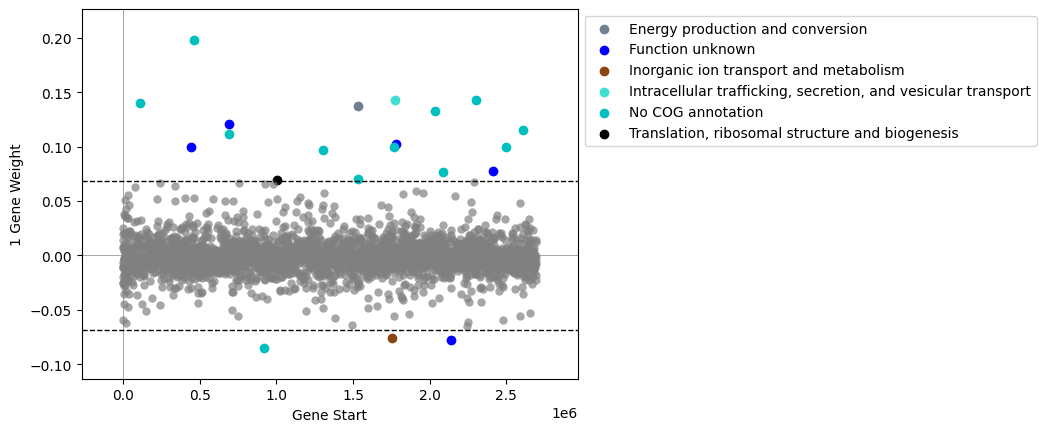

In [243]:
plot_gene_weights(ica_data,1)

<AxesSubplot:ylabel='1 iModulon\nActivity'>

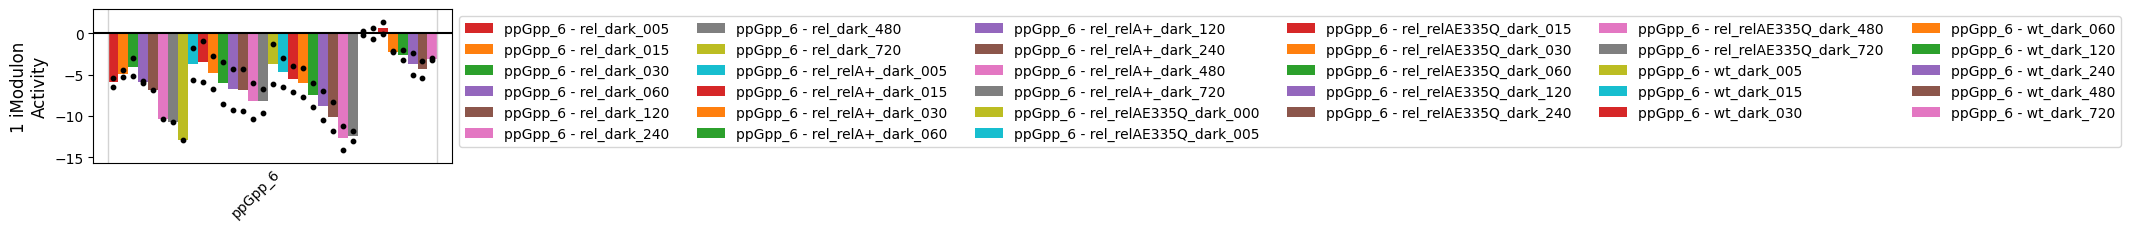

In [245]:
plot_activities(ica_data,1,projects = ['ppGpp_6'])

<AxesSubplot:ylabel='1 iModulon\nActivity'>

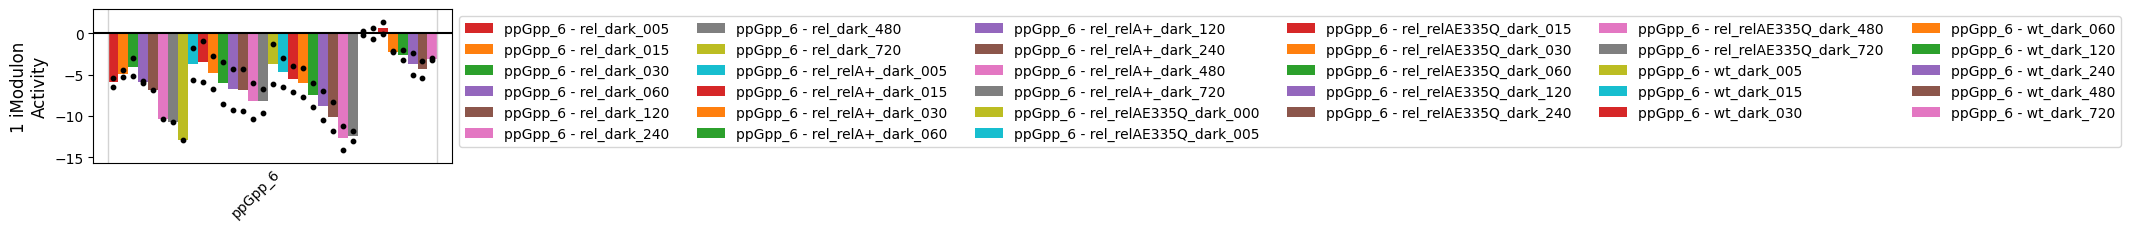

In [246]:
plot_activities(ica_data,1,projects = ['ppGpp_6'])

In [242]:
DF_enrichments[DF_enrichments.imodulon==1].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [249]:
# Update the ICA data object

# ica_data.rename_imodulons({1:'PSII-1'})
# ica_data.imodulon_table.loc['PSII-1','category'] = 'functional'

### iModulon 6: UV

In [14]:
ica_data.view_imodulon('UV')

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0091     0.091744             ubiC  CP000100.1           NaN   
Synpcc7942_0197     0.083055  Synpcc7942_0197  CP000100.1           NaN   
Synpcc7942_0217     0.085053  Synpcc7942_0217  CP000100.1           NaN   
Synpcc7942_0243     0.153191             hliC  CP000100.1           NaN   
Synpcc7942_0297     0.103392            ftsH1  CP000100.1           NaN   
Synpcc7942_0328    -0.082034             apcE  CP000100.1           NaN   
Synpcc7942_0364     0.097234  Synpcc7942_0364  CP000100.1           NaN   
Synpcc7942_0407    -0.114694             psaK  CP000100.1           NaN   
Synpcc7942_0535    -0.112199             psaC  CP000100.1           NaN   
Synpcc7942_0672     0.163190            sigA3  CP000100.1           NaN   
Synpcc7942_0673     0.108624  Synpcc7942_0673  CP000100.1           NaN   
Synpcc7942_0698     0.083172            petF5  CP000100.1           NaN   
Synpcc7942_0893     0.119964            psbA3  CP000100.1           NaN   
Synpcc7942_0942     0.132016            ftsH2  CP000100.1           NaN   
Synpcc7942_0970     0.083292              pds  CP000100.1           NaN   
Synpcc7942_1002    -0.121057             psaD  CP000100.1           NaN   
Synpcc7942_1047    -0.090109            cpcB1  CP000100.1           NaN   
Synpcc7942_1048    -0.075743            cpcA1  CP000100.1           NaN   
Synpcc7942_1049    -0.102416            cpcC1  CP000100.1           NaN   
Synpcc7942_1050    -0.085109            cpcC2  CP000100.1           NaN   
Synpcc7942_1051    -0.082478             cpcD  CP000100.1           NaN   
Synpcc7942_1052    -0.083379            cpcB2  CP000100.1           NaN   
Synpcc7942_1053    -0.075884            cpcA2  CP000100.1           NaN   
Synpcc7942_1090     0.085585  Synpcc7942_1090  CP000100.1           NaN   
Synpcc7942_1120     0.225122  Synpcc7942_1120  CP000100.1           NaN   
Synpcc7942_1249    -0.118214             psaJ  CP000100.1           NaN   
Synpcc7942_1250    -0.131883             psaF  CP000100.1           NaN   
Synpcc7942_1322    -0.133260             psaE  CP000100.1           NaN   
Synpcc7942_1389     0.106584            psbA2  CP000100.1           NaN   
Synpcc7942_1453    -0.084880             rpaB  CP000100.1           NaN   
Synpcc7942_1630    -0.099150            petJ2  CP000100.1           NaN   
Synpcc7942_1822     0.081186  Synpcc7942_1822  CP000100.1           NaN   
Synpcc7942_1840     0.099788  Synpcc7942_1840  CP000100.1           NaN   
Synpcc7942_1858    -0.086985            pbsA1  CP000100.1           NaN   
Synpcc7942_1867     0.103072              phr  CP000100.1           NaN   
Synpcc7942_1868     0.089348  Synpcc7942_1868  CP000100.1           NaN   
Synpcc7942_1983     0.068983             zds2  CP000100.1           NaN   
Synpcc7942_1987    -0.083500             rpaC  CP000100.1           NaN   
Synpcc7942_1997     0.213209             hliA  CP000100.1           NaN   
Synpcc7942_2030    -0.085289             cpcG  CP000100.1           NaN   
Synpcc7942_2088     0.092273  Synpcc7942_2088  CP000100.1           NaN   
Synpcc7942_2127     0.104261             nblA  CP000100.1           NaN   
Synpcc7942_2164     0.075776             lls1  CP000100.1           NaN   
Synpcc7942_2342    -0.108845             psaL  CP000100.1           NaN   
Synpcc7942_2343    -0.112320             psaI  CP000100.1           NaN   
Synpcc7942_2362     0.098512             hepB  CP000100.1           NaN   
Synpcc7942_2414     0.112962  Synpcc7942_2414  CP000100.1           NaN   
Synpcc7942_2416     0.097898  Synpcc7942_2416  CP000100.1           NaN   
Synpcc7942_2425     0.090701            ycf39  CP000100.1           NaN   
Synpcc7942_2503    -0.071350              por  CP000100.1           NaN   

                   start      end strand  \
Synpcc7942_0091    89715    90326      -   
Synpcc7942_0197   197572   198933      -   
Synpcc7942_0217   219113   219871      +   
Synpcc7942_0243

<AxesSubplot:xlabel='Gene Start', ylabel='6 Gene Weight'>

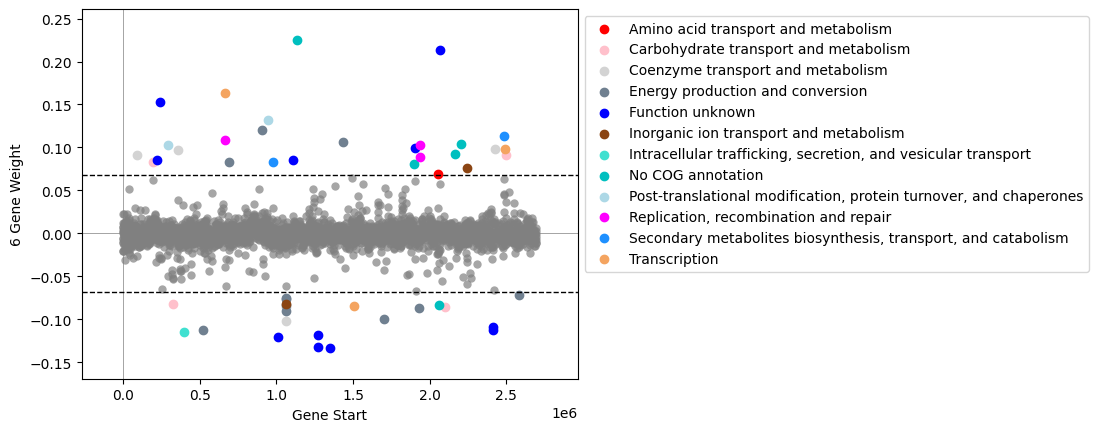

In [12]:
plot_gene_weights(ica_data,6)

<AxesSubplot:ylabel='6 iModulon\nActivity'>

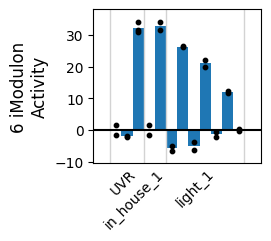

In [30]:
plot_activities(ica_data,6,projects = ['UVR','in_house_1','light_1'])

<AxesSubplot:ylabel='6 iModulon\nActivity'>

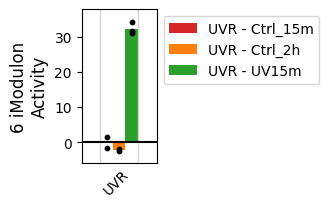

In [25]:
plot_activities(ica_data,6,projects = ['UVR'])

<AxesSubplot:ylabel='6 iModulon\nActivity'>

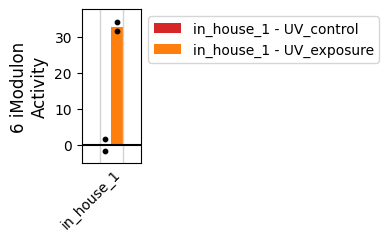

In [26]:
plot_activities(ica_data,6,projects = ['in_house_1'])

<AxesSubplot:ylabel='6 iModulon\nActivity'>

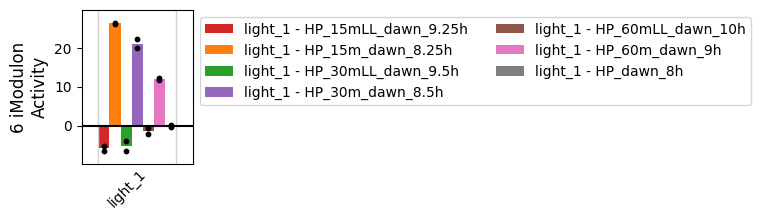

In [27]:
plot_activities(ica_data,6,projects = ['light_1'])

In [29]:
DF_enrichments[DF_enrichments.imodulon=='6'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [103]:
# Update the ica_data object
# ica_data.rename_imodulons({6:'UV'})

### iModulon 8: unknown

In [251]:
ica_data.view_imodulon(8)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0074     0.056229  Synpcc7942_0074  CP000100.1                 
Synpcc7942_0229     0.187914  Synpcc7942_0229  CP000100.1                 
Synpcc7942_0373     0.182087  Synpcc7942_0373  CP000100.1                 
Synpcc7942_0374     0.242159  Synpcc7942_0374  CP000100.1                 
Synpcc7942_0406     0.135708  Synpcc7942_0406  CP000100.1                 
Synpcc7942_0408     0.073553             trpF  CP000100.1                 
Synpcc7942_0443     0.178028          sek0027  CP000100.1                 
Synpcc7942_0444     0.192963          sek0026  CP000100.1                 
Synpcc7942_0553     0.073569            hlyD1  CP000100.1                 
Synpcc7942_0585     0.131661  Synpcc7942_0585  CP000100.1                 
Synpcc7942_0620     0.051532  Synpcc7942_0620  CP000100.1                 
Synpcc7942_0888     0.088322  Synpcc7942_0888  CP000100.1                 
Synpcc7942_0889     0.070065  Synpcc7942_0889  CP000100.1                 
Synpcc7942_1260     0.111100  Synpcc7942_1260  CP000100.1                 
Synpcc7942_1327     0.112969  Synpcc7942_1327  CP000100.1                 
Synpcc7942_1328     0.117906  Synpcc7942_1328  CP000100.1                 
Synpcc7942_1338     0.054498  Synpcc7942_1338  CP000100.1                 
Synpcc7942_1362     0.078051  Synpcc7942_1362  CP000100.1                 
Synpcc7942_1363     0.065306  Synpcc7942_1363  CP000100.1                 
Synpcc7942_1384     0.136692  Synpcc7942_1384  CP000100.1                 
Synpcc7942_1405     0.134398  Synpcc7942_1405  CP000100.1                 
Synpcc7942_1474     0.098232             mnhC  CP000100.1                 
Synpcc7942_1604     0.050796  Synpcc7942_1604  CP000100.1                 
Synpcc7942_1606     0.187728  Synpcc7942_1606  CP000100.1                 
Synpcc7942_1613     0.063302  Synpcc7942_1613  CP000100.1                 
Synpcc7942_1641     0.131895  Synpcc7942_1641  CP000100.1                 
Synpcc7942_1642     0.093758  Synpcc7942_1642  CP000100.1                 
Synpcc7942_1769     0.055817  Synpcc7942_1769  CP000100.1                 
Synpcc7942_1788     0.083757  Synpcc7942_1788  CP000100.1                 
Synpcc7942_1791     0.141678  Synpcc7942_1791  CP000100.1                 
Synpcc7942_1800     0.178599  Synpcc7942_1800  CP000100.1                 
Synpcc7942_1801     0.108072  Synpcc7942_1801  CP000100.1                 
Synpcc7942_1812     0.092997  Synpcc7942_1812  CP000100.1                 
Synpcc7942_1869     0.106494  Synpcc7942_1869  CP000100.1                 
Synpcc7942_1870     0.140145            hlyD2  CP000100.1                 
Synpcc7942_1923     0.153498             sigG  CP000100.1                 
Synpcc7942_1933     0.093206              fni  CP000100.1                 
Synpcc7942_1934     0.098370             dacB  CP000100.1                 
Synpcc7942_2012     0.057148  Synpcc7942_2012  CP000100.1                 
Synpcc7942_2256     0.070569  Synpcc7942_2256  CP000100.1                 
Synpcc7942_2292     0.084436  Synpcc7942_2292  CP000100.1                 
Synpcc7942_2293     0.063365  Synpcc7942_2293  CP000100.1                 
Synpcc7942_2356     0.083868  Synpcc7942_2356  CP000100.1                 
Synpcc7942_2357     0.091937  Synpcc7942_2357  CP000100.1                 
Synpcc7942_2575     0.067252            mntC2  CP000100.1                 

                   start      end strand  \
Synpcc7942_0074    73306    73659      -   
Synpcc7942_0229   225658   226221      +   
Synpcc7942_0373   366738   368024      -   
Synpcc7942_0374   368290   368574      -   
Synpcc7942_0406   399953   400354      +   
Synpcc7942_0408   400768   401421      +   
Synpcc7942_0443   433076   434317      -   
Synpcc7942_0444   434357   435040      -   
Synpcc7942_0553   535182   536534      -   
Synpcc7942_0585   566168   567388      -   
Synpcc7942_0620   609866   610570      +   
Synpcc7942_0888   894280   894639     

<AxesSubplot:xlabel='Gene Start', ylabel='8 Gene Weight'>

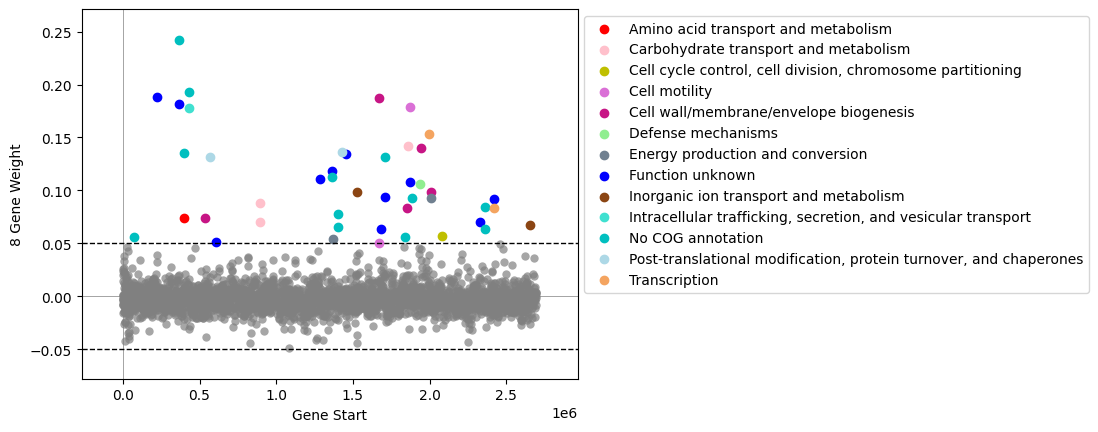

In [252]:
plot_gene_weights(ica_data,8)

<AxesSubplot:ylabel='8 iModulon\nActivity'>

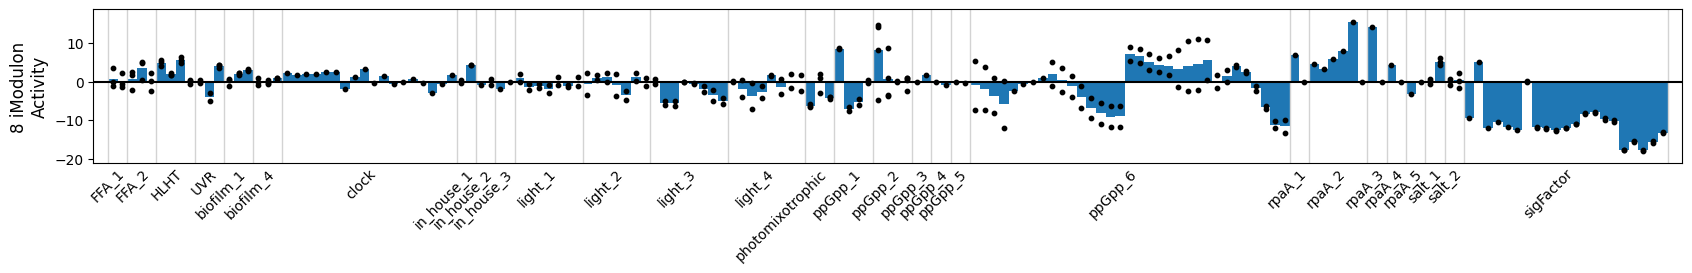

In [253]:
plot_activities(ica_data,8)

<AxesSubplot:ylabel='8 iModulon\nActivity'>

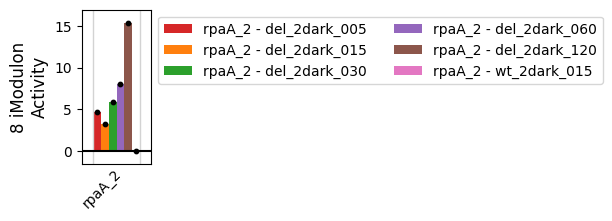

In [226]:
plot_activities(ica_data,8,projects='rpaA_2')

<AxesSubplot:ylabel='8 iModulon\nActivity'>

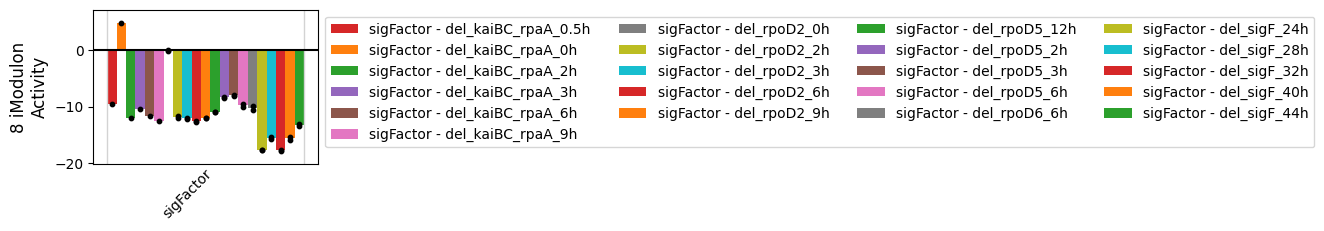

In [208]:
plot_activities(ica_data,8,projects = ['sigFactor'])

<AxesSubplot:ylabel='8 iModulon\nActivity'>

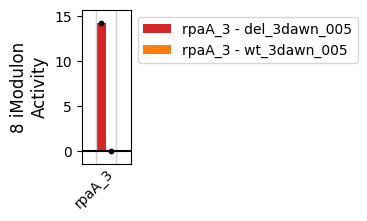

In [124]:
plot_activities(ica_data,8,projects = ['rpaA_3'])

<AxesSubplot:ylabel='8 iModulon\nActivity'>

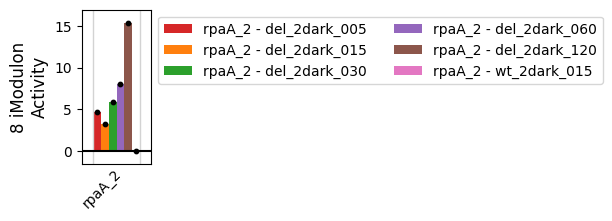

In [207]:
plot_activities(ica_data,8,projects = ['rpaA_2'])

In [206]:
DF_enrichments[DF_enrichments.imodulon=='8'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [331]:
# ica_data.rename_imodulons({8:'unchar-1'})
# ica_data.imodulon_table.loc['unchar-1','category'] = 'uncharacterized'

### iModulon 11: unknown - look closer

In [256]:
ica_data.view_imodulon(11)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0095     -0.081149             rpaA  CP000100.1                 
Synpcc7942_0195      0.060531  Synpcc7942_0195  CP000100.1                 
Synpcc7942_0267      0.083137             rsmG  CP000100.1                 
Synpcc7942_0291      0.062169  Synpcc7942_0291  CP000100.1                 
Synpcc7942_0491      0.107984             ndhQ  CP000100.1                 
Synpcc7942_0497      0.068040                -  CP000100.1                 
Synpcc7942_0522      0.086381  Synpcc7942_0522  CP000100.1                 
Synpcc7942_0573      0.068486  Synpcc7942_0573  CP000100.1                 
Synpcc7942_0592      0.069449             pfkA  CP000100.1                 
Synpcc7942_0667      0.060560  Synpcc7942_0667  CP000100.1                 
Synpcc7942_0781      0.072615             ppsA  CP000100.1                 
Synpcc7942_0900      0.086368  Synpcc7942_0900  CP000100.1                 
Synpcc7942_0905      0.103975  Synpcc7942_0905  CP000100.1                 
Synpcc7942_0906      0.078838  Synpcc7942_0906  CP000100.1                 
Synpcc7942_0955      0.090675  Synpcc7942_0955  CP000100.1                 
Synpcc7942_0999      0.064087  Synpcc7942_0999  CP000100.1                 
Synpcc7942_1095      0.075420  Synpcc7942_1095  CP000100.1                 
Synpcc7942_1150      0.093005  Synpcc7942_1150  CP000100.1                 
Synpcc7942_1159      0.079017  Synpcc7942_1159  CP000100.1                 
Synpcc7942_1209      0.071945  Synpcc7942_1209  CP000100.1                 
Synpcc7942_1210      0.071491  Synpcc7942_1210  CP000100.1                 
Synpcc7942_1302      0.092715  Synpcc7942_1302  CP000100.1                 
Synpcc7942_1506      0.079939  Synpcc7942_1506  CP000100.1                 
Synpcc7942_1654     -0.066755  Synpcc7942_1654  CP000100.1                 
Synpcc7942_1675      0.067133  Synpcc7942_1675  CP000100.1                 
Synpcc7942_1745     -0.065149  Synpcc7942_1745  CP000100.1                 
Synpcc7942_1969      0.062739             abrB  CP000100.1                 
Synpcc7942_2005      0.082692  Synpcc7942_2005  CP000100.1                 
Synpcc7942_2021      0.070420  Synpcc7942_2021  CP000100.1                 
Synpcc7942_2022      0.061417             nusA  CP000100.1                 
Synpcc7942_2023      0.066013  Synpcc7942_2023  CP000100.1                 
Synpcc7942_2185      0.086702  Synpcc7942_2185  CP000100.1                 
Synpcc7942_2336      0.077045  Synpcc7942_2336  CP000100.1                 
Synpcc7942_2352      0.112212             yfiA  CP000100.1                 
Synpcc7942_2478      0.063829             psbW  CP000100.1                 
Synpcc7942_2479      0.071310                -  CP000100.1                 
Synpcc7942_2486      0.079889                -  CP000100.1                 
Synpcc7942_2539      0.071130  Synpcc7942_2539  CP000100.1                 
Synpcc7942_2540      0.084623  Synpcc7942_2540  CP000100.1                 
Synpcc7942_2560      0.073477  Synpcc7942_2560  CP000100.1                 
Synpcc7942_B2648     0.084093            sepA2  CP000101.1                 
Synpcc7942_B2659     0.071019            sepT2  CP000101.1                 

                    start      end strand  \
Synpcc7942_0095     92590    93339      -   
Synpcc7942_0195    195630   196058      +   
Synpcc7942_0267    263757   264485      +   
Synpcc7942_0291    288312   288530      +   
Synpcc7942_0491    479700   479837      +   
Synpcc7942_0497    484328   484504      -   
Synpcc7942_0522    507941   508312      +   
Synpcc7942_0573    555297   555533      -   
Synpcc7942_0592    579312   580394      -   
Synpcc7942_0667    663985   664296      +   
Synpcc7942_0781    774004   776520      -   
Synpcc7942_0900    909440   909643      -   
Synpcc7942_0905    915588   916130      +   
Synpcc7942_0906    916262   916747      +   
Synpcc7942_0955    963272   963790      -   
Synpcc7942_0999   1007581  10

<AxesSubplot:xlabel='Gene Start', ylabel='11 Gene Weight'>

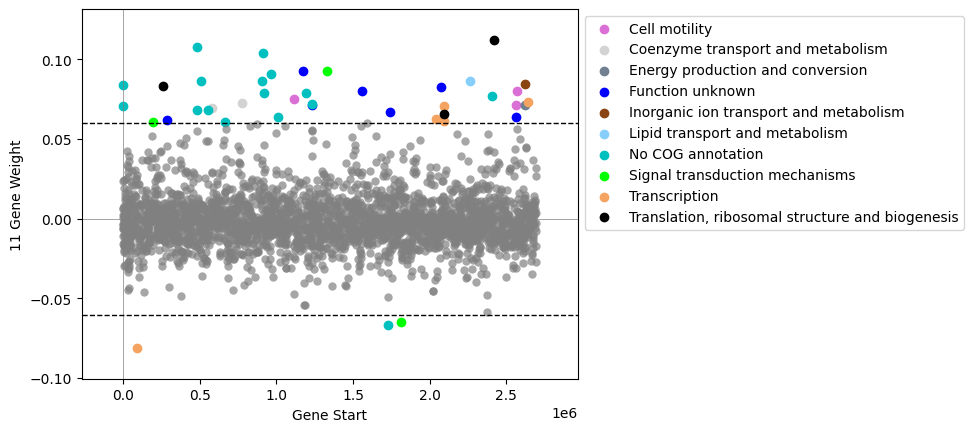

In [257]:
plot_gene_weights(ica_data,11)

<AxesSubplot:ylabel='11 iModulon\nActivity'>

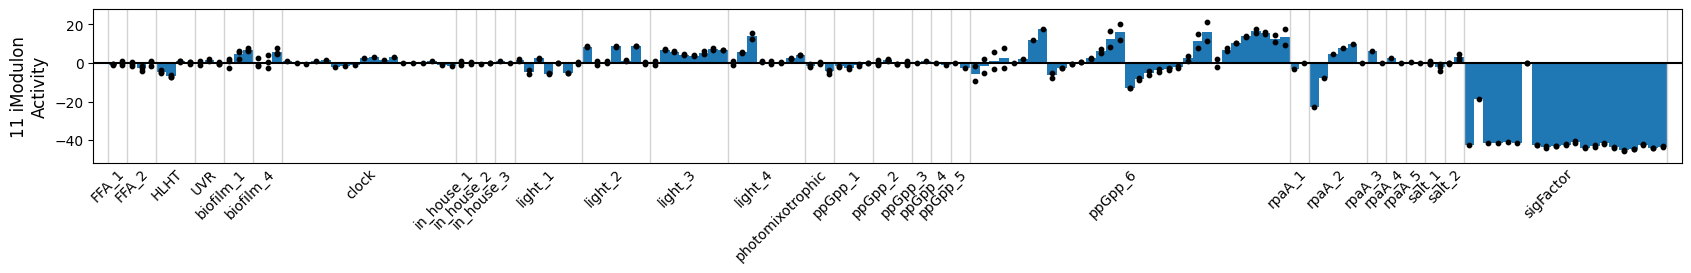

In [255]:
plot_activities(ica_data,11)

<AxesSubplot:ylabel='11 iModulon\nActivity'>

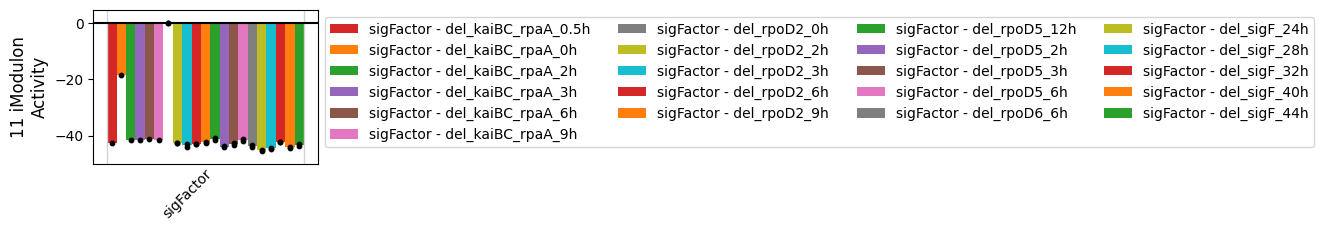

In [34]:
plot_activities(ica_data,11,projects='sigFactor')

In [258]:
DF_enrichments[DF_enrichments.imodulon=='11'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [332]:
# ica_data.rename_imodulons({11:'unchar-2'})
# ica_data.imodulon_table.loc['unchar-2','category'] = 'uncharacterized'

### iModulon 15: livJHMGF 
BCAA transporter

In [40]:
ica_data.view_imodulon(15)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_1377     0.121401  Synpcc7942_1377  CP000100.1           NaN   
Synpcc7942_2492     0.148315             livF  CP000100.1           NaN   
Synpcc7942_2493     0.203961             livG  CP000100.1           NaN   
Synpcc7942_2494     0.221265             livM  CP000100.1           NaN   
Synpcc7942_2495     0.229308             livH  CP000100.1           NaN   
Synpcc7942_2496     0.219909             livJ  CP000100.1           NaN   
Synpcc7942_2497     0.169913              ndk  CP000100.1           NaN   

                   start      end strand  \
Synpcc7942_1377  1417540  1419879      +   
Synpcc7942_2492  2573355  2574068      -   
Synpcc7942_2493  2574061  2574822      -   
Synpcc7942_2494  2574819  2575742      -   
Synpcc7942_2495  2575746  2576687      -   
Synpcc7942_2496  2576687  2577886      -   
Synpcc7942_2497  2577916  2578371      -   

                                                      gene_product  \
Synpcc7942_1377                   metal dependent phosphohydrolase   
Synpcc7942_2492                                             ATPase   
Synpcc7942_2493                                             ATPase   
Synpcc7942_2494  putative branched-chain amino acid ABC transpo...   
Synpcc7942_2495  integral membrane protein of the ABC-type Nat ...   
Synpcc7942_2496  branched-chain amino-acid ABC transport system...   
Synpcc7942_2497                      nucleoside diphosphate kinase   

                                                 COG uniprot  operon  
Synpcc7942_1377                        Transcription  Q31NG2  Op1036  
Synpcc7942_2492  Amino acid transport and metabolism  Q31K97  Op1871  
Synpcc7942_2493  Amino acid transport and metabolism  Q8GIU0  Op1871  
Synpcc7942_2494  Amino acid transport and metabolism  Q8GIU1  Op1871  
Synpcc7942_2495  Amino acid transport and metabolism  Q935W9  Op1871  
Synpcc7942_2496  Amino acid transport and metabolism  Q935X0  Op1871  
Synpcc7942_2497  Nucleotide transport and metabolism  P50590  Op1871

<AxesSubplot:xlabel='Gene Start', ylabel='15 Gene Weight'>

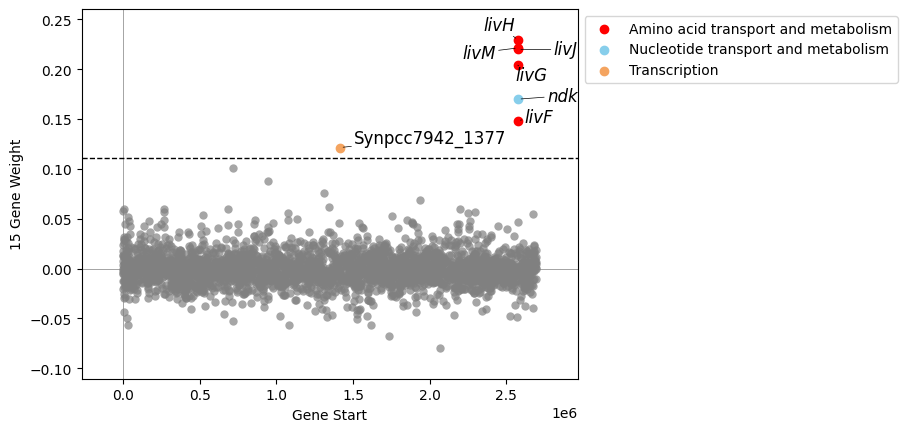

In [79]:
plot_gene_weights(ica_data,15)

<AxesSubplot:ylabel='15 iModulon\nActivity'>

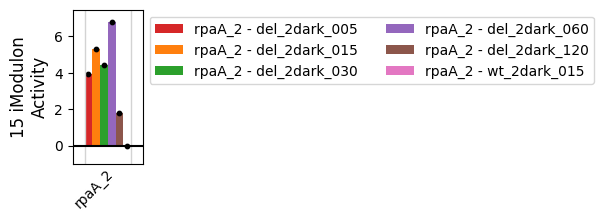

In [27]:
plot_activities(ica_data,15,projects='rpaA_2')

<AxesSubplot:ylabel='15 iModulon\nActivity'>

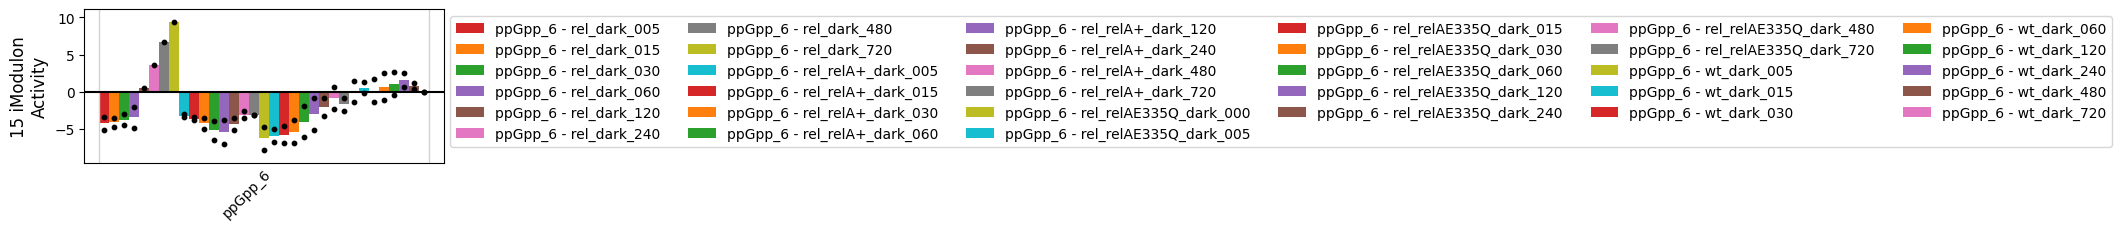

In [28]:
plot_activities(ica_data,15,projects='ppGpp_6')

In [42]:
DF_enrichments[DF_enrichments.imodulon=='15'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [99]:
# Update the ica_data object
# ica_data.rename_imodulons({15:'livJHMGF'})

### iModulon 17: heat shock

In [317]:
ica_data.view_imodulon(17)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0685     0.133449           groEL2  CP000100.1                 
Synpcc7942_1041    -0.107055  Synpcc7942_1041  CP000100.1                 
Synpcc7942_1290    -0.161369                -  CP000100.1                 
Synpcc7942_1813     0.146426             htpG  CP000100.1                 
Synpcc7942_2313     0.280411           groEL1  CP000100.1                 
Synpcc7942_2314     0.268450            groES  CP000100.1                 
Synpcc7942_2468     0.144976            dnaK2  CP000100.1                 

                   start      end strand                       gene_product  \
Synpcc7942_0685   678881   680548      +             Chaperonin Cpn60/TCP-1   
Synpcc7942_1041  1055349  1055621      -               hypothetical protein   
Synpcc7942_1290  1313290  1313460      -               SmtA metallothionein   
Synpcc7942_1813  1884434  1886350      -  ATP-binding region%2C ATPase-like   
Synpcc7942_2313  2381614  2383248      -             Chaperonin Cpn60/TCP-1   
Synpcc7942_2314  2383296  2383607      -  GroES protein%2C 10 kD chaperonin   
Synpcc7942_2468  2548622  2550526      +           Heat shock protein Hsp70   

                                                               COG uniprot  \
Synpcc7942_0685  Post-translational modification, protein turno...  Q31QF2   
Synpcc7942_1041                                  No COG annotation  Q31PE8   
Synpcc7942_1290                                   Function unknown  P30331   
Synpcc7942_1813  Post-translational modification, protein turno...  Q79N42   
Synpcc7942_2313  Post-translational modification, protein turno...  P22879   
Synpcc7942_2314  Post-translational modification, protein turno...  P22880   
Synpcc7942_2468  Post-translational modification, protein turno...  P50021   

                 operon  regulator  
Synpcc7942_0685   Op534             
Synpcc7942_1041   Op795             
Synpcc7942_1290   Op968       smtB  
Synpcc7942_1813  Op1370             
Synpcc7942_2313  Op1732             
Synpcc7942_2314  Op1732  hrcA,hrcA  
Synpcc7942_2468  Op1849

<AxesSubplot:xlabel='Gene Start', ylabel='17 Gene Weight'>

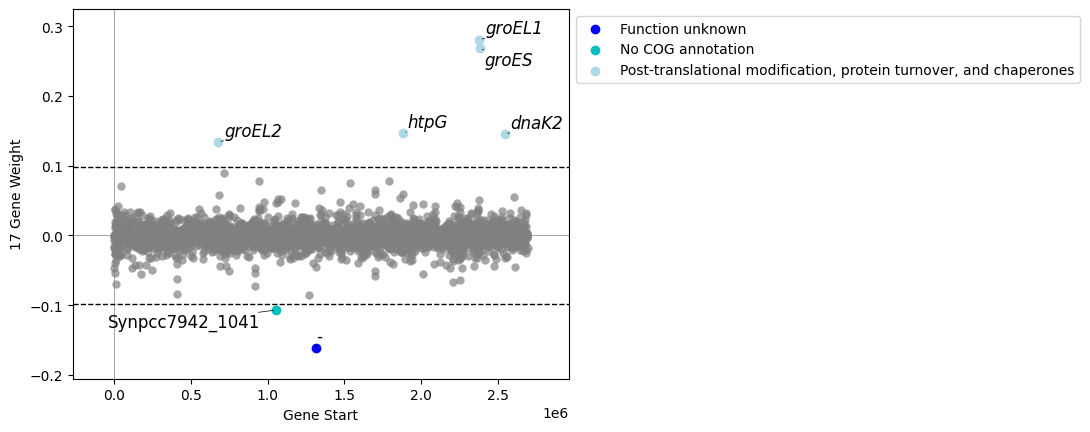

In [318]:
plot_gene_weights(ica_data,17)

<AxesSubplot:ylabel='17 iModulon\nActivity'>

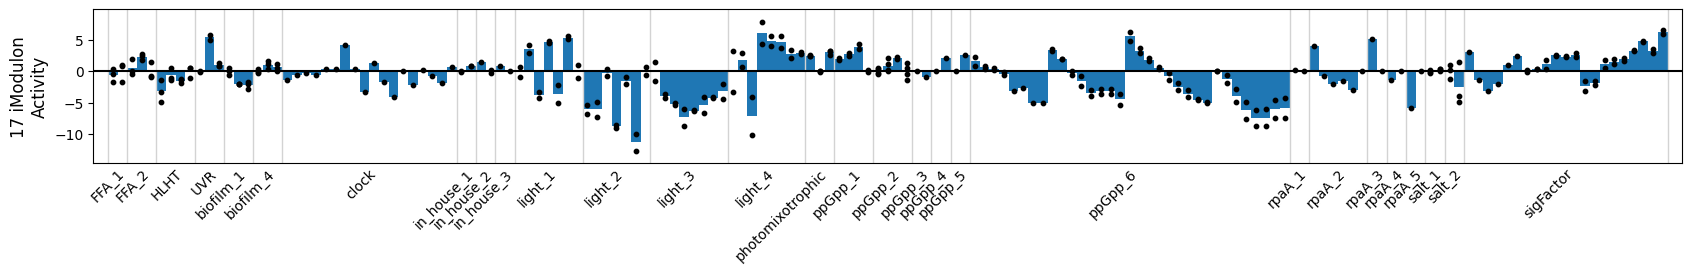

In [319]:
plot_activities(ica_data,17)

In [320]:
DF_enrichments[DF_enrichments.imodulon=='17'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue    qvalue  precision    recall   f1score  \
14       17   map04940  5.898137e-06  0.000302   0.285714  1.000000  0.444444   
11       17   map05152  3.852772e-07  0.000079   0.428571  0.428571  0.428571   
15       17   map05134  3.530041e-05  0.001447   0.285714  0.500000  0.363636   
12       17   map04212  1.808135e-06  0.000185   0.428571  0.272727  0.333333   
13       17   map03018  4.963617e-06  0.000302   0.428571  0.200000  0.272727   
16       17   map04151  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
17       17   map04612  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
18       17   map04626  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
19       17   map04657  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
20       17   map04659  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
21       17   map04914  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
22       17   map04915  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
23       17   map05215  2.622705e-03  0.041358   0.142857  1.000000  0.250000   
24       17   map04141  5.239512e-03  0.076721   0.142857  0.500000  0.222222   

     TP  target_set_size  imodulon_size         source  \
14  2.0              2.0            7.0  KEGG pathways   
11  3.0              7.0            7.0  KEGG pathways   
15  2.0              4.0            7.0  KEGG pathways   
12  3.0             11.0            7.0  KEGG pathways   
13  3.0             15.0            7.0  KEGG pathways   
16  1.0              1.0            7.0  KEGG pathways   
17  1.0              1.0            7.0  KEGG pathways   
18  1.0              1.0            7.0  KEGG pathways   
19  1.0              1.0            7.0  KEGG pathways   
20  1.0              1.0            7.0  KEGG pathways   
21  1.0              1.0            7.0  KEGG pathways   
22  1.0              1.0            7.0  KEGG pathways   
23  1.0              1.0            7.0  KEGG pathways   
24  1.0              2.0            7.0  KEGG pathways   

                                   pathway_name module_name  
14                     Type I diabetes mellitus         NaN  
11                                 Tuberculosis         NaN  
15                                Legionellosis         NaN  
12          Longevity regulating pathway - worm         NaN  
13                              RNA degradation         NaN  
16                   PI3K-Akt signaling pathway         NaN  
17          Antigen processing and presentation         NaN  
18                   Plant-pathogen interaction         NaN  
19                      IL-17 signaling pathway         NaN  
20                    Th17 cell differentiation         NaN  
21      Progesterone-mediated oocyte maturation         NaN  
22                   Estrogen signaling pathway         NaN  
23                              Prostate cancer         NaN  
24  Protein processing in endoplasmic reticulum         NaN

In [321]:
# Update the ica_data object
# ica_data.rename_imodulons({17:'heat shock'})
# ica_data.imodulon_table.loc['heat shock','category'] = 'functional'

### iModulon 20: unknown

In [179]:
ica_data.view_imodulon(20)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0059     0.097932  Synpcc7942_0059  CP000100.1                 
Synpcc7942_0138     0.096519  Synpcc7942_0138  CP000100.1                 
Synpcc7942_0291     0.059013  Synpcc7942_0291  CP000100.1                 
Synpcc7942_0494     0.135969  Synpcc7942_0494  CP000100.1                 
Synpcc7942_0540     0.069529  Synpcc7942_0540  CP000100.1                 
Synpcc7942_0551     0.139794  Synpcc7942_0551  CP000100.1                 
Synpcc7942_0631     0.070703             rplL  CP000100.1                 
Synpcc7942_0705     0.087230  Synpcc7942_0705  CP000100.1                 
Synpcc7942_0784     0.111330  Synpcc7942_0784  CP000100.1                 
Synpcc7942_0875     0.077962  Synpcc7942_0875  CP000100.1                 
Synpcc7942_1061     0.076257  Synpcc7942_1061  CP000100.1                 
Synpcc7942_1063     0.066789  Synpcc7942_1063  CP000100.1                 
Synpcc7942_1174     0.072569             psbJ  CP000100.1                 
Synpcc7942_1254     0.075876  Synpcc7942_1254  CP000100.1                 
Synpcc7942_1288     0.061077  Synpcc7942_1288  CP000100.1                 
Synpcc7942_1339     0.060816  Synpcc7942_1339  CP000100.1                 
Synpcc7942_1361     0.081265  Synpcc7942_1361  CP000100.1                 
Synpcc7942_1544     0.086507  Synpcc7942_1544  CP000100.1                 
Synpcc7942_1545     0.076653  Synpcc7942_1545  CP000100.1                 
Synpcc7942_1546     0.092653             rnb2  CP000100.1                 
Synpcc7942_1656     0.071423             katG  CP000100.1                 
Synpcc7942_1658     0.067667  Synpcc7942_1658  CP000100.1                 
Synpcc7942_1663     0.108835  Synpcc7942_1663  CP000100.1                 
Synpcc7942_1707     0.084933             ftn6  CP000100.1                 
Synpcc7942_1849     0.060264            rpoA5  CP000100.1                 
Synpcc7942_2016     0.060459             psbX  CP000100.1                 
Synpcc7942_2126     0.101905  Synpcc7942_2126  CP000100.1                 
Synpcc7942_2140     0.076421  Synpcc7942_2140  CP000100.1                 
Synpcc7942_2142     0.061522             infA  CP000100.1                 
Synpcc7942_2205     0.072836             rpsI  CP000100.1                 
Synpcc7942_2245     0.083246             psbZ  CP000100.1                 
Synpcc7942_2301     0.088578  Synpcc7942_2301  CP000100.1                 
Synpcc7942_2405    -0.072731  Synpcc7942_2405  CP000100.1                 
Synpcc7942_2585     0.064792  Synpcc7942_2585  CP000100.1                 

                   start      end strand  \
Synpcc7942_0059    60867    61112      -   
Synpcc7942_0138   139416   140018      +   
Synpcc7942_0291   288312   288530      +   
Synpcc7942_0494   482631   482984      -   
Synpcc7942_0540   524367   524828      +   
Synpcc7942_0551   533570   533941      +   
Synpcc7942_0631   623876   624262      -   
Synpcc7942_0705   695935   696570      +   
Synpcc7942_0784   779531   779848      +   
Synpcc7942_0875   877453   877887      -   
Synpcc7942_1061  1072278  1073213      +   
Synpcc7942_1063  1073494  1073742      +   
Synpcc7942_1174  1209224  1209343      -   
Synpcc7942_1254  1277460  1277855      +   
Synpcc7942_1288  1311028  1311534      +   
Synpcc7942_1339  1373779  1373973      -   
Synpcc7942_1361  1401085  1401588      +   
Synpcc7942_1544  1600802  1601053      +   
Synpcc7942_1545  1601056  1601511      +   
Synpcc7942_1546  1601489  1602886      +   
Synpcc7942_1656  1725919  1728081      -   
Synpcc7942_1658  1728788  1729246      -   
Synpcc7942_1663  1733401  1733760      -   
Synpcc7942_1707  1775633  1776064      +   
Synpcc7942_1849  1916620  1917816      +   
Synpcc7942_2016  2084803  2084922      -   
Synpcc7942_2126  2206400  2206804      -   
Synpcc7942_2140  2224311  2224742      +   
Synpcc7942_2142  2226468  2226803      -   
Synpcc7942_2205  2284655  2285062      -   
Synpcc7942_2245  2310343  2

<AxesSubplot:ylabel='20 iModulon\nActivity'>

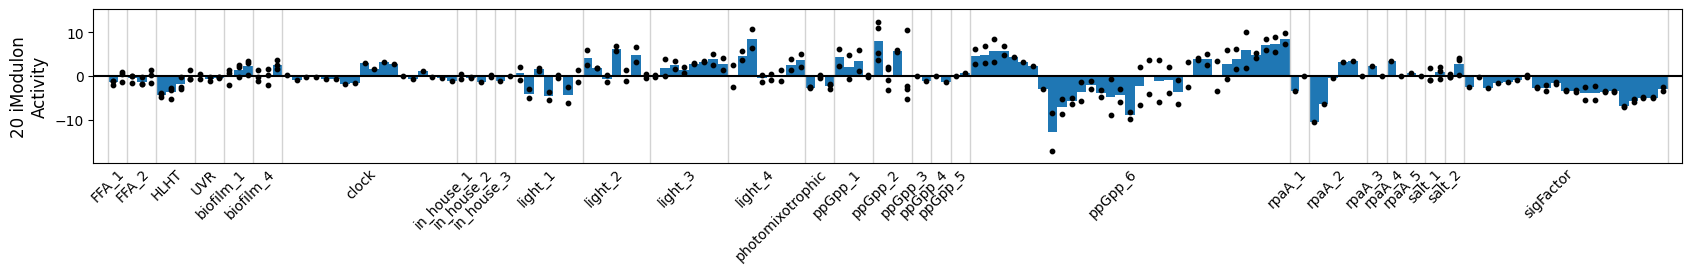

In [180]:
plot_activities(ica_data,20)

In [181]:
DF_enrichments[DF_enrichments.imodulon=='20'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [333]:
# ica_data.rename_imodulons({20:'unchar-3'})
# ica_data.imodulon_table.loc['unchar-3','category'] = 'uncharacterized'

### iModulon 24: unknown

In [182]:
ica_data.view_imodulon(24)

gene_weight        gene_name    accession old_locus_tag  \
HTX97_RS00035       -0.042732    HTX97_RS00035  NC_004990.1                 
Synpcc7942_0014      0.122956  Synpcc7942_0014   CP000100.1                 
Synpcc7942_0015      0.065007            phyA1   CP000100.1                 
Synpcc7942_0017      0.050202              eda   CP000100.1                 
Synpcc7942_0035      0.054934  Synpcc7942_0035   CP000100.1                 
...                       ...              ...          ...           ...   
Synpcc7942_B2622     0.046958             srpC   CP000101.1                 
Synpcc7942_B2630     0.107528             srpM   CP000101.1                 
Synpcc7942_B2632     0.044521            anL59   CP000101.1                 
Synpcc7942_B2657     0.082873            anL03   CP000101.1                 
Synpcc7942_B2639     0.147680            anL12   CP000101.1                 

                  start    end strand  \
HTX97_RS00035      6605   6793      +   
Synpcc7942_0014   13067  13411      -   
Synpcc7942_0015   13577  14248      -   
Synpcc7942_0017   15630  16193      -   
Synpcc7942_0035   34357  35115      -   
...                 ...    ...    ...   
Synpcc7942_B2622  13100  14281      +   
Synpcc7942_B2630  20808  21608      +   
Synpcc7942_B2632  23609  24160      -   
Synpcc7942_B2657  29150  29365      -   
Synpcc7942_B2639  34802  35131      +   

                                                       gene_product  \
HTX97_RS00035                                  hypothetical protein   
Synpcc7942_0014                      conserved hypothetical protein   
Synpcc7942_0015               Prolyl 4-hydroxylase%2C alpha subunit   
Synpcc7942_0017            2-keto-3-deoxy-phosphogluconate aldolase   
Synpcc7942_0035                      conserved hypothetical protein   
...                                                             ...   
Synpcc7942_B2622  probable chromate transport transmembrane protein   
Synpcc7942_B2630  sulfonate ABC transporter%2C permease protein%...   
Synpcc7942_B2632                               hypothetical protein   
Synpcc7942_B2657                               hypothetical protein   
Synpcc7942_B2639                     conserved hypothetical protein   

                                                    COG uniprot operon  \
HTX97_RS00035                         No COG annotation           Op15   
Synpcc7942_0014          Signal transduction mechanisms  Q31SC3   Op29   
Synpcc7942_0015        Energy production and conversion  Q31SC2   Op31   
Synpcc7942_0017   Carbohydrate transport and metabolism  Q31SC0   Op34   
Synpcc7942_0035                       No COG annotation  Q31SA2   Op55   
...                                                 ...     ...    ...   
Synpcc7942_B2622                      No COG annotation  Q55027   Op30   
Synpcc7942_B2630                      No COG annotation  Q9R6V0   Op35   
Synpcc7942_B2632                      No COG annotation  Q31JU8   Op40   
Synpcc7942_B2657                      No COG annotation  Q8KUX0   Op47   
Synpcc7942_B2639                      No COG annotation  Q8KUW1   Op56   

                 regulator  
HTX97_RS00035               
Synpcc7942_0014             
Synpcc7942_0015             
Synpcc7942_0017             
Synpcc7942_0035             
...                    ...  
Synpcc7942_B2622            
Synpcc7942_B2630            
Synpcc7942_B2632            
Synpcc7942_B2657            
Synpcc7942_B2639            

[101 rows x 12 columns]

<AxesSubplot:xlabel='Gene Start', ylabel='24 Gene Weight'>

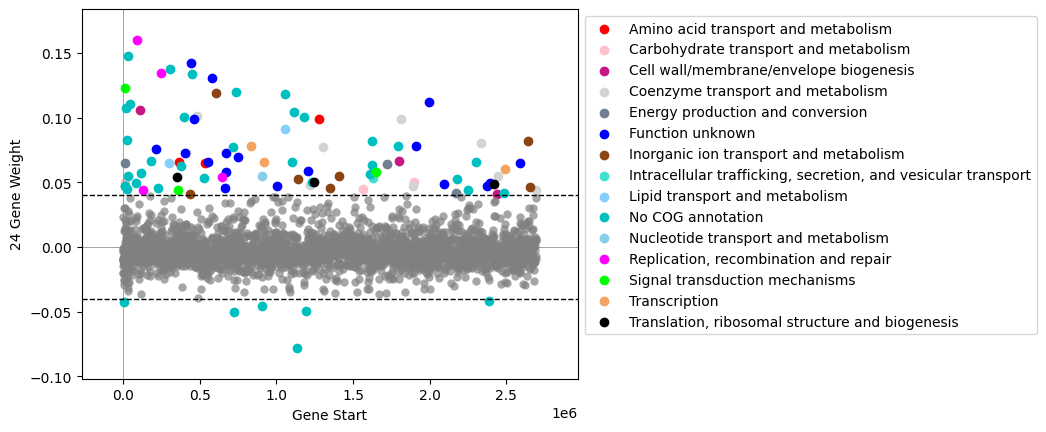

In [186]:
plot_gene_weights(ica_data,24)

<AxesSubplot:ylabel='24 iModulon\nActivity'>

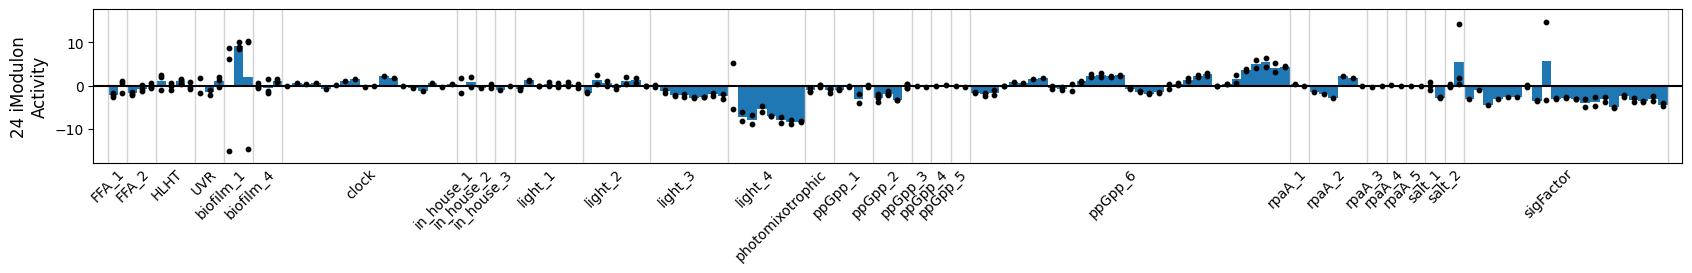

In [183]:
plot_activities(ica_data,24)

<AxesSubplot:ylabel='24 iModulon\nActivity'>

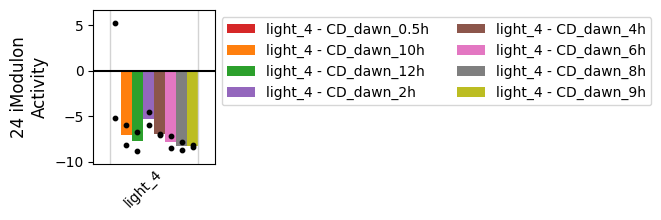

In [184]:
plot_activities(ica_data,24,projects = 'light_4')

In [185]:
DF_enrichments[DF_enrichments.imodulon=='24'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [334]:
# ica_data.rename_imodulons({24:'unchar-4'})
# ica_data.imodulon_table.loc['unchar-4','category'] = 'uncharacterized'

### iModulon 28: phosphate

In [56]:
ica_data.view_imodulon(28)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0188     0.232471  Synpcc7942_0188  CP000100.1           NaN   
Synpcc7942_1254    -0.247238  Synpcc7942_1254  CP000100.1           NaN   
Synpcc7942_1957     0.148413  Synpcc7942_1957  CP000100.1           NaN   
Synpcc7942_2356     0.320988  Synpcc7942_2356  CP000100.1           NaN   
Synpcc7942_2441     0.133085             pstB  CP000100.1           NaN   
Synpcc7942_2442     0.150088             pstA  CP000100.1           NaN   
Synpcc7942_2443     0.138548             pstC  CP000100.1           NaN   
Synpcc7942_2444     0.224572             pstS  CP000100.1           NaN   
Synpcc7942_2445     0.468764             sphX  CP000100.1           NaN   

                   start      end strand  \
Synpcc7942_0188   185682   187418      +   
Synpcc7942_1254  1277460  1277855      +   
Synpcc7942_1957  2029234  2029671      -   
Synpcc7942_2356  2422193  2422819      -   
Synpcc7942_2441  2517856  2518650      -   
Synpcc7942_2442  2518698  2519609      -   
Synpcc7942_2443  2519609  2520541      -   
Synpcc7942_2444  2520627  2521640      -   
Synpcc7942_2445  2521920  2522933      -   

                                                      gene_product  \
Synpcc7942_0188  diguanylate cyclase/phosphodiesterase (GGDEF %...   
Synpcc7942_1254  cyclic nucleotide-binding domain (cNMP-BD) pro...   
Synpcc7942_1957  cyclic nucleotide-binding domain (cNMP-BD) pro...   
Synpcc7942_2356        transcriptional regulator%2C Crp/Fnr family   
Synpcc7942_2441      Phosphate transport system permease protein 1   
Synpcc7942_2442      Phosphate transport system permease protein 2   
Synpcc7942_2443  Phosphate ABC transporter%2C permease protein ...   
Synpcc7942_2444                          Phosphate binding protein   
Synpcc7942_2445                          Phosphate binding protein   

                                                    COG uniprot  operon  
Synpcc7942_0188          Signal transduction mechanisms  Q31RU9   Op175  
Synpcc7942_1254          Signal transduction mechanisms  Q31NT5   Op944  
Synpcc7942_1957          Signal transduction mechanisms  Q54777  Op1472  
Synpcc7942_2356                           Transcription  Q31KN3  Op1766  
Synpcc7942_2441  Inorganic ion transport and metabolism  Q31KE8  Op1827  
Synpcc7942_2442  Inorganic ion transport and metabolism  Q31KE7  Op1828  
Synpcc7942_2443  Inorganic ion transport and metabolism  Q31KE6  Op1828  
Synpcc7942_2444  Inorganic ion transport and metabolism  Q31KE5  Op1829  
Synpcc7942_2445  Inorganic ion transport and metabolism  P39665  Op1830

<AxesSubplot:xlabel='Gene Start', ylabel='phosphate Gene Weight'>

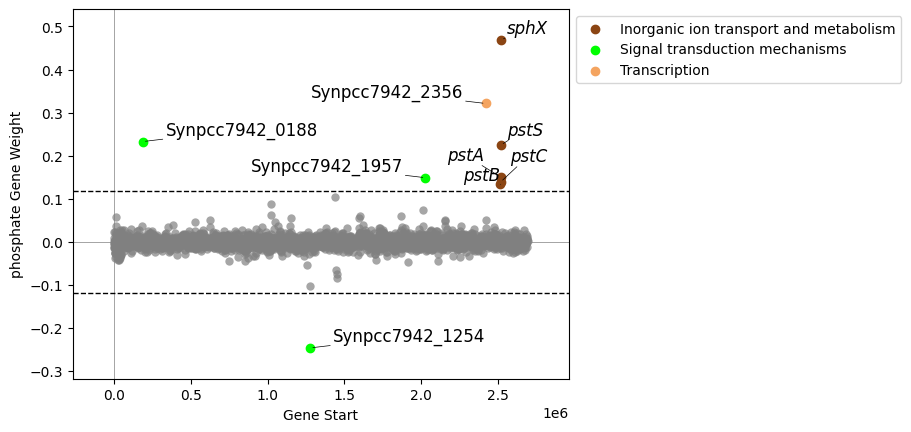

In [22]:
plot_gene_weights(ica_data,'phosphate')

<AxesSubplot:ylabel='28 iModulon\nActivity'>

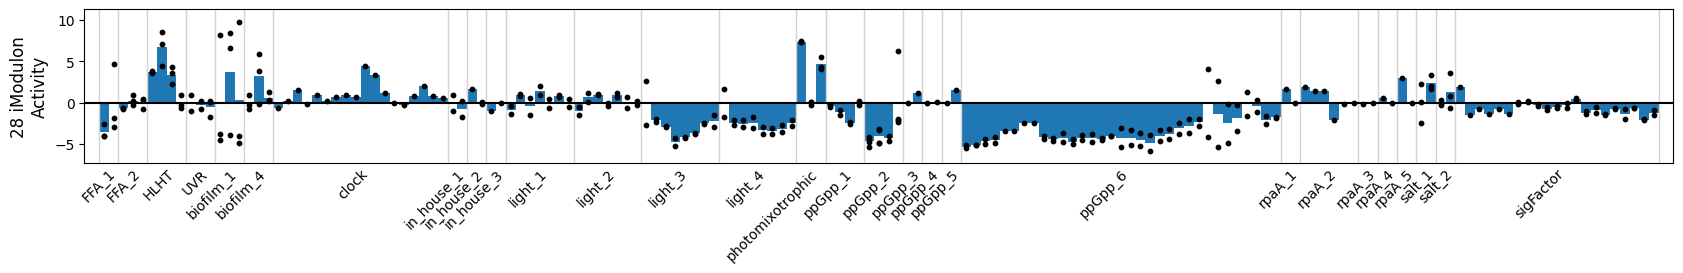

In [57]:
plot_activities(ica_data,28)

<AxesSubplot:ylabel='28 iModulon\nActivity'>

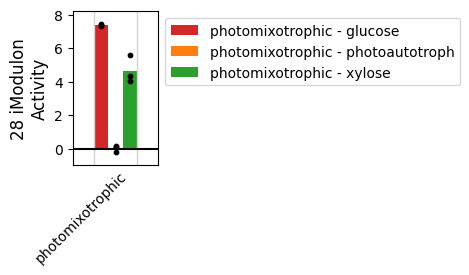

In [29]:
plot_activities(ica_data,28,projects='photomixotrophic')

In [148]:
DF_enrichments[DF_enrichments.imodulon=='28'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue        qvalue  precision    recall  \
16       28     M00222  3.289537e-11  6.710655e-09   0.294118  0.833333   
17       28     M00434  3.819746e-05  3.896141e-03   0.117647  1.000000   
37       28   map05152  7.872263e-04  5.379380e-02   0.117647  0.285714   
36       28   map02020  1.309164e-04  1.341893e-02   0.235294  0.090909   
35       28   map02010  3.622232e-05  7.425576e-03   0.294118  0.076923   

     f1score   TP  target_set_size  imodulon_size         source  \
16  0.434783  5.0              6.0           17.0   KEGG modules   
17  0.210526  2.0              2.0           17.0   KEGG modules   
37  0.166667  2.0              7.0           17.0  KEGG pathways   
36  0.131148  4.0             44.0           17.0  KEGG pathways   
35  0.121951  5.0             65.0           17.0  KEGG pathways   

            pathway_name module_name  
16                   NaN         NaN  
17                   NaN         NaN  
37          Tuberculosis         NaN  
36  Two-component system         NaN  
35      ABC transporters         NaN

In [21]:
# Update the ica_data object
# ica_data.rename_imodulons({28:'phosphate'})

### iModulon 38: photosystem - closer look later

In [60]:
ica_data.view_imodulon(38)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0240     0.075895             apcD  CP000100.1           NaN   
Synpcc7942_0259     0.063650  Synpcc7942_0259  CP000100.1           NaN   
Synpcc7942_0294     0.066568             psbO  CP000100.1           NaN   
Synpcc7942_0316     0.057839  Synpcc7942_0316  CP000100.1           NaN   
Synpcc7942_0325     0.132341             apcC  CP000100.1           NaN   
Synpcc7942_0326     0.123294             apcB  CP000100.1           NaN   
Synpcc7942_0327     0.109627             apcA  CP000100.1           NaN   
Synpcc7942_0328     0.079201             apcE  CP000100.1           NaN   
Synpcc7942_0551     0.156044  Synpcc7942_0551  CP000100.1           NaN   
Synpcc7942_0655     0.073101            psbD1  CP000100.1           NaN   
Synpcc7942_0656     0.090365             psbC  CP000100.1           NaN   
Synpcc7942_0696     0.075707             psbT  CP000100.1           NaN   
Synpcc7942_0697     0.076894             psbB  CP000100.1           NaN   
Synpcc7942_0797     0.163390  Synpcc7942_0797  CP000100.1           NaN   
Synpcc7942_0855     0.067449             pixG  CP000100.1           NaN   
Synpcc7942_0856     0.076327            cheY2  CP000100.1           NaN   
Synpcc7942_0857     0.073013  Synpcc7942_0857  CP000100.1           NaN   
Synpcc7942_0858     0.082548             pixJ  CP000100.1           NaN   
Synpcc7942_0859     0.076864             cheA  CP000100.1           NaN   
Synpcc7942_0860     0.066061             cheW  CP000100.1           NaN   
Synpcc7942_0893     0.078758            psbA3  CP000100.1           NaN   
Synpcc7942_0920     0.090680             psaK  CP000100.1           NaN   
Synpcc7942_0942     0.060030            ftsH2  CP000100.1           NaN   
Synpcc7942_1039    -0.059725  Synpcc7942_1039  CP000100.1           NaN   
Synpcc7942_1047     0.121516            cpcB1  CP000100.1           NaN   
Synpcc7942_1048     0.136301            cpcA1  CP000100.1           NaN   
Synpcc7942_1049     0.144585            cpcC1  CP000100.1           NaN   
Synpcc7942_1050     0.156637            cpcC2  CP000100.1           NaN   
Synpcc7942_1051     0.151398             cpcD  CP000100.1           NaN   
Synpcc7942_1052     0.119838            cpcB2  CP000100.1           NaN   
Synpcc7942_1053     0.134509            cpcA2  CP000100.1           NaN   
Synpcc7942_1090     0.086588  Synpcc7942_1090  CP000100.1           NaN   
Synpcc7942_1259     0.069042             arsA  CP000100.1           NaN   
Synpcc7942_1270     0.088625             hli8  CP000100.1           NaN   
Synpcc7942_1478     0.083589             cytM  CP000100.1           NaN   
Synpcc7942_1637     0.085597            psbD2  CP000100.1           NaN   
Synpcc7942_1983     0.057765             zds2  CP000100.1           NaN   
Synpcc7942_2010     0.056598             psbV  CP000100.1           NaN   
Synpcc7942_2030     0.063814             cpcG  CP000100.1           NaN   
Synpcc7942_2048     0.089138             psaB  CP000100.1           NaN   
Synpcc7942_2049     0.076675             psaA  CP000100.1           NaN   
Synpcc7942_2127    -0.062527             nblA  CP000100.1           NaN   
Synpcc7942_2157    -0.060525  Synpcc7942_2157  CP000100.1           NaN   
Synpcc7942_2160     0.071971              spt  CP000100.1           NaN   
Synpcc7942_2161     0.090072  Synpcc7942_2161  CP000100.1           NaN   
Synpcc7942_2297    -0.068162              tal  CP000100.1           NaN   
Synpcc7942_2331     0.071675             petB  CP000100.1           NaN   
Synpcc7942_2332     0.085477             petD  CP000100.1           NaN   
Synpcc7942_2342     0.060078             psaL  CP000100.1           NaN   
Synpcc7942_2362     0.061597             hepB  CP000100.1           NaN   
Synpcc7942_2391    -0.058759  Synpcc7942_2391  CP000100.1           NaN   
Synpcc7942_2413     0.087895  Synpcc7942_2413  CP000100.1           NaN   
Synpcc7942_2414     0.072904  Synpcc7942_2

<AxesSubplot:ylabel='38 iModulon\nActivity'>

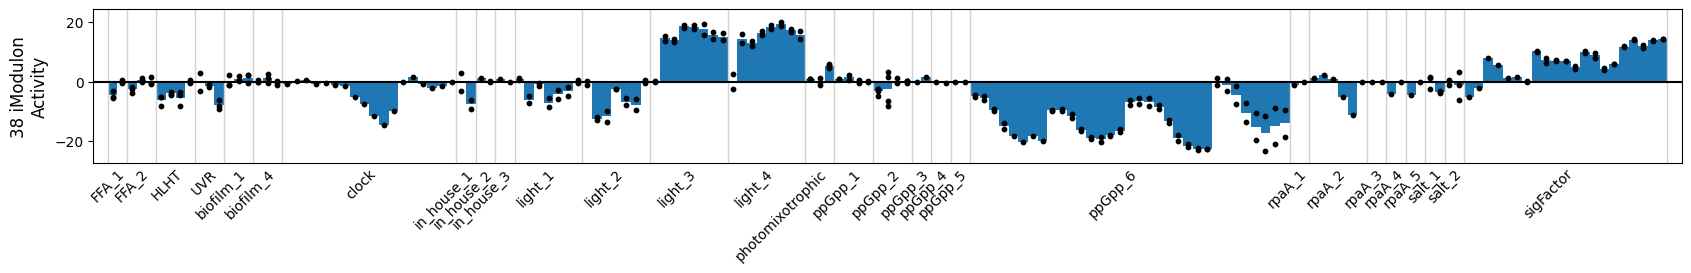

In [61]:
plot_activities(ica_data,38)

<AxesSubplot:ylabel='38 iModulon\nActivity'>

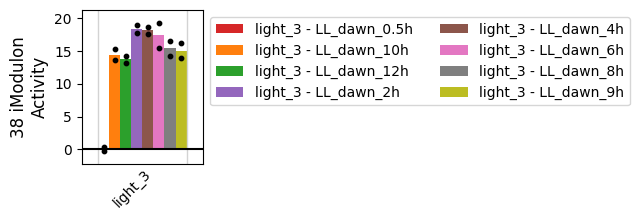

In [136]:
plot_activities(ica_data,38,projects='light_3')

<AxesSubplot:ylabel='38 iModulon\nActivity'>

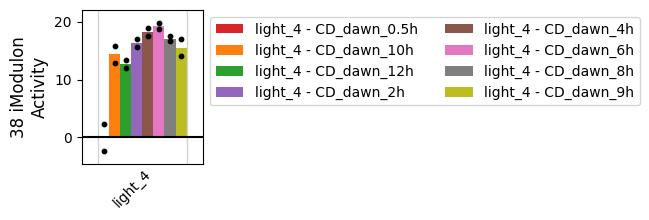

In [137]:
plot_activities(ica_data,38,projects='light_4')

<AxesSubplot:ylabel='38 iModulon\nActivity'>

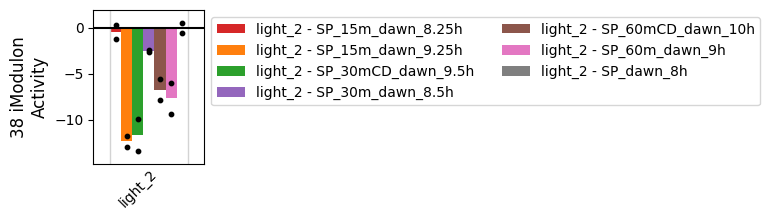

In [139]:
plot_activities(ica_data,38,projects='light_2')

<AxesSubplot:ylabel='PSII-2 iModulon\nActivity'>

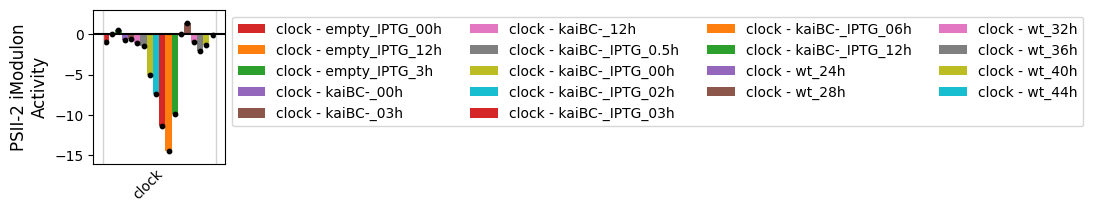

In [365]:
plot_activities(ica_data,'PSII-2',projects='clock')

<AxesSubplot:ylabel='PSII-2 iModulon\nActivity'>

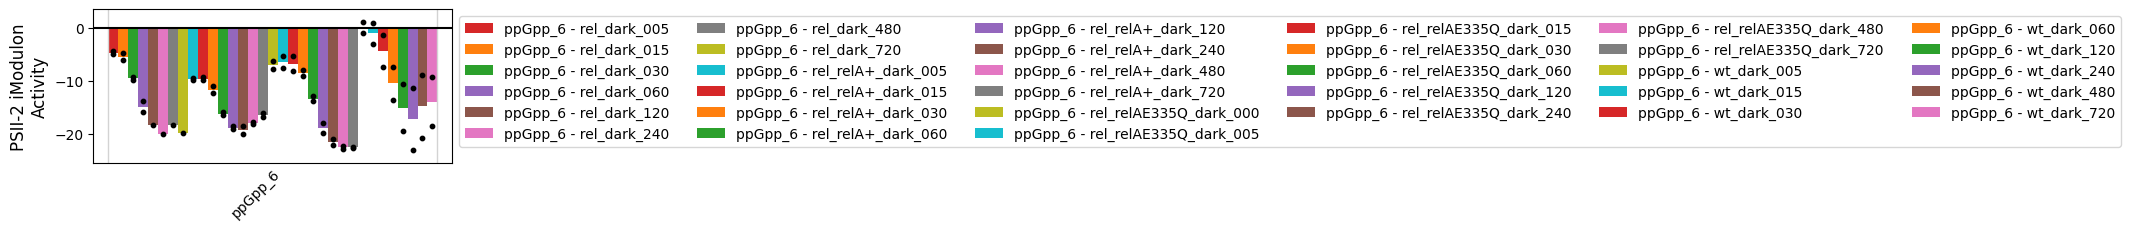

In [364]:
plot_activities(ica_data,'PSII-2',projects='ppGpp_6')

In [140]:
DF_enrichments[DF_enrichments.imodulon=='38'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue        qvalue  precision    recall  \
42       38   map00196  5.173019e-22  1.060469e-19   0.295455  0.812500   
43       38   map00195  6.934575e-10  7.107940e-08   0.250000  0.192982   
20       38     M00161  2.289009e-07  4.669579e-05   0.113636  0.500000   
45       38   map02025  1.309164e-04  6.709466e-03   0.090909  0.235294   
21       38     M00507  8.082307e-05  8.243953e-03   0.068182  0.500000   
46       38   map02020  6.501595e-04  2.665654e-02   0.113636  0.113636   
44       38   map01100  1.897039e-08  1.296310e-06   0.590909  0.047445   

     f1score    TP  target_set_size  imodulon_size         source  \
42  0.433333  13.0             16.0           44.0  KEGG pathways   
43  0.217822  11.0             57.0           44.0  KEGG pathways   
20  0.185185   5.0             10.0           44.0   KEGG modules   
45  0.131148   4.0             17.0           44.0  KEGG pathways   
21  0.120000   3.0              6.0           44.0   KEGG modules   
46  0.113636   5.0             44.0           44.0  KEGG pathways   
44  0.087838  26.0            548.0           44.0  KEGG pathways   

                                  pathway_name     module_name  
42           Photosynthesis - antenna proteins             NaN  
43                              Photosynthesis             NaN  
20                                         NaN  Photosystem II  
45  Biofilm formation - Pseudomonas aeruginosa             NaN  
21                                         NaN             NaN  
46                        Two-component system             NaN  
44                          Metabolic pathways             NaN

In [250]:
# Update the ICA data object

# ica_data.rename_imodulons({'photosystem':'PSII-2'})
# ica_data.imodulon_table.loc['photosystem','category'] = 'functional'

### iModulon 42: unknown

In [198]:
ica_data.view_imodulon(42)

gene_weight         gene_name    accession  \
HTX97_RS00010       -0.038047     HTX97_RS00010  NC_004990.1   
HTX97_RS00005       -0.035832     HTX97_RS00005  NC_004990.1   
Synpcc7942_0014      0.048969   Synpcc7942_0014   CP000100.1   
Synpcc7942_0032      0.087094   Synpcc7942_0032   CP000100.1   
Synpcc7942_0033      0.185011                 -   CP000100.1   
...                       ...               ...          ...   
Synpcc7942_B2662     0.035924              srpI   CP000101.1   
Synpcc7942_B2616     0.077161             anL42   CP000101.1   
Synpcc7942_B2655     0.110961             anL58   CP000101.1   
Synpcc7942_B2656     0.160087             anL02   CP000101.1   
Synpcc7942_B2658     0.056923  Synpcc7942_B2658   CP000101.1   

                          old_locus_tag  start    end strand  \
HTX97_RS00010     pUH24_03%2CST32046_p3    574   1161      -   
HTX97_RS00005     pUH24_01%2CST32046_p1   7504   8145      -   
Synpcc7942_0014                          13067  13411      -   
Synpcc7942_0032                          32849  33202      -   
Synpcc7942_0033                          33174  33506      -   
...                                 ...    ...    ...    ...   
Synpcc7942_B2662                          5275   6195      -   
Synpcc7942_B2616                          8691   9050      +   
Synpcc7942_B2655                         22675  23511      -   
Synpcc7942_B2656                         27980  28894      -   
Synpcc7942_B2658                         34129  34359      -   

                                    gene_product  \
HTX97_RS00010               hypothetical protein   
HTX97_RS00005               hypothetical protein   
Synpcc7942_0014   conserved hypothetical protein   
Synpcc7942_0032   conserved hypothetical protein   
Synpcc7942_0033   conserved hypothetical protein   
...                                          ...   
Synpcc7942_B2662        major membrane protein I   
Synpcc7942_B2616  conserved hypothetical protein   
Synpcc7942_B2655  conserved hypothetical protein   
Synpcc7942_B2656            hypothetical protein   
Synpcc7942_B2658            hypothetical protein   

                                             COG uniprot operon regulator  
HTX97_RS00010                  No COG annotation            Op3            
HTX97_RS00005                  No COG annotation           Op17            
Synpcc7942_0014   Signal transduction mechanisms  Q31SC3   Op29            
Synpcc7942_0032                 Function unknown  Q31SA5   Op50            
Synpcc7942_0033                 Function unknown  Q31SA4   Op51            
...                                          ...     ...    ...       ...  
Synpcc7942_B2662               No COG annotation  Q55032   Op12            
Synpcc7942_B2616               No COG annotation  Q8KUU4   Op19            
Synpcc7942_B2655               No COG annotation  Q8KUT3   Op39            
Synpcc7942_B2656               No COG annotation  Q8KUX3   Op45            
Synpcc7942_B2658               No COG annotation  Q31JU1   Op54            

[120 rows x 12 columns]

<AxesSubplot:xlabel='Gene Start', ylabel='42 Gene Weight'>

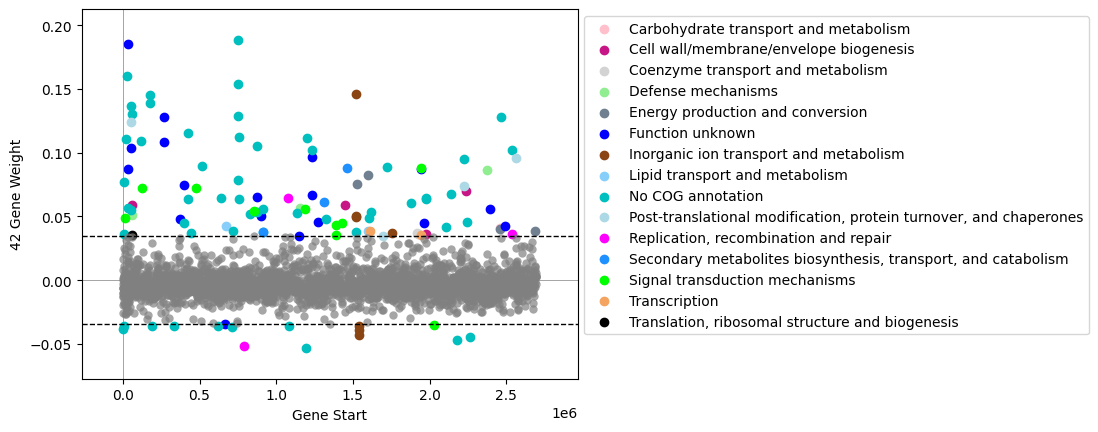

In [199]:
plot_gene_weights(ica_data,42)

<AxesSubplot:ylabel='42 iModulon\nActivity'>

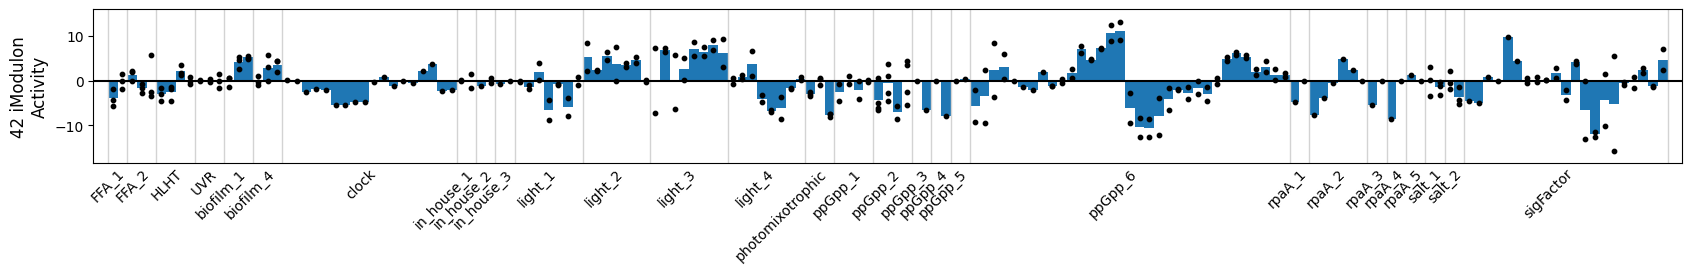

In [200]:
plot_activities(ica_data,42)

In [201]:
DF_enrichments[DF_enrichments.imodulon=='42'].sort_values('f1score',ascending=False)

imodulon annotation    pvalue    qvalue  precision  recall   f1score   TP  \
22       42     M00321  0.000343  0.070018      0.025    0.75  0.048387  3.0   

    target_set_size  imodulon_size        source pathway_name module_name  
22              4.0          120.0  KEGG modules          NaN         NaN

In [335]:
# Update ICA data object
# ica_data.rename_imodulons({42:'unchar-5'})
# ica_data.imodulon_table.loc['unchar-5','category'] = 'uncharacterized'

### iModulon 45: unknown

In [171]:
ica_data.view_imodulon(45)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0437     0.087484          sel0033  CP000100.1                 
Synpcc7942_0918    -0.111153             fadD  CP000100.1                 
Synpcc7942_1023     0.147188                -  CP000100.1                 
Synpcc7942_1563     0.091060  Synpcc7942_1563  CP000100.1                 
Synpcc7942_2127     0.098265             nblA  CP000100.1                 

                   start      end strand  \
Synpcc7942_0437   427463   428029      +   
Synpcc7942_0918   924079   926028      +   
Synpcc7942_1023  1037841  1038086      -   
Synpcc7942_1563  1621096  1621512      -   
Synpcc7942_2127  2207167  2207346      +   

                                           gene_product  \
Synpcc7942_0437         putative glutathione peroxidase   
Synpcc7942_0918        long-chain-fatty-acid CoA ligase   
Synpcc7942_1023          conserved hypothetical protein   
Synpcc7942_1563           signal transduction inhibitor   
Synpcc7942_2127  phycobilisome degradation protein NblA   

                                            COG uniprot  operon regulator  
Synpcc7942_0437               No COG annotation  Q8GMQ9   Op350            
Synpcc7942_0918  Lipid transport and metabolism  Q31PS1   Op704            
Synpcc7942_1023               No COG annotation  Q31PG6   Op782            
Synpcc7942_1563               No COG annotation  Q31MX6  Op1181            
Synpcc7942_2127               No COG annotation  P35087  Op1601

<AxesSubplot:xlabel='Gene Start', ylabel='45 Gene Weight'>

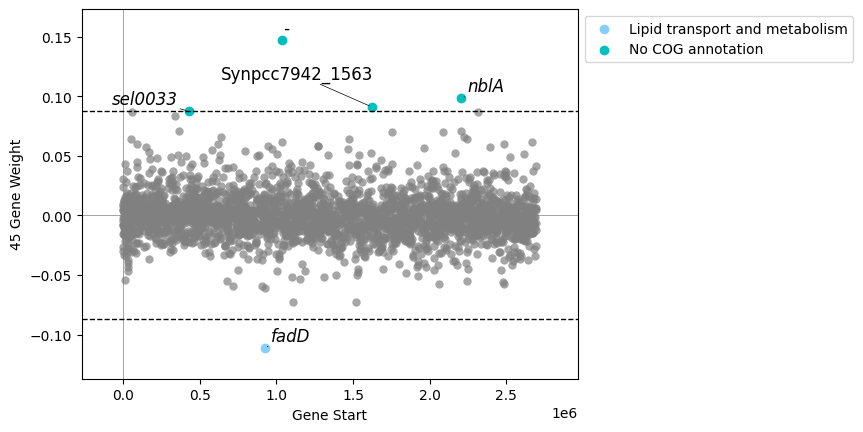

In [172]:
plot_gene_weights(ica_data,45)

<AxesSubplot:ylabel='45 iModulon\nActivity'>

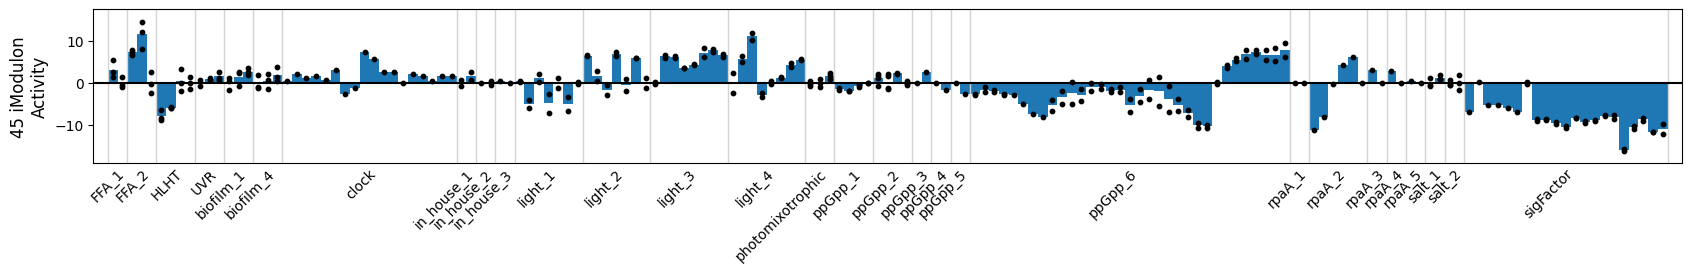

In [173]:
plot_activities(ica_data,45)

<AxesSubplot:ylabel='45 iModulon\nActivity'>

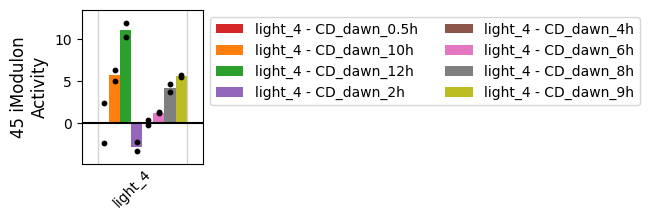

In [178]:
plot_activities(ica_data,45,projects = 'light_4')

In [151]:
DF_enrichments[DF_enrichments.imodulon=='45'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [337]:
# ica_data.rename_imodulons({45:'unchar-6'})
# ica_data.imodulon_table.loc['unchar-6','category'] = 'uncharacterized'

### iModulon 47: sps_ko

In [67]:
ica_data.view_imodulon(47)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0808      0.361658             spsA  CP000100.1           NaN   
Synpcc7942_0809     -0.204011  Synpcc7942_0809  CP000100.1           NaN   
Synpcc7942_0810     -0.098993  Synpcc7942_0810  CP000100.1           NaN   
Synpcc7942_1290     -0.102221                -  CP000100.1           NaN   
Synpcc7942_1475      0.107325             sbtA  CP000100.1           NaN   
Synpcc7942_1488     -0.101347             cmpA  CP000100.1           NaN   
Synpcc7942_1489     -0.121481             cmpB  CP000100.1           NaN   
Synpcc7942_1490     -0.155393             cmpC  CP000100.1           NaN   
Synpcc7942_1491     -0.159504             cmpD  CP000100.1           NaN   
Synpcc7942_B2617     0.104781            anL43  CP000101.1           NaN   

                    start      end strand  \
Synpcc7942_0808    800851   802980      -   
Synpcc7942_0809    803073   804815      +   
Synpcc7942_0810    804853   805086      +   
Synpcc7942_1290   1313290  1313460      -   
Synpcc7942_1475   1525833  1526954      -   
Synpcc7942_1488   1538545  1539897      +   
Synpcc7942_1489   1539953  1540789      +   
Synpcc7942_1490   1540818  1542809      +   
Synpcc7942_1491   1542834  1543670      +   
Synpcc7942_B2617     9300     9845      -   

                                                    gene_product  \
Synpcc7942_0808          HAD-superfamily hydrolase subfamily IIB   
Synpcc7942_0809                   conserved hypothetical protein   
Synpcc7942_0810                             hypothetical protein   
Synpcc7942_1290                             SmtA metallothionein   
Synpcc7942_1475         sodium-dependent bicarbonate transporter   
Synpcc7942_1488                                 membrane protein   
Synpcc7942_1489                       nitrate transport permease   
Synpcc7942_1490   nitrate transport ATP-binding subunits C and D   
Synpcc7942_1491   nitrate transport ATP-binding subunits C and D   
Synpcc7942_B2617                  conserved hypothetical protein   

                                                     COG uniprot  operon  
Synpcc7942_0808   Cell wall/membrane/envelope biogenesis  Q31Q29   Op621  
Synpcc7942_0809   Cell wall/membrane/envelope biogenesis  Q31Q28   Op622  
Synpcc7942_0810                        No COG annotation  Q31Q27   Op622  
Synpcc7942_1290                         Function unknown  P30331   Op968  
Synpcc7942_1475                         Function unknown  Q31N64  Op1113  
Synpcc7942_1488   Inorganic ion transport and metabolism  P39660  Op1122  
Synpcc7942_1489   Inorganic ion transport and metabolism  Q55106  Op1122  
Synpcc7942_1490   Inorganic ion transport and metabolism  Q55107  Op1122  
Synpcc7942_1491   Inorganic ion transport and metabolism  Q55108  Op1122  
Synpcc7942_B2617                       No COG annotation  Q8KUU3    Op21

<AxesSubplot:xlabel='Gene Start', ylabel='47 Gene Weight'>

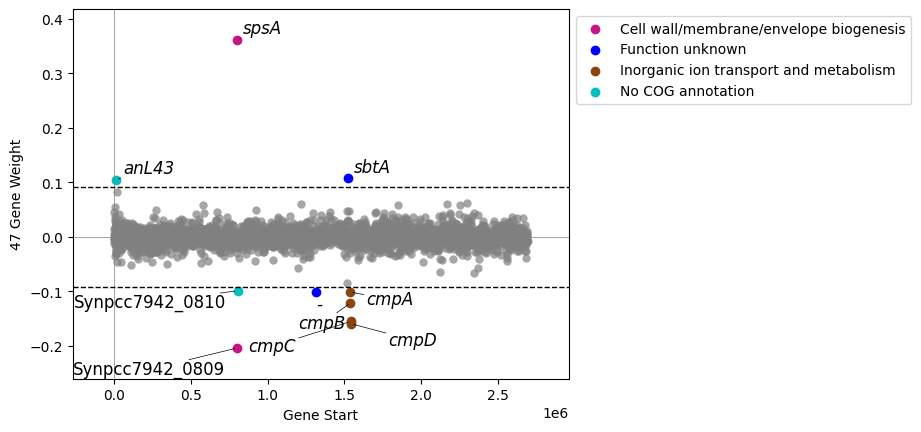

In [23]:
plot_gene_weights(ica_data,47)

<AxesSubplot:ylabel='47 iModulon\nActivity'>

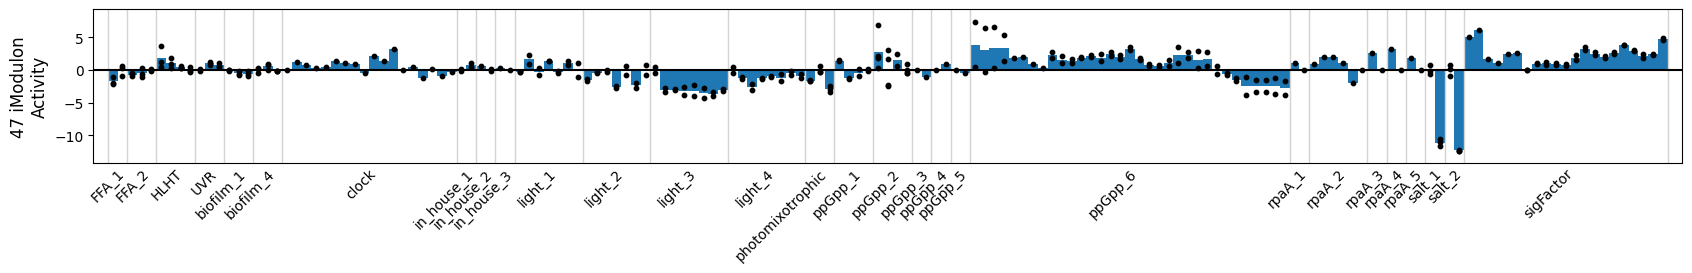

In [68]:
plot_activities(ica_data,47)

<AxesSubplot:ylabel='47 iModulon\nActivity'>

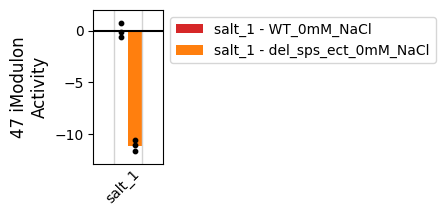

In [30]:
plot_activities(ica_data,47,projects='salt_1')

<AxesSubplot:ylabel='47 iModulon\nActivity'>

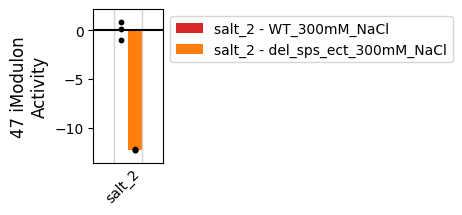

In [31]:
plot_activities(ica_data,47,projects='salt_2')

In [152]:
DF_enrichments[DF_enrichments.imodulon=='47'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [24]:
# Update ICA data object
# ica_data.rename_imodulons({47:'sps_ko'})
# ica_data.imodulon_table.loc['yxi-operon','category'] = 'functional'

### iModulon 51: ribosome

In [161]:
ica_data.view_imodulon(51)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0632     0.086440             rplJ  CP000100.1           NaN   
Synpcc7942_0633     0.081628             rplA  CP000100.1           NaN   
Synpcc7942_0634     0.083561             rplK  CP000100.1           NaN   
Synpcc7942_0693     0.088678  Synpcc7942_0693  CP000100.1           NaN   
Synpcc7942_0886     0.083238             rpsG  CP000100.1           NaN   
Synpcc7942_0887     0.080060             rpsL  CP000100.1           NaN   
Synpcc7942_1084    -0.079708                -  CP000100.1           NaN   
Synpcc7942_1122     0.120325             rpmG  CP000100.1           NaN   
Synpcc7942_1123     0.117764             rpsR  CP000100.1           NaN   
Synpcc7942_1222     0.078151             truB  CP000100.1           NaN   
Synpcc7942_1278     0.079503             rpmI  CP000100.1           NaN   
Synpcc7942_1377    -0.086770  Synpcc7942_1377  CP000100.1           NaN   
Synpcc7942_2408     0.093780  Synpcc7942_2408  CP000100.1           NaN   
Synpcc7942_2541     0.082614             rplS  CP000100.1           NaN   

                   start      end strand                      gene_product  \
Synpcc7942_0632   624322   624849      -        LSU ribosomal protein L10P   
Synpcc7942_0633   625078   625791      -         LSU ribosomal protein L1P   
Synpcc7942_0634   625866   626291      -        LSU ribosomal protein L11P   
Synpcc7942_0693   686247   687080      -    conserved hypothetical protein   
Synpcc7942_0886   893112   893582      -         SSU ribosomal protein S7P   
Synpcc7942_0887   893750   894124      -        SSU ribosomal protein S12P   
Synpcc7942_1084  1099185  1099628      -              hypothetical protein   
Synpcc7942_1122  1140801  1140995      +        LSU ribosomal protein L33P   
Synpcc7942_1123  1141051  1141266      +        SSU ribosomal protein S18P   
Synpcc7942_1222  1242925  1243809      +     tRNA pseudouridine synthase B   
Synpcc7942_1278  1301569  1301769      -        LSU ribosomal protein L35P   
Synpcc7942_1377  1417540  1419879      +  metal dependent phosphohydrolase   
Synpcc7942_2408  2481009  2481395      -    conserved hypothetical protein   
Synpcc7942_2541  2622353  2622766      +        LSU ribosomal protein L19P   

                                                             COG uniprot  \
Synpcc7942_0632  Translation, ribosomal structure and biogenesis  Q31QK5   
Synpcc7942_0633  Translation, ribosomal structure and biogenesis  Q31QK4   
Synpcc7942_0634  Translation, ribosomal structure and biogenesis  Q31QK3   
Synpcc7942_0693                                 Function unknown  Q31QE4   
Synpcc7942_0886  Translation, ribosomal structure and biogenesis  Q31PV3   
Synpcc7942_0887  Translation, ribosomal structure and biogenesis  P63200   
Synpcc7942_1084                                No COG annotation  Q31PA5   
Synpcc7942_1122  Translation, ribosomal structure and biogenesis  Q31P67   
Synpcc7942_1123  Translation, ribosomal structure and biogenesis  Q31P66   
Synpcc7942_1222  Translation, ribosomal structure and biogenesis  Q8KIY0   
Synpcc7942_1278  Translation, ribosomal structure and biogenesis  Q31NR1   
Synpcc7942_1377                                    Transcription  Q31NG2   
Synpcc7942_2408  Translation, ribosomal structure and biogenesis  Q31KI1   
Synpcc7942_2541  Translation, ribosomal structure and biogenesis  Q31K48   

                 operon   regulator  
Synpcc7942_0632   Op493  L10_leader  
Synpcc7942_0633   Op494         NaN  
Synpcc7942_0634   Op495         NaN  
Synpcc7942_0693   Op540         NaN  
Synpcc7942_0886   Op678         NaN  
Synpcc7942_0887   Op679         NaN  
Synpcc7942_1084   Op825         NaN  
Synpcc7942_1122   Op851         NaN  
Synpcc7942_1123   Op852         NaN  
Synpcc7942_1222   Op923         NaN  
Synpcc7942_1278   Op962         NaN  
Synpcc7942_1377  Op1036         NaN  
Synpcc7942_2408  Op1801         NaN  
Synpcc7942_2541  Op1903         NaN

<AxesSubplot:ylabel='51 iModulon\nActivity'>

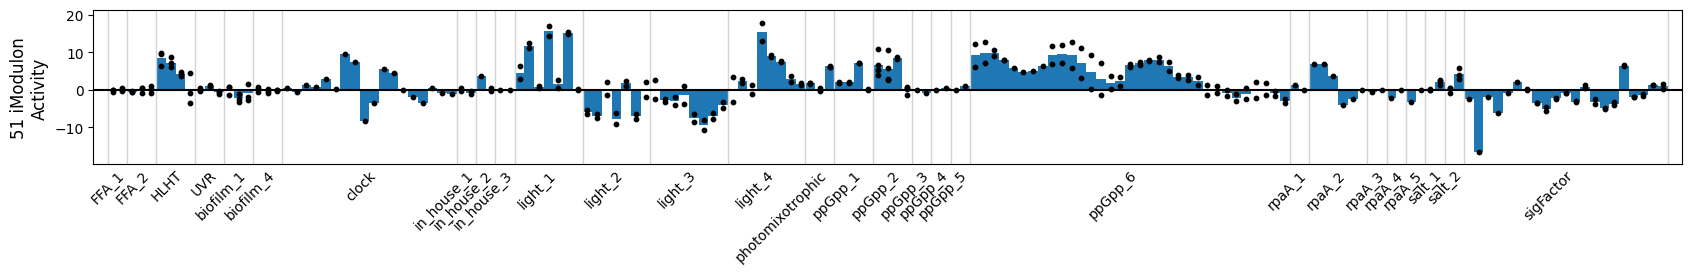

In [162]:
plot_activities(ica_data,51)

In [163]:
DF_enrichments[DF_enrichments.imodulon=='51'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue        qvalue  precision    recall  \
50       51   map03010  4.404872e-13  9.029988e-11   0.642857  0.169811   
24       51     M00178  4.404872e-13  8.985939e-11   0.642857  0.169811   
25       51     M00179  2.364095e-07  2.411377e-05   0.357143  0.166667   

     f1score   TP  target_set_size  imodulon_size         source pathway_name  \
50  0.268657  9.0             53.0           14.0  KEGG pathways     Ribosome   
24  0.268657  9.0             53.0           14.0   KEGG modules          NaN   
25  0.227273  5.0             30.0           14.0   KEGG modules          NaN   

   module_name  
50         NaN  
24         NaN  
25         NaN

In [166]:
# Update ICA data object
# ica_data.rename_imodulons({51:'ribosome'})
# ica_data.imodulon_table.loc['ribosome','category'] = 'functional'

### iModulon 52: unknown

In [187]:
ica_data.view_imodulon(52)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_1165     0.423366  Synpcc7942_1165  CP000100.1                 
Synpcc7942_1539    -0.093939                -  CP000100.1                 
Synpcc7942_2157     0.104686  Synpcc7942_2157  CP000100.1                 
Synpcc7942_2275     0.293566  Synpcc7942_2275  CP000100.1                 

                   start      end strand                    gene_product  \
Synpcc7942_1165  1198844  1199239      -            hypothetical protein   
Synpcc7942_1539  1597516  1597818      -  conserved hypothetical protein   
Synpcc7942_2157  2240800  2241084      -  conserved hypothetical protein   
Synpcc7942_2275  2343631  2343915      +            hypothetical protein   

                                                 COG uniprot  operon regulator  
Synpcc7942_1165  Nucleotide transport and metabolism  Q31P24   Op888            
Synpcc7942_1539                    No COG annotation  Q31N00  Op1160            
Synpcc7942_2157                    No COG annotation  Q31L82  Op1625            
Synpcc7942_2275                    No COG annotation  Q31KW4  Op1704

<AxesSubplot:xlabel='Gene Start', ylabel='52 Gene Weight'>

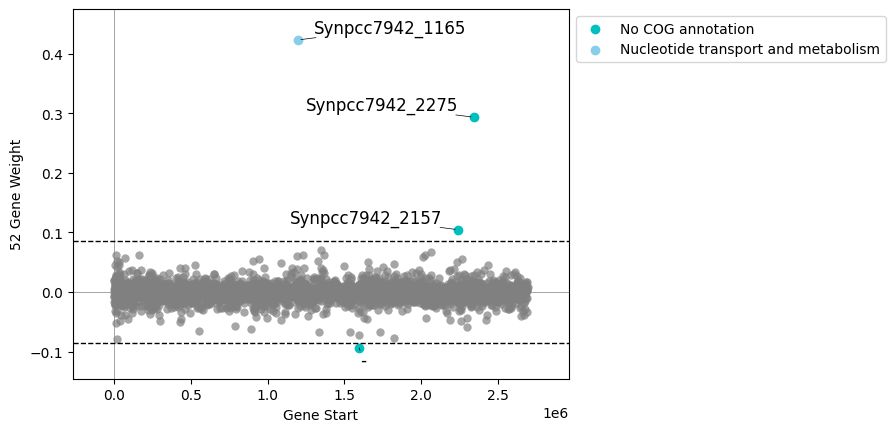

In [188]:
plot_gene_weights(ica_data,52)

<AxesSubplot:ylabel='52 iModulon\nActivity'>

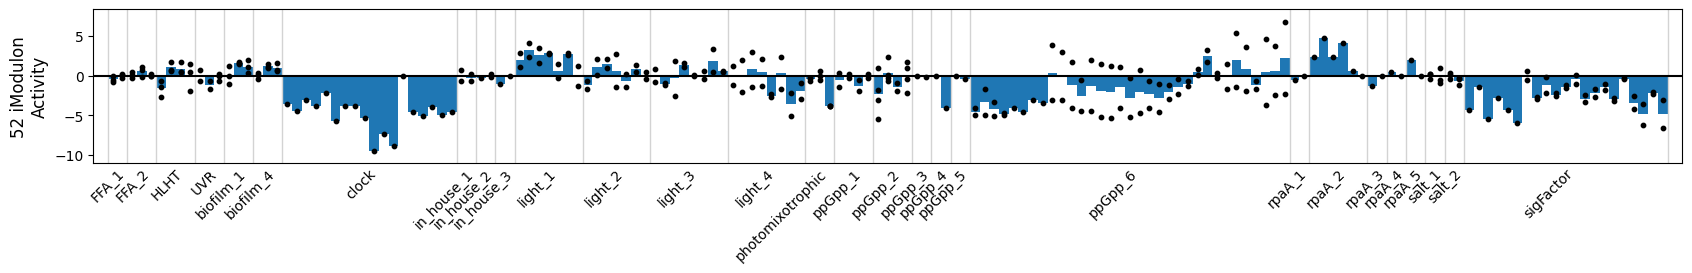

In [189]:
plot_activities(ica_data,52)

<AxesSubplot:ylabel='52 iModulon\nActivity'>

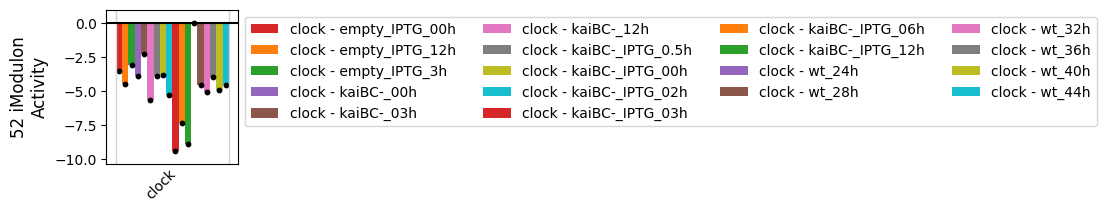

In [191]:
plot_activities(ica_data,52,projects='clock')

In [190]:
DF_enrichments[DF_enrichments.imodulon=='52'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [338]:
# Update ICA data object
# ica_data.rename_imodulons({52:'unchar-7'})
# ica_data.imodulon_table.loc['unchar-7','category'] = 'uncharacterized'

### iModulon 53: unknown

In [192]:
ica_data.view_imodulon(53)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0063     -0.077730  Synpcc7942_0063  CP000100.1                 
Synpcc7942_0353      0.068353  Synpcc7942_0353  CP000100.1                 
Synpcc7942_0383      0.087053  Synpcc7942_0383  CP000100.1                 
Synpcc7942_0630      0.071614  Synpcc7942_0630  CP000100.1                 
Synpcc7942_1281      0.083935  Synpcc7942_1281  CP000100.1                 
Synpcc7942_1343      0.099991             ndhA  CP000100.1                 
Synpcc7942_1344      0.072562             ndhI  CP000100.1                 
Synpcc7942_1361      0.068843  Synpcc7942_1361  CP000100.1                 
Synpcc7942_1426      0.073147             cbbL  CP000100.1                 
Synpcc7942_1648      0.102862  Synpcc7942_1648  CP000100.1                 
Synpcc7942_1744      0.072895  Synpcc7942_1744  CP000100.1                 
Synpcc7942_1866      0.113842  Synpcc7942_1866  CP000100.1                 
Synpcc7942_1948      0.075389  Synpcc7942_1948  CP000100.1                 
Synpcc7942_2022      0.073783             nusA  CP000100.1                 
Synpcc7942_2046      0.073222             gcvH  CP000100.1                 
Synpcc7942_2178      0.090779  Synpcc7942_2178  CP000100.1                 
Synpcc7942_2204      0.084507             rpmE  CP000100.1                 
Synpcc7942_2205      0.163057             rpsI  CP000100.1                 
Synpcc7942_2206      0.072883             rplM  CP000100.1                 
Synpcc7942_2230      0.068155             rplW  CP000100.1                 
Synpcc7942_B2654     0.115303            anL35  CP000101.1                 

                    start      end strand  \
Synpcc7942_0063     64266    64706      -   
Synpcc7942_0353    345470   346432      +   
Synpcc7942_0383    375762   376448      -   
Synpcc7942_0630    622432   623574      +   
Synpcc7942_1281   1303144  1303836      -   
Synpcc7942_1343   1377217  1378335      +   
Synpcc7942_1344   1378378  1378986      +   
Synpcc7942_1361   1401085  1401588      +   
Synpcc7942_1426   1479461  1480879      +   
Synpcc7942_1648   1716189  1716638      -   
Synpcc7942_1744   1815423  1815833      +   
Synpcc7942_1866   1936389  1936799      -   
Synpcc7942_1948   2023694  2023939      +   
Synpcc7942_2022   2090378  2091703      -   
Synpcc7942_2046   2118062  2118451      +   
Synpcc7942_2178   2258054  2258395      -   
Synpcc7942_2204   2284391  2284624      -   
Synpcc7942_2205   2284655  2285062      -   
Synpcc7942_2206   2285062  2285517      -   
Synpcc7942_2230   2297905  2298207      -   
Synpcc7942_B2654     2720     3070      -   

                                                       gene_product  \
Synpcc7942_0063                dual specificity protein phosphatase   
Synpcc7942_0353                      Na+-dependent transporter-like   
Synpcc7942_0383                                hypothetical protein   
Synpcc7942_0630                                hypothetical protein   
Synpcc7942_1281                      conserved hypothetical protein   
Synpcc7942_1343                        NADH dehydrogenase subunit 1   
Synpcc7942_1344   NADH-plastoquinone oxidoreductase%2C I subunit...   
Synpcc7942_1361                      conserved hypothetical protein   
Synpcc7942_1426   ribulose-1%2C5-bisphosphate carboxylase/oxygen...   
Synpcc7942_1648      putative ferric uptake regulator%2C FUR family   
Synpcc7942_1744                      conserved hypothetical protein   
Synpcc7942_1866                      conserved hypothetical protein   
Synpcc7942_1948                      conserved hypothetical protein   
Synpcc7942_2022                         NusA antitermination factor   
Synpcc7942_2046                   glycine cleavage system H protein   
Synpcc7942_2178                      conserved hypothetical protein   
Synpcc7942_2204                          LSU ribosomal protein L31P   
Synpcc7942_2205                           SSU ribosomal protein S9P   
Synpc

<AxesSubplot:xlabel='Gene Start', ylabel='53 Gene Weight'>

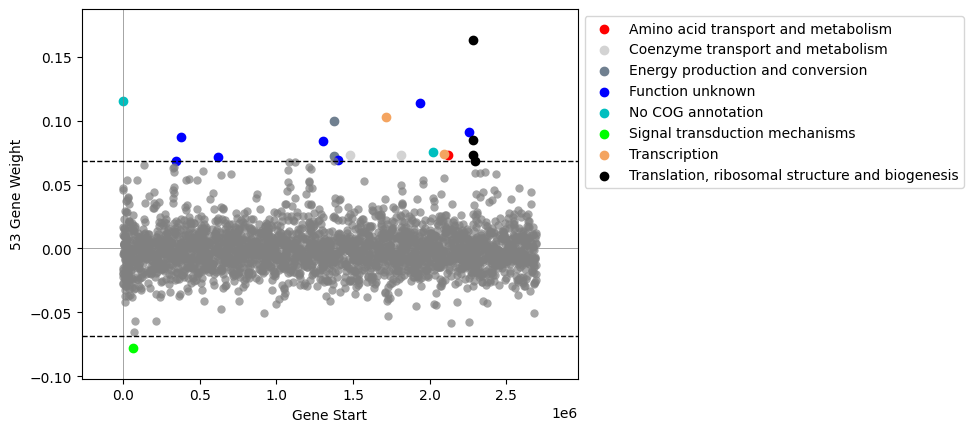

In [330]:
plot_gene_weights(ica_data,53)

<AxesSubplot:ylabel='53 iModulon\nActivity'>

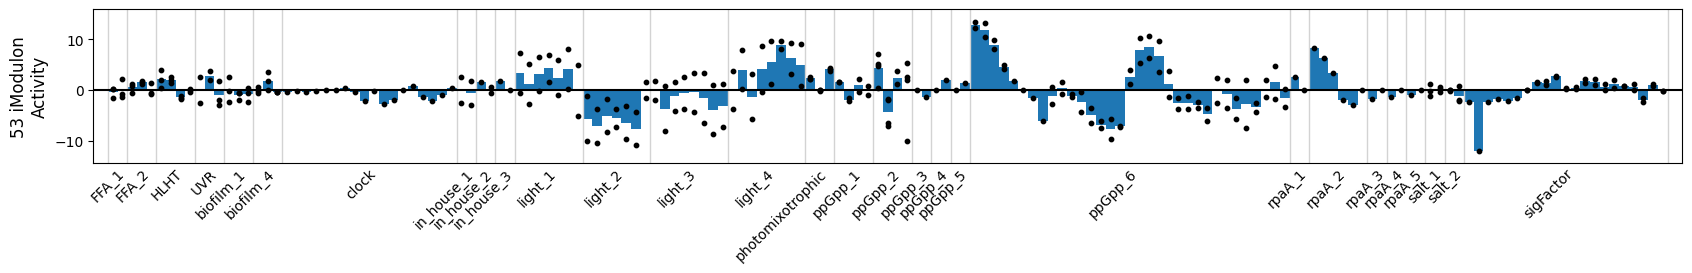

In [193]:
plot_activities(ica_data,53)

<AxesSubplot:ylabel='53 iModulon\nActivity'>

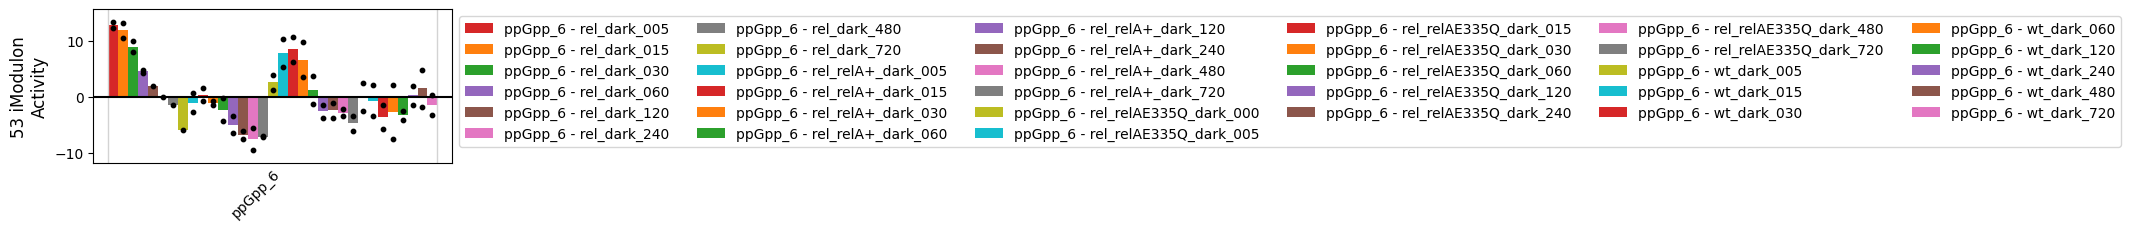

In [194]:
plot_activities(ica_data,53,projects='ppGpp_6')

<AxesSubplot:ylabel='53 iModulon\nActivity'>

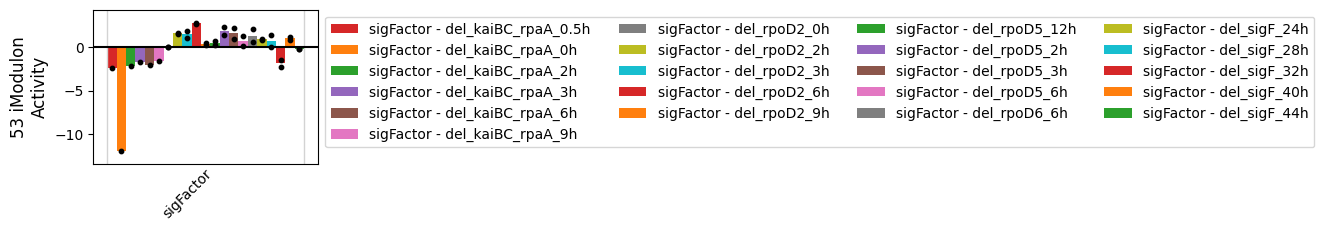

In [195]:
plot_activities(ica_data,53,projects='sigFactor')

In [160]:
DF_enrichments[DF_enrichments.imodulon=='53'].sort_values('f1score',ascending=False)

Empty DataFrame
Columns: [imodulon, annotation, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, pathway_name, module_name]
Index: []

In [339]:
# Update ICA data object
# ica_data.rename_imodulons({53:'unchar-8'})
# ica_data.imodulon_table.loc['unchar-8','category'] = 'uncharacterized'

# Cluster activities

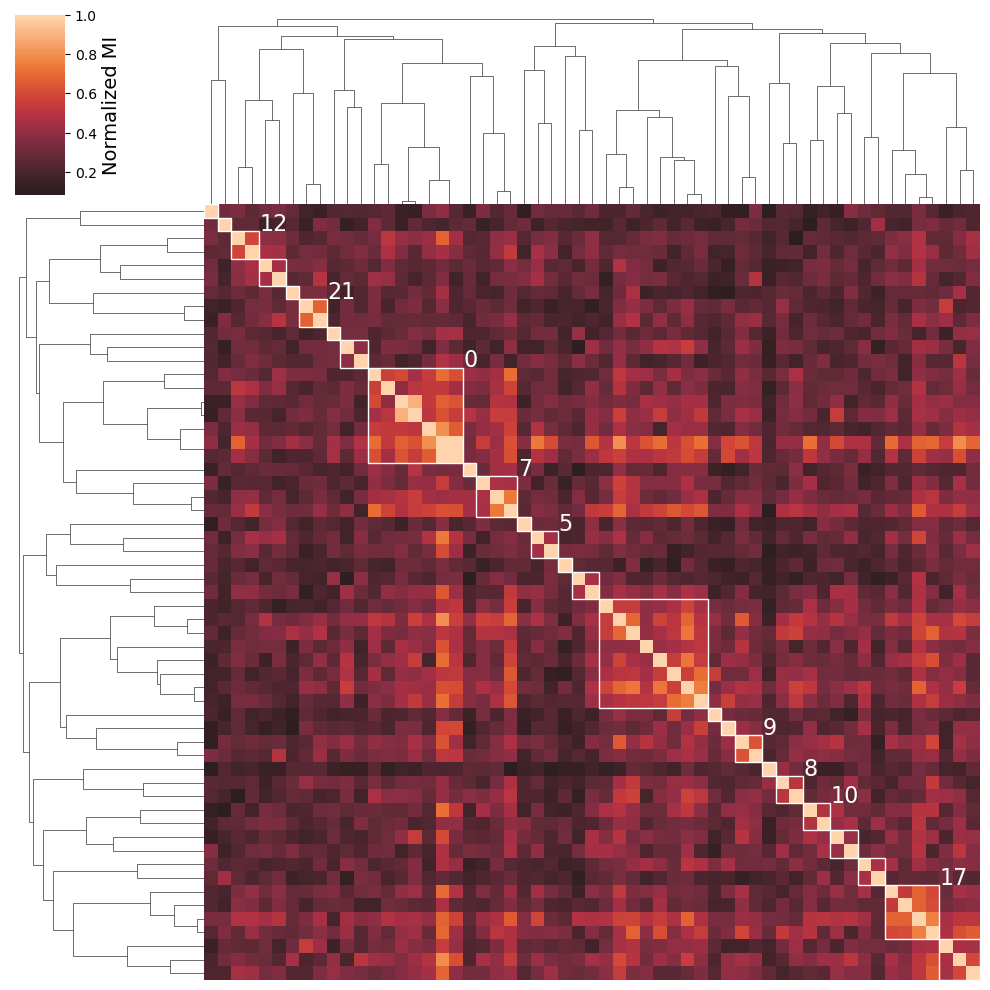

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.9, linkage='complete',
                         n_clusters=None)]

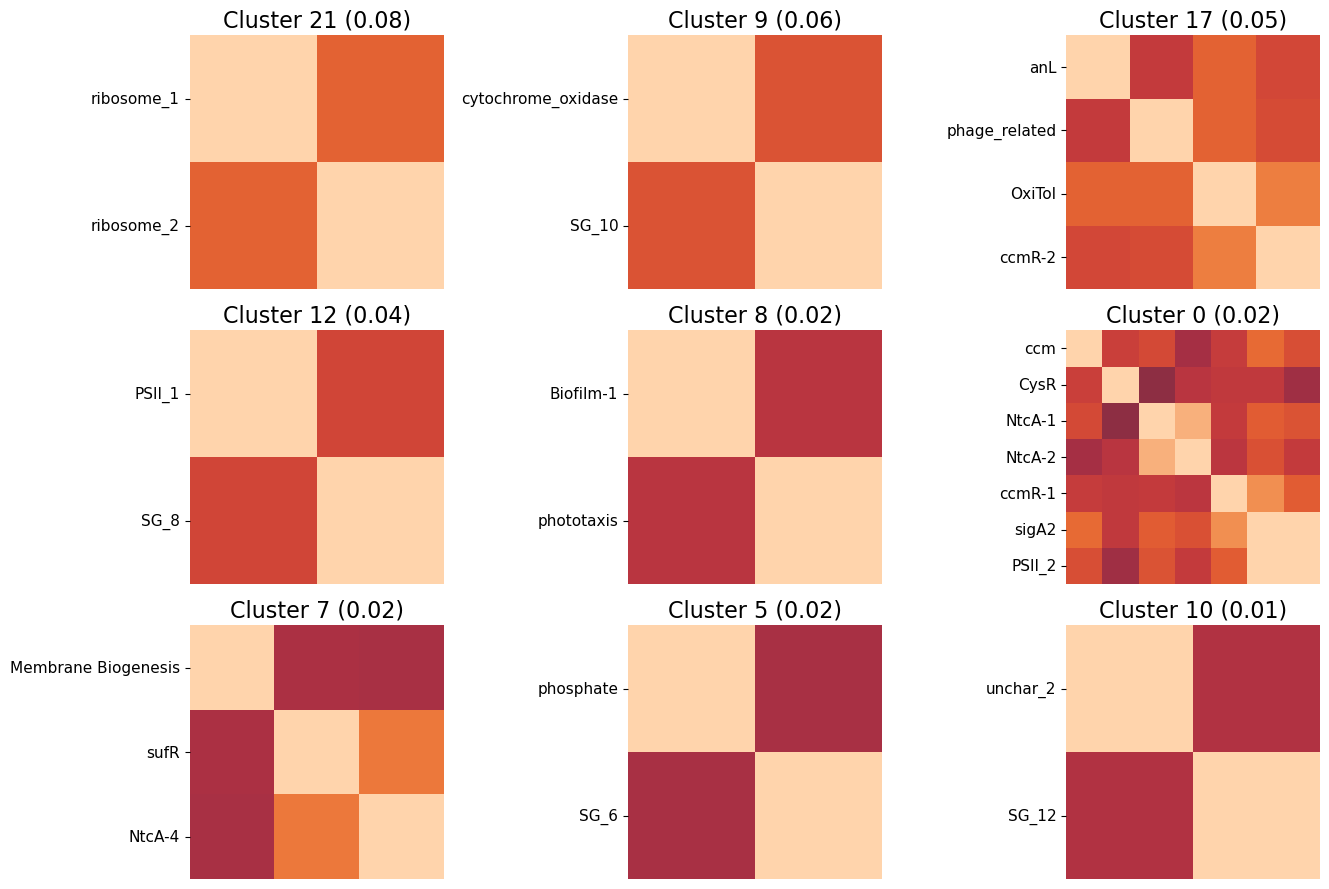

In [223]:
cluster_activities(ica_data,
#                    distance_threshold=0.88,
                   show_best_clusters=True,
#                    dimca_sample1= 'ppGpp_6:wt_dark_005',
# #                    dimca_sample2= 'ppGpp_6:wt_dark_480',
#                    dimca_sample1= 'biofilm_4:btn3_planktonic_BG_d4',
#                    dimca_sample2= 'biofilm_4:btn5_biofilm_BG_d4',
                   correlation_method = 'mutual_info')

# Activity trends

<AxesSubplot:ylabel='ribosome iModulon\nActivity'>

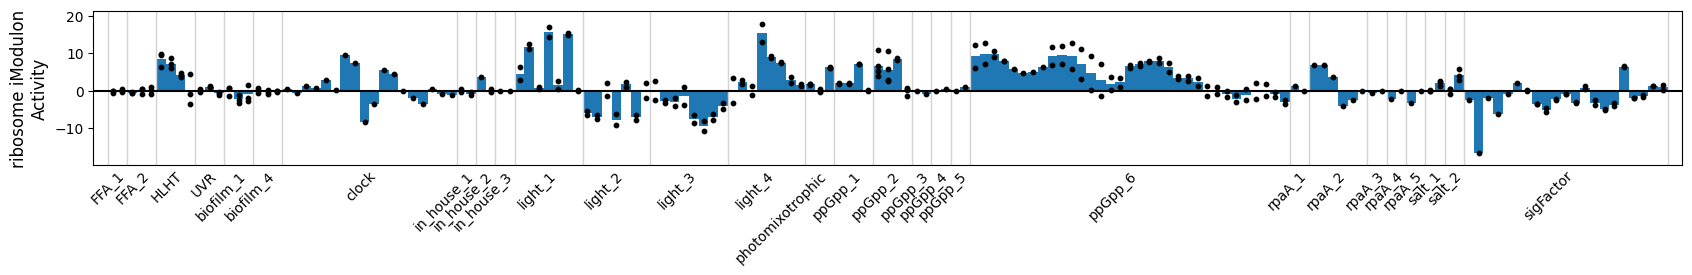

In [403]:
plot_activities(ica_data,'ribosome')

In [388]:
clst = ['CMM','CysR','NtcA-1','NtcA-2','ccmR-1','RpaA/RpaB','PSII-2']

In [373]:
ppgpp6_idx = ica_data.sample_table[ica_data.sample_table['project'] == 'ppGpp_6'].index

In [416]:
l = [x[-3:] for x in ica_data.sample_table.loc[ppgpp6_idx].condition]

In [418]:
plt.xticks?

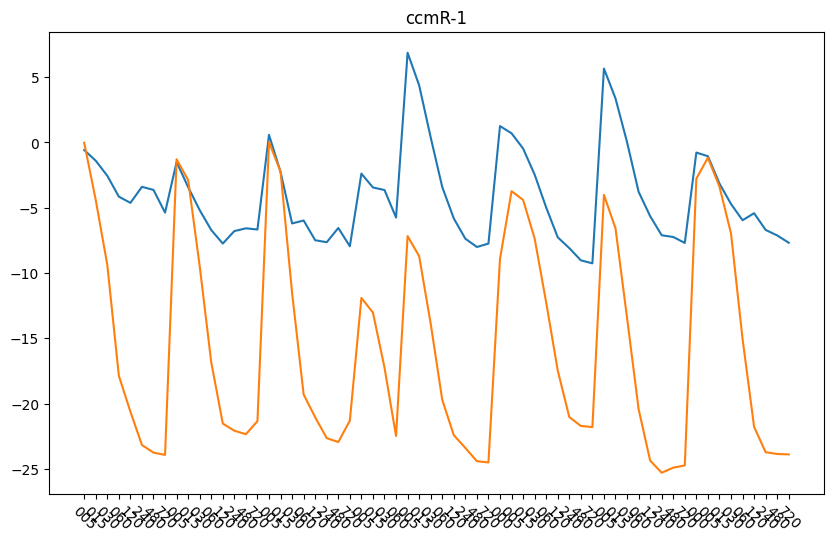

In [429]:
plt.figure(figsize = (10,6))
for i in clst:
#     plt.figure(figsize = (14,6))
    plt.plot(ica_data.A[ppgpp6_idx].loc[i])
    plt.xticks(range(len(l)),l,rotation=-45)
    plt.title(i)

# Compare

In [144]:
from pymodulon.io import *
from pymodulon.compare import *

In [260]:
old = load_json_model(path.join('../Tahani/selon.json'))

In [146]:
mapping = pd.read_csv('../data/external/1_gene_mapping_biocyc.csv')
mapping = mapping.rename(columns={'objecct_id':'gene','new_locus':'subject'})
mapping['gene'] = mapping['gene'].str.replace('SYNPCC7942', 'Synpcc7942')
mapping.head()

gene             subject       name
0  Synpcc7942_R0020  SYNPCC7942_RS12910  tRNA-Asp1
1  Synpcc7942_R0033  SYNPCC7942_RS02990  tRNA-Ile1
2  Synpcc7942_R0016  SYNPCC7942_RS12495  tRNA-Ser2
3  Synpcc7942_R0048  SYNPCC7942_RS07055  tRNA-Leu3
4  Synpcc7942_R0030  SYNPCC7942_RS01480  tRNA-Ala3

In [147]:
dots,links = compare_ica(ica_data.M,old.M,cutoff=0.3,
                         ortho_file = mapping)
dots

[('ccm', 'CMM', 0.7635740932661363),
 ('ribosome_1', 'Translation', 0.8347086811785239),
 ('RpaA', 'RpaB', 0.7899229607783972),
 ('UV', 'PS', 0.4266618175901296),
 ('UV', 'NblS-RpaB-SrrA-2 ', 0.6725252633283263),
 ('unchar-1', 'Purine Metabolism', 0.7869260272010409),
 ('unchar-2', 'U_7', 0.846233608032885),
 ('SG_3', 'SG_3', 0.8166825384553833),
 ('anL', 'STR', 0.6809797211872531),
 ('ccmR-1', 'CmpR', 0.6940709901495997),
 ('ccmR-1', 'Carbon Transport', 0.5690560013527264),
 ('sigA2', 'RpaA/RpaB', 0.8340143453398555),
 ('cytochrome_oxidase', 'Cytc Oxidases ', 0.8254048496267856),
 ('iron', 'Fur-Like', 0.7342504598534098),
 ('OxPh NADPH **', 'OxPh NADPH **', 0.8747436398031416),
 ('unchar-4', 'U_11', 0.3738339975726932),
 ('unchar-4', 'U_12', 0.6306834923912443),
 ('NtcA-1', 'NtcA-1', 0.8428591758478795),
 ('Biofilm-1', 'Biofilm-1', 0.4902076699214532),
 ('Phage Related', 'Phage Related', 0.9070266634982251),
 ('unchar-5', 'Cell Division', 0.36432063596884084),
 ('unchar-5', 'U_5', 0.5

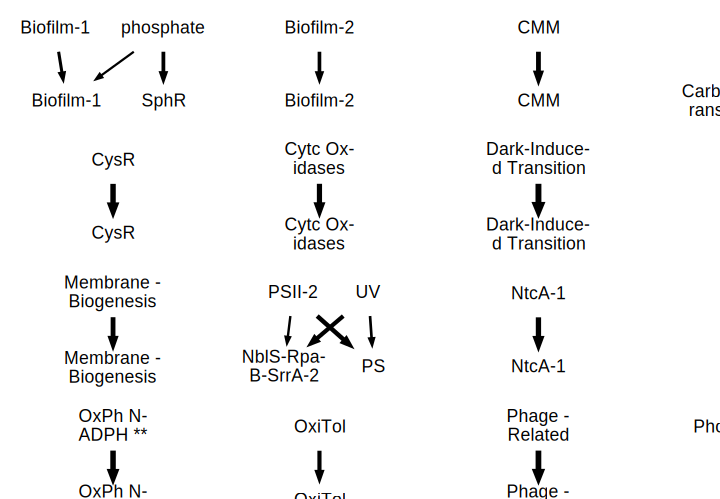

In [262]:
links

# Double-check low-scoring iModulons

In [211]:
ica_data.imodulon_table[ica_data.imodulon_table['f1score']  < 0.25]

regulator        pvalue        qvalue  precision    recall   f1score  \
NtcA-2      ntcA  2.770449e-09  8.311348e-09      0.175  0.388889  0.241379   

         TP  regulon_size  imodulon_size  n_regs single_gene  \
NtcA-2  7.0          18.0             40     1.0               

        explained_variance    category  
NtcA-2            0.021265  regulatory

In [212]:
def clear_row(imodulon):
    clear_columns = ['regulator','pvalue','qvalue','precision','recall','f1score','TP','regulon_size','n_regs']
    
    for col in clear_columns:
        ica_data.imodulon_table.loc[imodulon,col] = None

### CsoR/Fnr -> SPbeta-1

In [57]:
ica_data.imodulon_table.loc['CsoR/Fnr']

regulator                CsoR/Fnr
pvalue                1.84222e-11
qvalue                 8.7999e-07
precision                0.113636
recall                        0.4
f1score                  0.176991
TP                             10
regulon_size                   25
imodulon_size                  88
n_regs                          2
single_gene                   NaN
explained_variance      0.0182374
category               regulatory
Name: CsoR/Fnr, dtype: object

In [58]:
DF_enrichments[DF_enrichments.imodulon=='CsoR/Fnr'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue        qvalue  precision    recall  \
30  CsoR/Fnr        NaN  6.770882e-80  1.936472e-77   0.772727  0.361702   
31  CsoR/Fnr        NaN  7.175086e-65  1.026037e-62   0.772727  0.233677   
32  CsoR/Fnr        NaN  1.953503e-63  1.862339e-61   0.772727  0.223684   
33  CsoR/Fnr        NaN  3.678034e-07  2.629795e-05   0.056818  0.555556   
35  CsoR/Fnr        NaN  8.372872e-05  3.991069e-03   0.068182  0.162162   
34  CsoR/Fnr        NaN  1.866140e-05  1.067432e-03   0.045455  0.444444   
10  CsoR/Fnr        NaN  3.111113e-04  7.000005e-02   0.045455  0.235294   
10  CsoR/Fnr        NaN  8.144105e-06  2.190764e-03   0.034091  1.000000   
11  CsoR/Fnr        NaN  1.557860e-04  2.095322e-02   0.034091  0.500000   
12  CsoR/Fnr        NaN  4.093833e-04  3.670804e-02   0.022727  1.000000   

     f1score    TP  target_set_size  imodulon_size source   kegg_id  \
30  0.492754  68.0            188.0           88.0    NaN       NaN   
31  0.358839  68.0            291.0           88.0    NaN       NaN   
32  0.346939  68.0            304.0           88.0    NaN       NaN   
33  0.103093   5.0              9.0           88.0    NaN       NaN   
35  0.096000   6.0             37.0           88.0    NaN       NaN   
34  0.082474   4.0              9.0           88.0    NaN       NaN   
10  0.076190   4.0             17.0           88.0    NaN  map00910   
10  0.065934   3.0              3.0           88.0    NaN    M00529   
11  0.063830   3.0              6.0           88.0    NaN    M00530   
12  0.044444   2.0              2.0           88.0    NaN    M00804   

           pathway_name                                        module_name  \
30                  NaN                                                NaN   
31                  NaN                                                NaN   
32                  NaN                                                NaN   
33                  NaN                                                NaN   
35                  NaN                                                NaN   
34                  NaN                                                NaN   
10  Nitrogen metabolism                                                NaN   
10                  NaN               Denitrification, nitrate => nitrogen   
11                  NaN  Dissimilatory nitrate reduction, nitrate => am...   
12                  NaN  Complete nitrification, comammox, ammonia => n...   

                                    value  
30                       SP-beta prophage  
31                              prophages  
32  Prophages and mobile genetic elements  
33                  anaerobic respiration  
35                            respiration  
34                    overflow metabolism  
10                                    NaN  
10                                    NaN  
11                                    NaN  
12                                    NaN

In [59]:
# Update the ICA data object

ica_data.rename_imodulons({'CsoR/Fnr':'SPbeta-1'})
ica_data.imodulon_table.loc['SPbeta-1','category'] = 'functional'
clear_row('SPbeta-1')

### RhgR -> Carbon metabolism/skin element

In [60]:
ica_data.imodulon_table.loc['RhgR']

regulator                    RhgR
pvalue                4.73904e-13
qvalue                1.61127e-11
precision                  0.0625
recall                          1
f1score                  0.117647
TP                              8
regulon_size                    8
imodulon_size                 128
n_regs                          1
single_gene                   NaN
explained_variance      0.0195274
category               regulatory
Name: RhgR, dtype: object

In [61]:
DF_enrichments[DF_enrichments.imodulon=='RhgR'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue        qvalue  precision    recall  \
83     RhgR        NaN  4.916032e-15  7.029925e-13   0.257812  0.143478   
82     RhgR        NaN  3.414975e-18  9.766827e-16   0.093750  0.923077   
84     RhgR        NaN  2.442151e-12  2.328184e-10   0.257812  0.116197   
85     RhgR        NaN  1.883701e-10  1.346846e-08   0.117188  0.238095   
90     RhgR        NaN  2.879252e-04  9.149623e-03   0.156250  0.068729   
91     RhgR        NaN  5.123535e-04  1.465331e-02   0.156250  0.065789   
92     RhgR        NaN  1.857884e-03  4.830500e-02   0.187500  0.054920   
93     RhgR        NaN  3.471510e-03  8.273765e-02   0.109375  0.066351   
24     RhgR        NaN  2.234027e-05  3.004766e-03   0.039062  0.384615   
88     RhgR        NaN  7.057531e-05  2.883505e-03   0.039062  0.312500   
94     RhgR        NaN  3.983987e-03  8.764771e-02   0.046875  0.115385   
86     RhgR        NaN  1.049249e-05  6.001704e-04   0.031250  0.666667   
23     RhgR        NaN  1.049249e-05  2.822480e-03   0.031250  0.666667   
87     RhgR        NaN  4.674686e-05  2.228267e-03   0.031250  0.500000   
23     RhgR        NaN  3.013652e-04  6.780716e-02   0.031250  0.333333   
89     RhgR        NaN  2.424887e-04  8.668970e-03   0.023438  0.600000   
25     RhgR        NaN  2.424887e-04  2.174315e-02   0.023438  0.600000   
26     RhgR        NaN  8.124075e-04  5.463441e-02   0.023438  0.428571   
95     RhgR        NaN  4.580243e-03  9.356782e-02   0.023438  0.250000   

     f1score    TP  target_set_size  imodulon_size source   kegg_id  \
83  0.184358  33.0            239.0          128.0    NaN       NaN   
82  0.170213  12.0             13.0          128.0    NaN       NaN   
84  0.160194  33.0            299.0          128.0    NaN       NaN   
85  0.157068  15.0             63.0          128.0    NaN       NaN   
90  0.095465  20.0            291.0          128.0    NaN       NaN   
91  0.092593  20.0            304.0          128.0    NaN       NaN   
92  0.084956  24.0            437.0          128.0    NaN       NaN   
93  0.082596  14.0            211.0          128.0    NaN       NaN   
24  0.070922   5.0             13.0          128.0    NaN    M00429   
88  0.069444   5.0             16.0          128.0    NaN       NaN   
94  0.066667   6.0            104.0          128.0    NaN       NaN   
86  0.059701   4.0              6.0          128.0    NaN       NaN   
23  0.059701   4.0              6.0          128.0    NaN    M00603   
87  0.058824   4.0              8.0          128.0    NaN       NaN   
23  0.057143   4.0             12.0          128.0    NaN  map00053   
89  0.045113   3.0              5.0          128.0    NaN       NaN   
25  0.045113   3.0              5.0          128.0    NaN    M00207   
26  0.044444   3.0              7.0          128.0    NaN    M00275   
95  0.042857   3.0             12.0          128.0    NaN       NaN   

                         pathway_name module_name  \
83                                NaN         NaN   
82                                NaN         NaN   
84                                NaN         NaN   
85                                NaN         NaN   
90                                NaN         NaN   
91                                NaN         NaN   
92                                NaN         NaN   
93                                NaN         NaN   
24                                NaN         NaN   
88                                NaN         NaN   
94                                NaN         NaN   
86                                NaN         NaN   
23                                NaN         NaN   
87                                NaN         NaN   
23  Ascorbate and aldarate metabolism         NaN   
89                                NaN         NaN   
25                                NaN         NaN   
26                                NaN         NaN   
95                                NaN         NaN   

                    

In [62]:
# Update the ICA data object

ica_data.rename_imodulons({'RhgR':'carbon metabolism/skin element'})
ica_data.imodulon_table.loc['carbon metabolism/skin element','category'] = 'functional'
clear_row('carbon metabolism/skin element')

## NusA -> ComK/LevR/NusA

In [63]:
ica_data.imodulon_table.loc['NusA']

regulator                    NusA
pvalue                1.78821e-11
qvalue                7.51047e-10
precision               0.0542636
recall                          1
f1score                  0.102941
TP                              7
regulon_size                    7
imodulon_size                 129
n_regs                          1
single_gene                   NaN
explained_variance      0.0117704
category               regulatory
Name: NusA, dtype: object

In [64]:
DF_enrichments[DF_enrichments.imodulon=='NusA'].sort_values('f1score',ascending=False)

imodulon                                    annotation        pvalue  \
206     NusA                                           NaN  7.520894e-07   
57      NusA                                           NaN  5.731914e-10   
207     NusA                                           NaN  2.144949e-06   
76      NusA                                           NaN  2.640817e-08   
205     NusA                                           NaN  2.708177e-07   
209     NusA                                           NaN  5.143547e-04   
78      NusA                                           NaN  1.253048e-05   
212     NusA                                           NaN  2.183264e-03   
213     NusA                                           NaN  2.457999e-03   
210     NusA                                           NaN  5.849187e-04   
77      NusA                                           NaN  2.502089e-06   
211     NusA                                           NaN  7.179183e-04   
79      NusA                                           NaN  1.039868e-03   
58      NusA                                           NaN  7.561921e-07   
59      NusA                                           NaN  7.561921e-07   
208     NusA                                           NaN  4.820631e-05   
45      NusA  tRNA threonylcarbamoyladenosine modification  2.593859e-05   
60      NusA                                           NaN  2.593859e-05   
61      NusA                                           NaN  8.311631e-04   
63      NusA                                           NaN  1.300937e-03   
62      NusA                                           NaN  8.829333e-04   

           qvalue  precision    recall   f1score    TP  target_set_size  \
206  1.075488e-04   0.147287  0.107955  0.124590  19.0            187.0   
57   1.541885e-07   0.062016  0.615385  0.112676   8.0             13.0   
207  2.044851e-04   0.077519  0.192308  0.110497  10.0            104.0   
76   5.941839e-06   0.054264  0.538462  0.098592   7.0             13.0   
205  7.745386e-05   0.054264  0.411765  0.095890   7.0             17.0   
209  2.788112e-02   0.209302  0.057447  0.090150  27.0            470.0   
78   9.397862e-04   0.054264  0.250000  0.089172   7.0             28.0   
212  7.805167e-02   0.317829  0.045354  0.079380  41.0           1131.0   
213  7.810976e-02   0.054264  0.111111  0.072917   7.0             63.0   
210  2.788112e-02   0.046512  0.166667  0.072727   6.0             36.0   
77   2.814850e-04   0.038760  0.555556  0.072464   5.0              9.0   
211  2.933209e-02   0.038760  0.200000  0.064935   5.0             25.0   
79   5.849260e-02   0.038760  0.185185  0.064103   5.0             27.0   
58   6.780523e-05   0.031008  1.000000  0.060150   4.0              4.0   
59   6.780523e-05   0.031008  1.000000  0.060150   4.0              4.0   
208  3.446751e-03   0.031008  0.500000  0.058394   4.0              8.0   
45   3.239730e-02   0.023256  1.000000  0.045455   3.0              4.0   
60   1.744370e-03   0.023256  1.000000  0.045455   3.0              3.0   
61   3.958484e-02   0.023256  0.428571  0.044118   3.0              7.0   
63   4.999316e-02   0.023256  0.375000  0.043796   3.0              8.0   
62   3.958484e-02   0.015504  1.000000  0.030534   2.0              2.0   

     imodulon_size source   kegg_id  \
206          129.0    NaN       NaN   
57           129.0    NaN    M00429   
207          129.0    NaN       NaN   
76           129.0    NaN  map00290   
205          129.0    NaN       NaN   
209          129.0    NaN       NaN   
78           129.0    NaN  map01210   
212          129.0    NaN       NaN   
213          129.0    NaN       NaN   
210          129.0    NaN       NaN   
77           129.0    NaN  map00660   
211          129.0    NaN       NaN   
79           129.0    NaN  map00051   
58           129.0    NaN    M00304   
59           129.0    NaN    M00432   
208          129.0    NaN       NaN   
45           129.

In [65]:
ica_data.compute_trn_enrichment('NusA', max_regs=3,force=True,save=True)

imodulon          regulator        pvalue        qvalue  precision  \
0       NusA     ComK/LevR/NusA  2.191960e-21  7.674319e-15   0.193798   
1       NusA     LevR/OhrR/NusA  8.056984e-21  1.410424e-14   0.100775   
2       NusA     LevR/YfmP/NusA  1.099801e-19  6.417561e-14   0.100775   
3       NusA     ComK/SigL/NusA  7.419812e-20  6.417561e-14   0.201550   
4       NusA    ComK/NusA/T-box  6.486468e-20  6.417561e-14   0.217054   
..       ...                ...           ...           ...        ...   
460     NusA     ComK/SigG/MalR  1.287429e-09  9.758854e-06   0.193798   
461     NusA     ComK/SigG/SacY  1.287429e-09  9.758854e-06   0.193798   
462     NusA    SigL/MhqR/T-box  1.290543e-09  9.758854e-06   0.116279   
463     NusA          NusA/MhqR  1.304144e-09  9.819285e-06   0.062016   
464     NusA  LevR/FrlR/Gly-box  1.304144e-09  9.819285e-06   0.062016   

       recall   f1score    TP  regulon_size  imodulon_size  n_regs  
0    0.352113  0.250000  25.0          71.0          129.0     3.0  
1    1.000000  0.183099  13.0          13.0          129.0     3.0  
2    0.928571  0.181818  13.0          14.0          129.0     3.0  
3    0.292135  0.238532  26.0          89.0          129.0     3.0  
4    0.261682  0.237288  28.0         107.0          129.0     3.0  
..        ...       ...   ...           ...            ...     ...  
460  0.119048  0.147493  25.0         210.0          129.0     3.0  
461  0.119048  0.147493  25.0         210.0          129.0     3.0  
462  0.211268  0.150000  15.0          71.0          129.0     3.0  
463  0.571429  0.111888   8.0          14.0          129.0     2.0  
464  0.571429  0.111888   8.0          14.0          129.0     3.0  

[465 rows x 11 columns]

In [66]:
# Update the ICA data object

ica_data.rename_imodulons({'NusA':'ComK/LevR/NusA'})

## CsoR -> SPbeta-2

In [67]:
ica_data.imodulon_table.loc['CsoR']

regulator                    CsoR
pvalue                1.16361e-10
qvalue                8.14527e-10
precision                0.127273
recall                        0.5
f1score                  0.202899
TP                              7
regulon_size                   14
imodulon_size                  55
n_regs                          1
single_gene                   NaN
explained_variance      0.0153802
category               regulatory
Name: CsoR, dtype: object

In [68]:
DF_enrichments[DF_enrichments.imodulon=='CsoR'].sort_values('f1score',ascending=False)

imodulon annotation        pvalue        qvalue  precision    recall  \
214     CsoR        NaN  4.560304e-76  1.304247e-73   0.981818  0.287234   
215     CsoR        NaN  1.937387e-64  2.770463e-62   0.981818  0.185567   
216     CsoR        NaN  2.598987e-63  2.477701e-61   0.981818  0.177632   
64      CsoR        NaN  2.192982e-04  5.899121e-02   0.054545  0.300000   
217     CsoR        NaN  9.373689e-04  6.702187e-02   0.036364  0.500000   

      f1score    TP  target_set_size  imodulon_size source kegg_id  \
214  0.444444  54.0            188.0           55.0    NaN     NaN   
215  0.312139  54.0            291.0           55.0    NaN     NaN   
216  0.300836  54.0            304.0           55.0    NaN     NaN   
64   0.092308   3.0             10.0           55.0    NaN  M00053   
217  0.067797   2.0              4.0           55.0    NaN     NaN   

    pathway_name                                        module_name  \
214          NaN                                                NaN   
215          NaN                                                NaN   
216          NaN                                                NaN   
64           NaN  Pyrimidine deoxyribonuleotide biosynthesis, CD...   
217          NaN                                                NaN   

                                     value  
214                       SP-beta prophage  
215                              prophages  
216  Prophages and mobile genetic elements  
64                                     NaN  
217   DNA replication/ based on similarity

In [69]:
# Update the ICA data object

ica_data.rename_imodulons({'CsoR':'SPbeta-2'})
ica_data.imodulon_table.loc['SPbeta-2','category'] = 'functional'
clear_row('SPbeta-2')

## Xpf

In [70]:
ica_data.compute_trn_enrichment('Xpf',max_regs=2,save=True)

imodulon regulator        pvalue        qvalue  precision    recall  \
0      Xpf   Xre/Xpf  5.255146e-69  2.509332e-64   0.611111  1.000000   
1      Xpf       Xpf  1.548917e-55  3.698039e-51   0.500000  1.000000   
2      Xpf  Xpf/YclJ  2.809484e-50  4.471762e-46   0.518519  0.777778   
3      Xpf  Xpf/FadR  4.263676e-49  5.089764e-45   0.537037  0.674419   
4      Xpf  Xpf/LexA  1.367897e-41  1.306342e-37   0.574074  0.369048   
5      Xpf  SigM/Xpf  9.957493e-31  7.924505e-27   0.518519  0.233333   
6      Xpf  Xpf/AbrB  1.074619e-21  7.330439e-18   0.555556  0.100671   
7      Xpf       Xre  2.851014e-12  1.701699e-08   0.111111  1.000000   
8      Xpf  Xre/FadR  9.651932e-11  5.120886e-07   0.148148  0.363636   
9      Xpf  Xre/YclJ  1.888649e-10  9.018299e-07   0.129630  0.466667   

    f1score    TP  regulon_size  imodulon_size  n_regs  
0  0.758621  33.0          33.0           54.0     2.0  
1  0.666667  27.0          27.0           54.0     1.0  
2  0.622222  28.0          36.0           54.0     2.0  
3  0.597938  29.0          43.0           54.0     2.0  
4  0.449275  31.0          84.0           54.0     2.0  
5  0.321839  28.0         120.0           54.0     2.0  
6  0.170455  30.0         298.0           54.0     2.0  
7  0.200000   6.0           6.0           54.0     1.0  
8  0.210526   8.0          22.0           54.0     2.0  
9  0.202899   7.0          15.0           54.0     2.0

In [71]:
ica_data.rename_imodulons({'Xpf':'Xre/Xpf'})

## Adjust some thresholds

In [72]:
ica_data.change_threshold('Thi-box',.1)
ica_data.change_threshold('LnrK',.15)
ica_data.change_threshold('KipR',0.12)

# Recalculate enrichments
ica_data.compute_trn_enrichment(['Thi-box','LnrK','KipR'], save=True)

imodulon regulator        pvalue        qvalue  precision    recall  \
0  Thi-box   Thi-box  1.033185e-33  1.033185e-33        1.0  0.857143   
1     LnrK      LnrK  0.000000e+00  0.000000e+00        1.0  1.000000   
2     KipR      KipR  0.000000e+00  0.000000e+00        1.0  1.000000   
3     KipR      TnrA  8.103543e-13  1.620709e-12        1.0  0.083333   

    f1score    TP  regulon_size  imodulon_size  n_regs  
0  0.923077  12.0          14.0           12.0     1.0  
1  1.000000   3.0           3.0            3.0     1.0  
2  1.000000   7.0           7.0            7.0     1.0  
3  0.153846   7.0          84.0            7.0     1.0

# Add biological functions
This is only relevant for 'biological' and 'regulatory iModulons

In [73]:
subti_annot = pd.read_csv(path.join('..','data','external','subtiwiki_categories.csv'))
subti_annot.rename({'BSU_number':'gene_id'},axis=1,inplace=True)
subti_annot = subti_annot[subti_annot.gene_id.isin(ica_data.gene_names)]

In [74]:
subti_enrich = ica_data.compute_annotation_enrichment(subti_annot,'FuncName2')
functions = subti_enrich.sort_values('qvalue').drop_duplicates('imodulon').set_index('imodulon')['FuncName2']
functions = functions[ica_data.imodulon_table.category.isin(['regulatory','functional'])]
functions.head()

imodulon
SPbeta-1      prophages
SPbeta-2      prophages
SigK        sporulation
SigE        sporulation
Fur         homeostasis
Name: FuncName2, dtype: object

In [75]:
ica_data.imodulon_table['function'] = functions

## Manually curate functions

In [76]:
ica_data.imodulon_table.function.value_counts()

carbon metabolism                                    8
amino acid/ nitrogen metabolism                      6
coping with stress                                   6
prophages                                            5
nucleotide metabolism                                3
sporulation                                          3
exponential and early post-exponential lifestyles    3
homeostasis                                          3
electron transport and ATP synthesis                 3
transporters                                         2
additional metabolic pathways                        2
proteins of unknown function                         2
lipid metabolism                                     1
ncRNA                                                1
short peptides                                       1
essential genes                                      1
mobile genetic elements/ based on similarity         1
cell envelope and cell division                      1
mobile gen

In [77]:
rename = {'carbon metabolism':'Carbon Metabolism',
          'coping with stress':'Stress Response',
          'amino acid/ nitrogen metabolism':'AA/Nucleotide Metabolism',
          'prophages':'Prophages',
          'sporulation':'Lifestyles',
          'exponential and early post-exponential lifestyles':'Lifestyles',
          'electron transport and ATP synthesis': 'Misc. Metabolism',
          'homeostasis':'Homeostasis',
          'nucleotide metabolism':'AA/Nucleotide Metabolism',
          'proteins of unknown function':'Other',
          'additional metabolic pathways':'Misc. Metabolism',
          'short peptides':'Cellular Processes',
          'essential genes':'Cellular Processes',
          'transporters':'Misc. Metabolism',
          'mobile genetic elements': 'Cellular Processes',
          'ncRNA':'Cellular Processes',
          'mobile genetic elements/ based on similarity':'Cellular Processes',
          'lipid metabolism':'Misc. Metabolism',
          'cell envelope and cell division': 'Cellular Processes',
          'genetics':'Cellular Processes'}

In [78]:
ica_data.imodulon_table.function = ica_data.imodulon_table.function.replace(rename)

In [79]:
ica_data.imodulon_table.loc['ybc-operon','function'] = 'Prophages'
ica_data.imodulon_table.loc['SigI','function'] = 'Stress Response'
ica_data.imodulon_table.loc['LnrK','function'] = 'Cellular Processes'
ica_data.imodulon_table.loc['early-biofilm','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['KipR','function'] = 'Misc. Metabolism'
ica_data.imodulon_table.loc['AbrB','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['putative-cssRS','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['YvaF','function'] = 'Other'

In [80]:
ica_data.imodulon_table.function.value_counts()

AA/Nucleotide Metabolism    9
Lifestyles                  9
Carbon Metabolism           8
Cellular Processes          8
Misc. Metabolism            8
Stress Response             7
Prophages                   6
Homeostasis                 3
Other                       3
Name: function, dtype: int64

## Fill in Uncharacterized and Single Gene iModulons

In [81]:
ica_data.imodulon_table.function = ['Uncharacterized' if row.category == 'uncharacterized' else
                                    'Single Gene' if row.category == 'single_gene' else row.function
                                    for i,row in ica_data.imodulon_table.iterrows()]


# Save final ICA data object

In [341]:
save_to_json(ica_data, path.join(data_dir, 'ica_wip.json.gz'))

In [342]:
ica_data.imodulon_table.to_csv(path.join(data_dir, 'imodulon_table.csv'))